# Mixmosa Dating App Exploratory Data Analysis

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Quick guide
- iq_share_correct ---> % of correct answers in a test
- BIG 5 ----> 0-50 ?
- Physical attractiveness ---> 1-10
- Height ----> 55-80 inches (139.7-203.2 cm)
- income bucket ----> 1-9
- Nicotine -----> NO/YES
- Alcohol -----> 0-3
- Marijuana -----> 0-3
- Psychedelics -----> NO/YES
- Behavioral health -----> 0-4
- Sex partners score -----> 0-4
- Get along with family -----> NO/YES
- Political importance score -----> 0-4
- Ethnicity Importance score -----> 0-2
- Religion Importance score -----> 0-2
- Politics importance score -----> 0-2
- Mum children wanted score -----> 0-3
- Already has kids -----> NO/YES
- Casual sex score -----> 0-4
- Hard work and success belief -----> 0-4

In [118]:
user_features = pd.read_csv('../csv/user_features.csv')

## Descriptive Statistics

Let's check know our data descriptively first before diving in. We start by taking a peek at the top 5 row of each dataset, and then see the statistics of each features.

In [119]:
user_features.head()

user_id  age  gender attracted_to  iq_share_correct  \
0  N2QikIhXWyaoVSkD22KSatymXry1   33    male        women               NaN   
1  a0qF436mgXPGArB23AD56eCA4CM2   33    male        women               NaN   
2  8flwy3Pu0xdaJETKL7km2UfUTOh1   32    male        women               NaN   
3  GD1gM3nQi0QKEukab2PNEQO2gvF2   30  female          men               NaN   
4  rqVRyEhy97WenlbS8Vd0q6Fs6xf1   28  female          men               NaN   

   agreeableness  conscientiousness  extraversion  neuroticism  openness  ...  \
0            NaN                NaN           NaN          NaN       NaN  ...   
1            NaN                NaN           NaN          NaN       NaN  ...   
2            NaN                NaN           NaN          NaN       NaN  ...   
3            NaN                NaN           NaN          NaN       NaN  ...   
4            NaN                NaN           NaN          NaN       NaN  ...   

   sex_partners_score  get_along_well_with_family_score  \
0                 NaN                               NaN   
1                 NaN                               NaN   
2                 NaN                               NaN   
3                 NaN                               NaN   
4                 NaN                               NaN   

   political_tolerance_score ethnicity_importance_score  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

  religion_importance_score politics_importance_score  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   num_children_wanted_score  already_has_kids  casual_sex_score  \
0                        NaN               NaN               NaN   
1                        NaN               NaN               NaN   
2                        NaN               NaN               NaN   
3                        NaN               NaN               NaN   
4                        NaN               NaN               NaN   

   hard_work_and_success_belief_score  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  

[5 rows x 31 columns]

In [120]:
desc = pd.DataFrame(index=user_features.columns)
desc['count']  = user_features.count()
desc['nunique'] = user_features.nunique()
desc['% unique'] = 100* user_features.nunique()/user_features.count()
desc['null'] = user_features.isnull().sum()
desc['type'] = user_features.dtypes

desc = pd.concat([desc,user_features.describe().T.drop('count',axis=1)],axis=1)

desc

count  nunique    % unique  null     type  \
user_id                              2553     2553  100.000000     0   object   
age                                  2553       50    1.958480     0    int64   
gender                               2553        2    0.078339     0   object   
attracted_to                         2553        3    0.117509     0   object   
iq_share_correct                      853       16    1.875733  1700  float64   
agreeableness                         853       18    2.110199  1700  float64   
conscientiousness                     853       27    3.165299  1700  float64   
extraversion                          853       24    2.813599  1700  float64   
neuroticism                           853       24    2.813599  1700  float64   
openness                              853       15    1.758499  1700  float64   
avg_physical_attractiveness_rating   1026      411   40.058480  1527  float64   
height_inches                         929       26    2.798708  1624  float64   
income_bucket                         930        9    0.967742  1623  float64   
ethnicity                            2553        1    0.039170     0   object   
religion                             2553        1    0.039170     0   object   
politics                             2553        1    0.039170     0   object   
nicotine_score                        945        2    0.211640  1608  float64   
alcohol_score                         927        4    0.431499  1626  float64   
marijuana_score                       919        4    0.435256  1634  float64   
has_used_psychedelics                 923        2    0.216685  1630  float64   
behavioral_health_score               885        5    0.564972  1668  float64   
sex_partners_score                    924        5    0.541126  1629  float64   
get_along_well_with_family_score      882        2    0.226757  1671  float64   
political_tolerance_score             884        5    0.565611  1669  float64   
ethnicity_importance_score            939        3    0.319489  1614  float64   
religion_importance_score             918        3    0.326797  1635  float64   
politics_importance_score             933        3    0.321543  1620  float64   
num_children_wanted_score             929        4    0.430571  1624  float64   
already_has_kids                      922        2    0.216920  1631  float64   
casual_sex_score                      936        5    0.534188  1617  float64   
hard_work_and_success_belief_score    892        5    0.560538  1661  float64   

                                         mean       std        min        25%  \
user_id                                   NaN       NaN        NaN        NaN   
age                                 33.156678  6.667111  18.000000  29.000000   
gender                                    NaN       NaN        NaN        NaN   
attracted_to                              NaN       NaN        NaN        NaN   
iq_share_correct                     0.698242  0.247835   0.000000   0.533333   
agreeableness                       37.856975  3.245899  24.000000  36.000000   
conscientiousness                   36.515826  4.718985  19.000000  34.000000   
extraversion                        35.363423  4.632420  17.000000  32.000000   
neuroticism                         20.131301  5.196524  12.000000  16.000000   
openness                            27.194607  2.836651  16.000000  26.000000   
avg_physical_attractiveness_rating   4.564394  1.463143   1.285714   3.462821   
height_inches                       67.223897  3.938568  55.000000  64.000000   
income_bucket                        4.802151  1.886898   1.000000   4.000000   
ethnicity                                 NaN       NaN        NaN        NaN   
religion                                  NaN       NaN        NaN        NaN   
politics                                  NaN       NaN        NaN        NaN   
nicotine_score                       0.140741  0.347938   0.000000

In [121]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             2553 non-null   object 
 1   age                                 2553 non-null   int64  
 2   gender                              2553 non-null   object 
 3   attracted_to                        2553 non-null   object 
 4   iq_share_correct                    853 non-null    float64
 5   agreeableness                       853 non-null    float64
 6   conscientiousness                   853 non-null    float64
 7   extraversion                        853 non-null    float64
 8   neuroticism                         853 non-null    float64
 9   openness                            853 non-null    float64
 10  avg_physical_attractiveness_rating  1026 non-null   float64
 11  height_inches                       929 non

## CLEANING THE DATA

We first need to do some data cleaning. There are three features with censored data

In [122]:
user_features['ethnicity'].unique()

array(['censored'], dtype=object)

In [123]:
user_features['religion'].unique()

array(['censored'], dtype=object)

In [124]:
user_features['politics'].unique()

array(['censored'], dtype=object)

In [125]:
user_features = user_features.drop(['ethnicity','religion','politics'], axis=1)

We drop those three columns

In [126]:
user_features.head()

user_id  age  gender attracted_to  iq_share_correct  \
0  N2QikIhXWyaoVSkD22KSatymXry1   33    male        women               NaN   
1  a0qF436mgXPGArB23AD56eCA4CM2   33    male        women               NaN   
2  8flwy3Pu0xdaJETKL7km2UfUTOh1   32    male        women               NaN   
3  GD1gM3nQi0QKEukab2PNEQO2gvF2   30  female          men               NaN   
4  rqVRyEhy97WenlbS8Vd0q6Fs6xf1   28  female          men               NaN   

   agreeableness  conscientiousness  extraversion  neuroticism  openness  ...  \
0            NaN                NaN           NaN          NaN       NaN  ...   
1            NaN                NaN           NaN          NaN       NaN  ...   
2            NaN                NaN           NaN          NaN       NaN  ...   
3            NaN                NaN           NaN          NaN       NaN  ...   
4            NaN                NaN           NaN          NaN       NaN  ...   

   sex_partners_score  get_along_well_with_family_score  \
0                 NaN                               NaN   
1                 NaN                               NaN   
2                 NaN                               NaN   
3                 NaN                               NaN   
4                 NaN                               NaN   

   political_tolerance_score  ethnicity_importance_score  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                         NaN   
4                        NaN                         NaN   

   religion_importance_score  politics_importance_score  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   num_children_wanted_score  already_has_kids  casual_sex_score  \
0                        NaN               NaN               NaN   
1                        NaN               NaN               NaN   
2                        NaN               NaN               NaN   
3                        NaN               NaN               NaN   
4                        NaN               NaN               NaN   

   hard_work_and_success_belief_score  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  

[5 rows x 28 columns]

### Let's now visualize all the missing data

In [127]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [128]:
percent_nan = percent_missing(user_features)

In [129]:
percent_nan

avg_physical_attractiveness_rating    59.811986
nicotine_score                        62.984724
ethnicity_importance_score            63.219741
casual_sex_score                      63.337250
politics_importance_score             63.454759
income_bucket                         63.572268
num_children_wanted_score             63.611438
height_inches                         63.611438
alcohol_score                         63.689777
sex_partners_score                    63.807286
has_used_psychedelics                 63.846455
already_has_kids                      63.885625
marijuana_score                       64.003134
religion_importance_score             64.042303
hard_work_and_success_belief_score    65.060713
behavioral_health_score               65.334900
political_tolerance_score             65.374070
get_along_well_with_family_score      65.452409
openness                              66.588327
neuroticism                           66.588327
extraversion                          66

#### It looks like we are going to work with many null values. In some cases we have over 66% of null data...

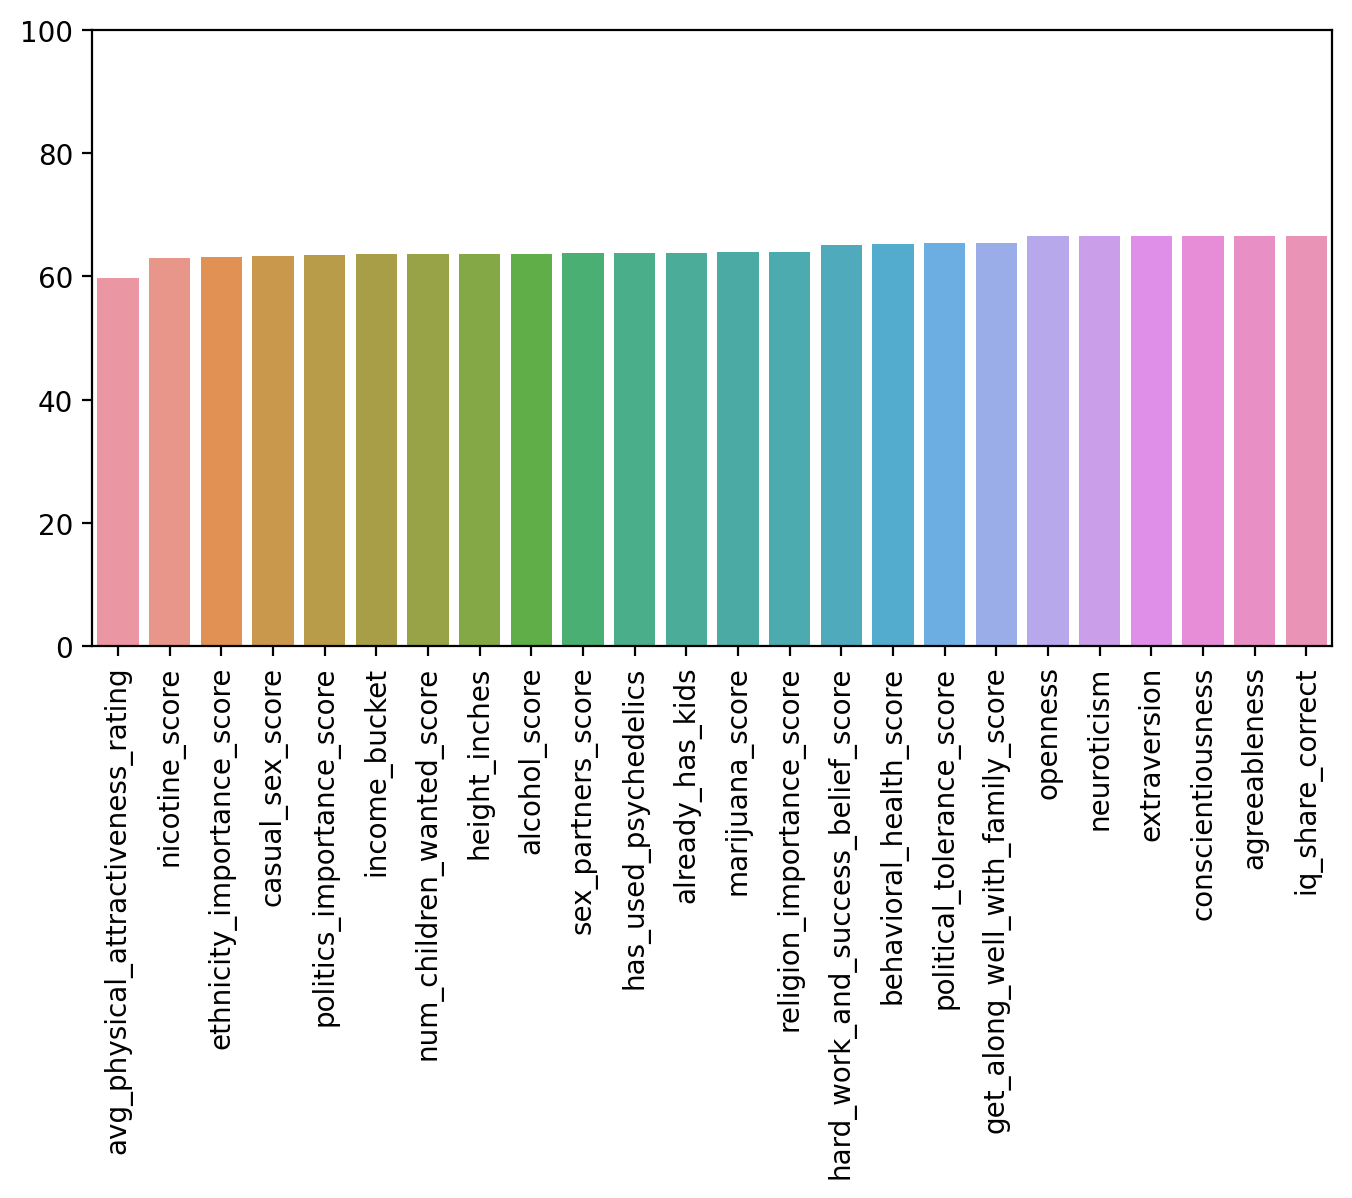

In [130]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,100);

Probably all the missing data is coming mostly from the same rows... 

Let's drop the rows with null values on our most missing values feature (iq_share_correct).

We are dropping > 66% of rows. We will assume the missing values are normally distributed. If that was not the case, we would be skewing the sample.

In [131]:
user_features[user_features['iq_share_correct'].isnull()]

user_id  age  gender attracted_to  \
0     N2QikIhXWyaoVSkD22KSatymXry1   33    male        women   
1     a0qF436mgXPGArB23AD56eCA4CM2   33    male        women   
2     8flwy3Pu0xdaJETKL7km2UfUTOh1   32    male        women   
3     GD1gM3nQi0QKEukab2PNEQO2gvF2   30  female          men   
4     rqVRyEhy97WenlbS8Vd0q6Fs6xf1   28  female          men   
...                            ...  ...     ...          ...   
2521  twYBEtXUIZVDDPO27cjswSewGRi2   33  female          men   
2524  IUaVRpsCQeUqdcWLQt1b6f2OMjF2   27    male        women   
2530  3IZMT15cMuU4EpKXsuQsYhiAcmB2   28  female          men   
2534  qvFUfK7b9nTyoPq6ShoHlnNIH9u1   31  female          men   
2548  gTZNl0LPxmchsBpK5YjZCxgzYm63   36  female          men   

      iq_share_correct  agreeableness  conscientiousness  extraversion  \
0                  NaN            NaN                NaN           NaN   
1                  NaN            NaN                NaN           NaN   
2                  NaN            NaN                NaN           NaN   
3                  NaN            NaN                NaN           NaN   
4                  NaN            NaN                NaN           NaN   
...                ...            ...                ...           ...   
2521               NaN            NaN                NaN           NaN   
2524               NaN            NaN                NaN           NaN   
2530               NaN            NaN                NaN           NaN   
2534               NaN            NaN                NaN           NaN   
2548               NaN            NaN                NaN           NaN   

      neuroticism  openness  ...  sex_partners_score  \
0             NaN       NaN  ...                 NaN   
1             NaN       NaN  ...                 NaN   
2             NaN       NaN  ...                 NaN   
3             NaN       NaN  ...                 NaN   
4             NaN       NaN  ...                 NaN   
...           ...       ...  ...                 ...   
2521          NaN       NaN  ...                 NaN   
2524          NaN       NaN  ...                 1.0   
2530          NaN       NaN  ...                 NaN   
2534          NaN       NaN  ...                 NaN   
2548          NaN       NaN  ...                 NaN   

      get_along_well_with_family_score  political_tolerance_score  \
0                                  NaN                        NaN   
1                                  NaN                        NaN   
2                                  NaN                        NaN   
3                                  NaN                        NaN   
4                                  NaN                        NaN   
...                                ...                        ...   
2521                               NaN                        NaN   
2524                               0.0                        NaN   
2530                               NaN                        NaN   
2534                               NaN                        NaN   
2548                               NaN                        NaN   

      ethnicity_importance_score  religion_importance_score  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                        NaN   
...                          ...                        ...   
2521                         NaN                        NaN   
2524                         0.0                        0.0   
2530                         NaN                        NaN   
2534                         NaN                        0.0   
2548                         NaN                        NaN   

      politics_importance_score  num_children_wanted_score  already_has_kids  \
0                           Na

In [132]:
user_features = user_features[user_features['iq_share_correct'].notnull()]

Let's see now how many missing values we have

In [133]:
percent_nan = percent_missing(user_features)
percent_nan

has_used_psychedelics                  0.117233
agreeableness                          0.351700
conscientiousness                      0.351700
extraversion                           0.351700
neuroticism                            0.351700
openness                               0.351700
behavioral_health_score                3.868699
get_along_well_with_family_score       3.868699
hard_work_and_success_belief_score     3.868699
political_tolerance_score              3.985932
avg_physical_attractiveness_rating    30.949590
dtype: float64

### We cut out most of the missing values. But there is still more work to do.

We have to decide what to do with all the avg_physical_attractiveness_rating missing values. Since the average physical attractiveness is one of the most important features of this dataset, we will avoid dropping the feature.

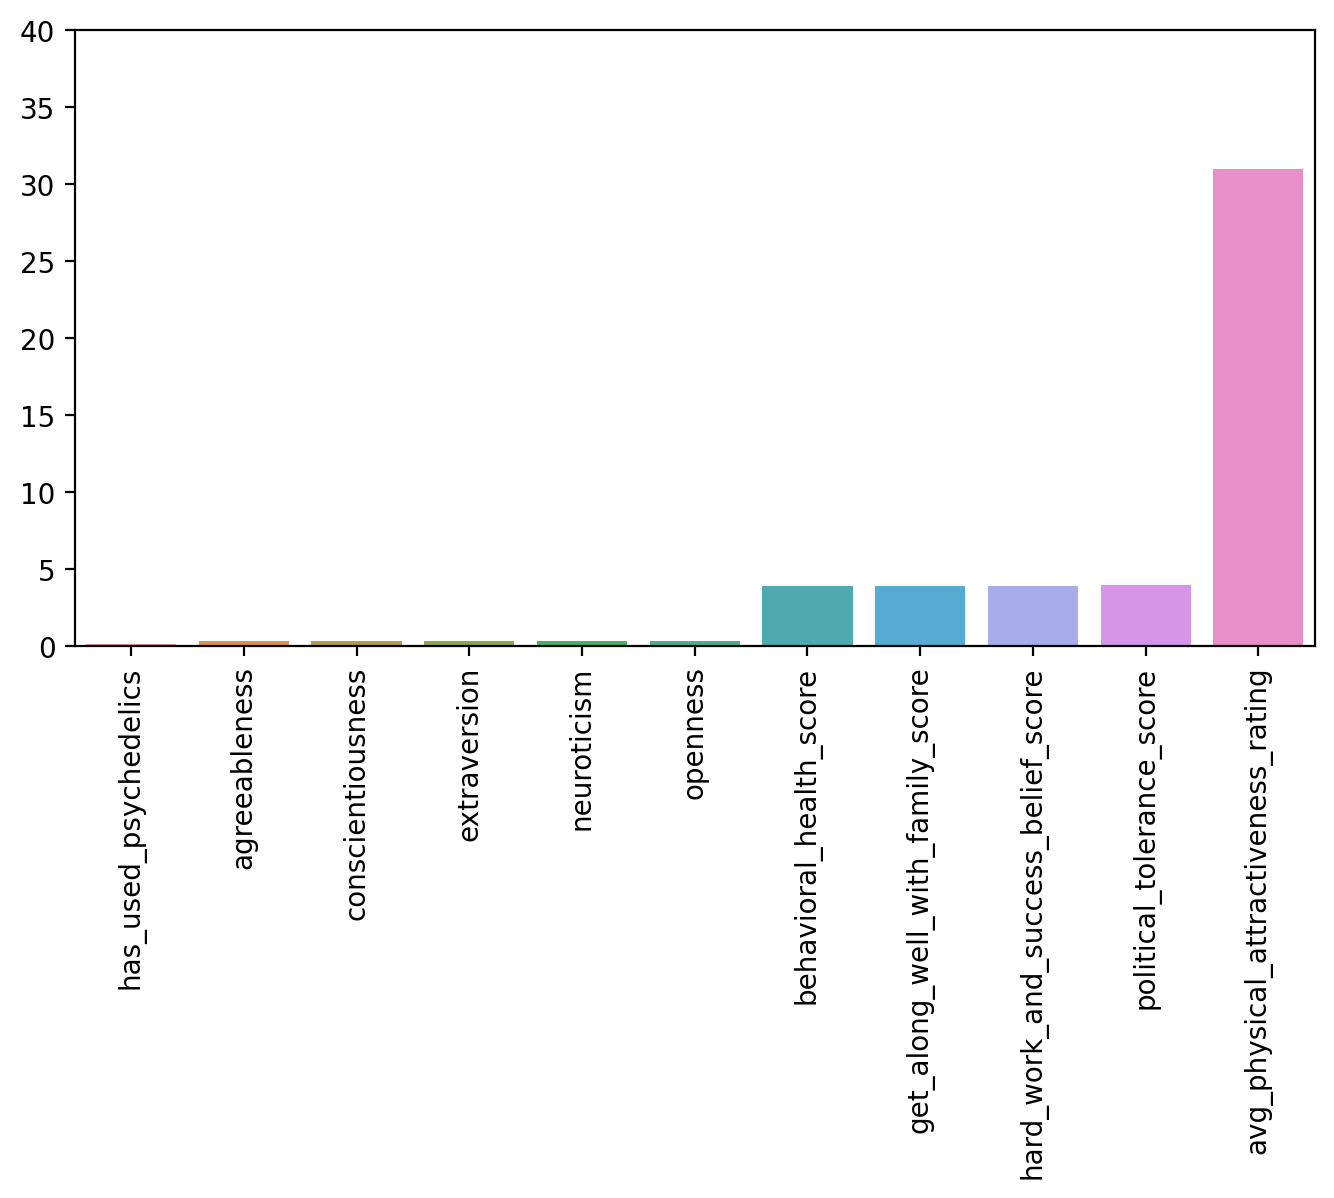

In [134]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,40);

In [135]:
user_features[user_features['avg_physical_attractiveness_rating'].isnull()] 

user_id  age  gender attracted_to  \
13    fiju3kSbpbNK9ViarTBsbgXjlG53   25  female          men   
56    j4NdgVLSXZVYiKTCC4bYJITnDOK2   32  female          men   
86    Y8qLwXznNQcQneYhtFnN4pP8F2P2   39  female          men   
130   F8oH9T8qTaWOIgDwngok1ORNhgB2   26    male        women   
171   DB0MO5H2KrTeaRUPlI7tMRrWwpf1   30  female          men   
...                            ...  ...     ...          ...   
2501  sINqjwXmXdSOobbiR7KaiQurZt23   38    male        women   
2520  I4nHNr9ofHQdxFscE8QKlQ0v5M52   31    male        women   
2532  FeRP2odmWpSggaV0mZltAX8v0s52   34    male        women   
2537  Ob6gU61BlQUe0OkElSFgsBMRCIx1   32    male        women   
2539  9J5iGWLJ7wSiI4SSLkuMve8dUlJ2   38    male        women   

      iq_share_correct  agreeableness  conscientiousness  extraversion  \
13            1.000000           35.0               34.0          33.0   
56            0.733333           40.0               42.0          41.0   
86            0.866667           40.0               34.0          38.0   
130           0.933333           41.0               33.0          36.0   
171           0.733333           42.0               32.0          23.0   
...                ...            ...                ...           ...   
2501          0.866667           30.0               28.0          40.0   
2520          0.333333           40.0               39.0          41.0   
2532          0.866667           41.0               39.0          40.0   
2537          0.733333           42.0               39.0          35.0   
2539          0.866667           37.0               32.0          42.0   

      neuroticism  openness  ...  sex_partners_score  \
13           26.0      30.0  ...                 0.0   
56           24.0      29.0  ...                 2.0   
86           21.0      30.0  ...                 2.0   
130          30.0      30.0  ...                 0.0   
171          26.0      28.0  ...                 0.0   
...           ...       ...  ...                 ...   
2501         25.0      23.0  ...                 1.0   
2520         22.0      30.0  ...                 1.0   
2532         12.0      29.0  ...                 1.0   
2537         15.0      29.0  ...                 1.0   
2539         16.0      30.0  ...                 2.0   

      get_along_well_with_family_score  political_tolerance_score  \
13                                 1.0                        0.0   
56                                 1.0                        3.0   
86                                 1.0                        3.0   
130                                1.0                        1.0   
171                                1.0                        1.0   
...                                ...                        ...   
2501                               1.0                        3.0   
2520                               1.0                        3.0   
2532                               1.0                        3.0   
2537                               1.0                        3.0   
2539                               1.0                        4.0   

      ethnicity_importance_score  religion_importance_score  \
13                           0.0                        1.0   
56                           0.0                        1.0   
86                           0.0                        0.0   
130                          0.0                        0.0   
171                          0.0                        1.0   
...                          ...                        ...   
2501                         1.0                        0.0   
2520                         0.0                        0.0   
2532                         0.0                        0.0   
2537                         0.0                        0.0   
2539                         0.0                        0.0   

      politics_importance_score  num_children_wanted_score  already_has_kids  \
13                          2.

In [136]:
user_features = user_features[user_features['avg_physical_attractiveness_rating'].notnull()]

In [137]:
len(user_features)

589

Let's check again the null values

In [138]:
percent_nan = percent_missing(user_features)
percent_nan

agreeableness                         0.169779
conscientiousness                     0.169779
extraversion                          0.169779
neuroticism                           0.169779
openness                              0.169779
has_used_psychedelics                 0.169779
behavioral_health_score               3.904924
get_along_well_with_family_score      3.904924
political_tolerance_score             3.904924
hard_work_and_success_belief_score    3.904924
dtype: float64

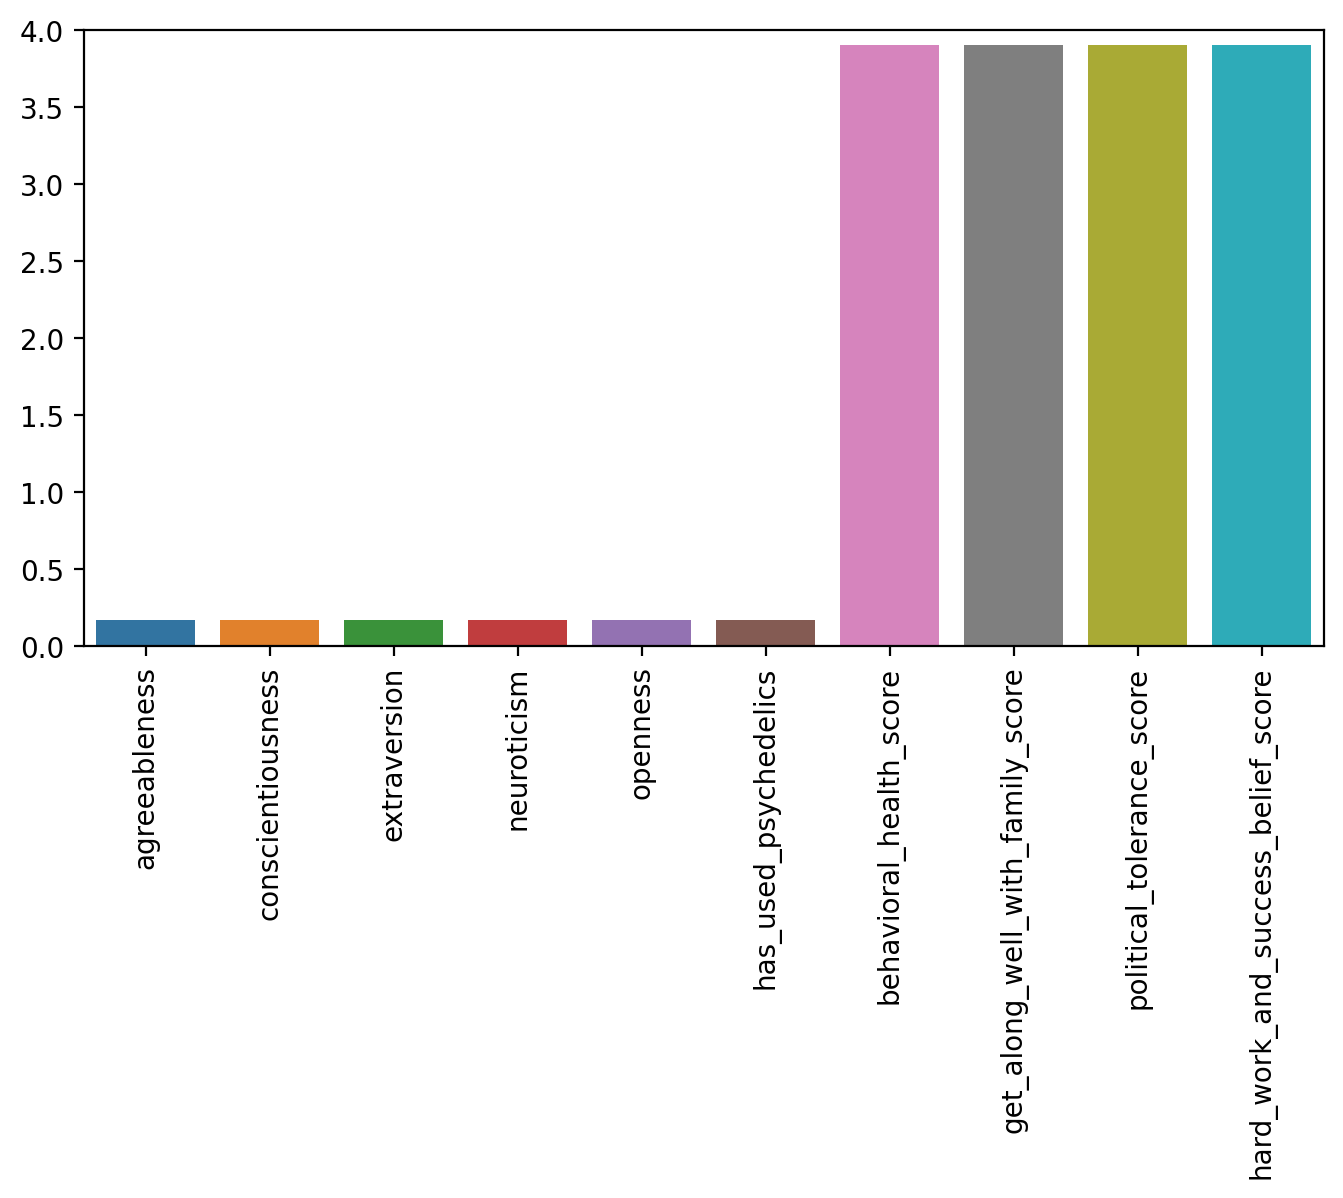

In [139]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,4);


Let's drop those rows containing the 4% missing values

In [140]:
user_features = user_features[user_features['hard_work_and_success_belief_score'].notnull()]

In [141]:
len(user_features)

566

We have no more missing data and our dataset contains 566 rows

In [142]:
user_features[user_features['gender']=='male']['gender'].count(), user_features[user_features['gender']=='female']['gender'].count()

(280, 286)

We have roughly the same amount of data for males and females

In [145]:
user_features[user_features['attracted_to']=='men']['attracted_to'].count(), user_features[user_features['attracted_to']=='women']['attracted_to'].count(),user_features[user_features['attracted_to']=='everyone']['attracted_to'].count()

(272, 277, 17)

In [144]:
user_features['attracted_to']

6          women
50         women
60         women
127        women
167     everyone
          ...   
2547         men
2549         men
2550       women
2551       women
2552       women
Name: attracted_to, Length: 566, dtype: object

In [29]:
desc = pd.DataFrame(index=user_features.columns)
desc['count']  = user_features.count()
desc['nunique'] = user_features.nunique()
desc['% unique'] = 100* user_features.nunique()/user_features.count()
desc['null'] = user_features.isnull().sum()
desc['type'] = user_features.dtypes

desc = pd.concat([desc,user_features.describe().T.drop('count',axis=1)],axis=1)

desc

count  nunique    % unique  null     type  \
user_id                               566      566  100.000000     0   object   
age                                   566       38    6.713781     0    int64   
gender                                566        2    0.353357     0   object   
attracted_to                          566        3    0.530035     0   object   
iq_share_correct                      566       15    2.650177     0  float64   
agreeableness                         566       17    3.003534     0  float64   
conscientiousness                     566       26    4.593640     0  float64   
extraversion                          566       22    3.886926     0  float64   
neuroticism                           566       24    4.240283     0  float64   
openness                              566       14    2.473498     0  float64   
avg_physical_attractiveness_rating    566      293   51.766784     0  float64   
height_inches                         566       23    4.063604     0  float64   
income_bucket                         566        9    1.590106     0  float64   
nicotine_score                        566        2    0.353357     0  float64   
alcohol_score                         566        4    0.706714     0  float64   
marijuana_score                       566        4    0.706714     0  float64   
has_used_psychedelics                 566        2    0.353357     0  float64   
behavioral_health_score               566        5    0.883392     0  float64   
sex_partners_score                    566        5    0.883392     0  float64   
get_along_well_with_family_score      566        2    0.353357     0  float64   
political_tolerance_score             566        5    0.883392     0  float64   
ethnicity_importance_score            566        3    0.530035     0  float64   
religion_importance_score             566        3    0.530035     0  float64   
politics_importance_score             566        3    0.530035     0  float64   
num_children_wanted_score             566        4    0.706714     0  float64   
already_has_kids                      566        2    0.353357     0  float64   
casual_sex_score                      566        5    0.883392     0  float64   
hard_work_and_success_belief_score    566        5    0.883392     0  float64   

                                         mean       std        min        25%  \
user_id                                   NaN       NaN        NaN        NaN   
age                                 32.978799  6.154895  20.000000  29.000000   
gender                                    NaN       NaN        NaN        NaN   
attracted_to                              NaN       NaN        NaN        NaN   
iq_share_correct                     0.709423  0.243704   0.066667   0.600000   
agreeableness                       37.915194  3.217741  24.000000  36.000000   
conscientiousness                   36.616608  4.718220  19.000000  34.000000   
extraversion                        35.570671  4.526554  21.000000  33.000000   
neuroticism                         20.153710  5.136995  12.000000  16.000000   
openness                            27.365724  2.718438  16.000000  26.000000   
avg_physical_attractiveness_rating   4.407400  1.372748   1.375000   3.402273   
height_inches                       67.220848  3.973673  56.000000  64.000000   
income_bucket                        4.934629  1.852328   1.000000   4.000000   
nicotine_score                       0.116608  0.321236   0.000000   0.000000   
alcohol_score                        1.431095  0.699953   0.000000   1.000000   
marijuana_score                      0.553004  0.886387   0.000000   0.000000   
has_used_psychedelics                0.266784  0.442670   0.000000   0.000000   
behavioral_health_score              2.717314  1.041417   0.000000   2.000000   
sex_partners_score                   1.206714  0.980170   0.000000   0.000000   
get_along_well_with_family_score     0.881625  0.323337   0.000000

## Visualization of Distributions

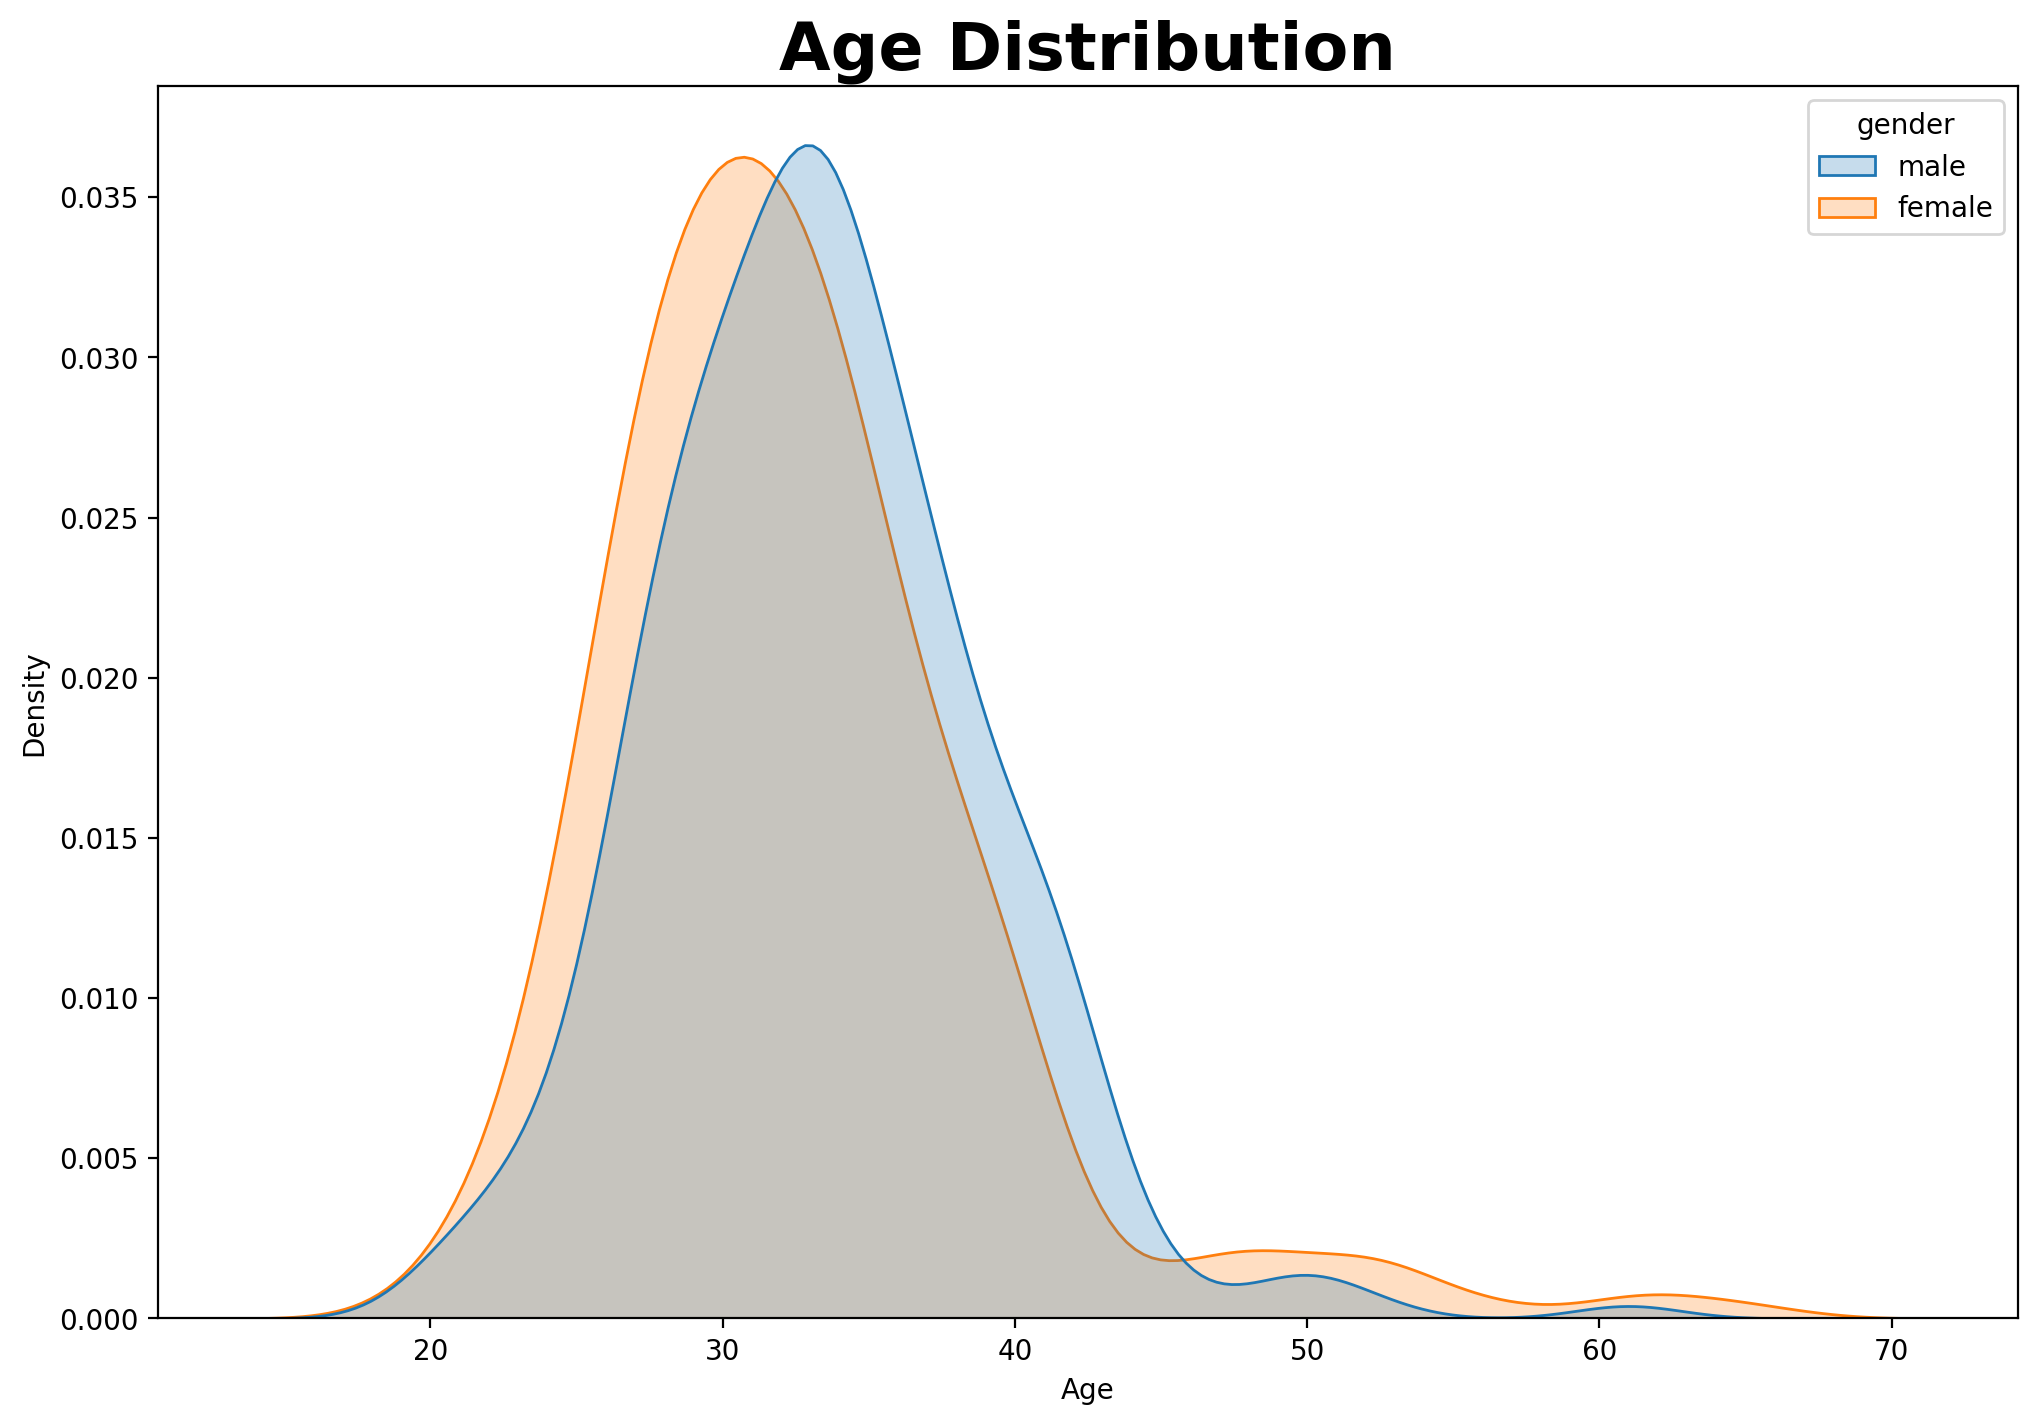

In [30]:
plt.figure(figsize=(12,8),dpi=200)
sns.kdeplot(data = user_features, x='age',fill=True,hue='gender')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title('Age Distribution',fontsize =24,fontweight = 'bold')

plt.show()

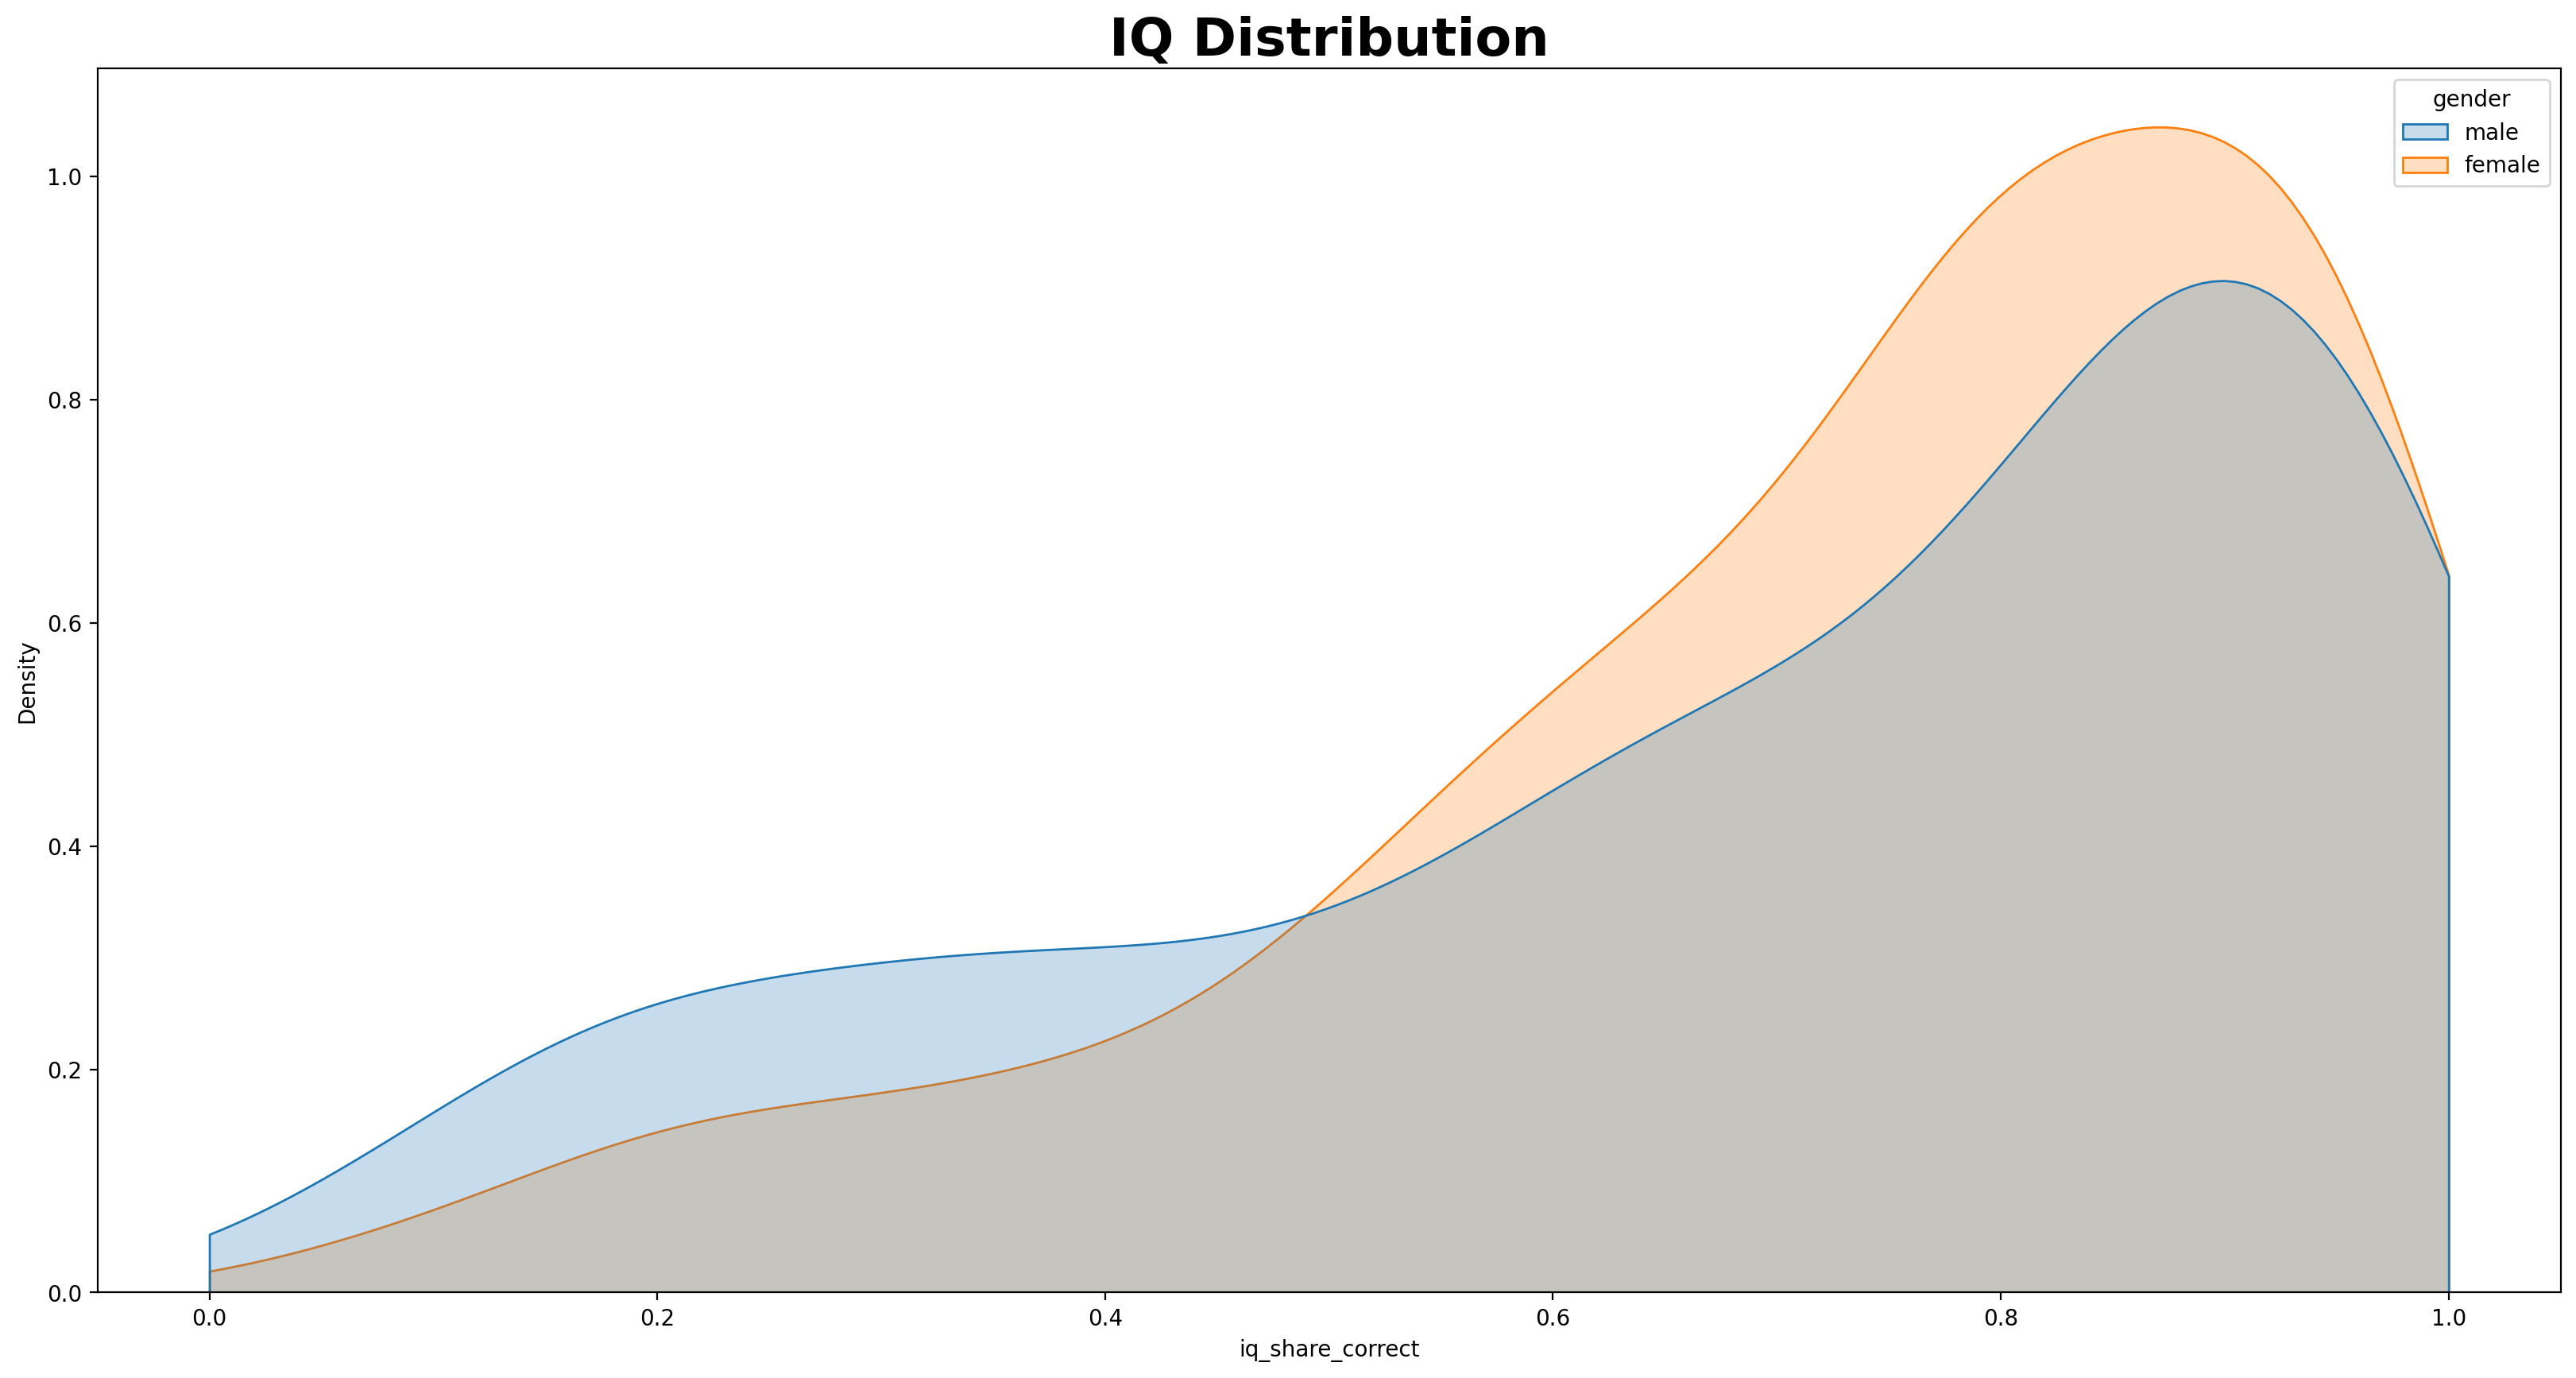

In [31]:
plt.figure(figsize=(20,10),dpi=200)
sns.kdeplot(data = user_features, x='iq_share_correct',fill=True,clip=[0,1],hue='gender')
plt.xlabel("iq_share_correct")
plt.ylabel("Density")
plt.title('IQ Distribution',fontsize =24,fontweight = 'bold')

plt.show()

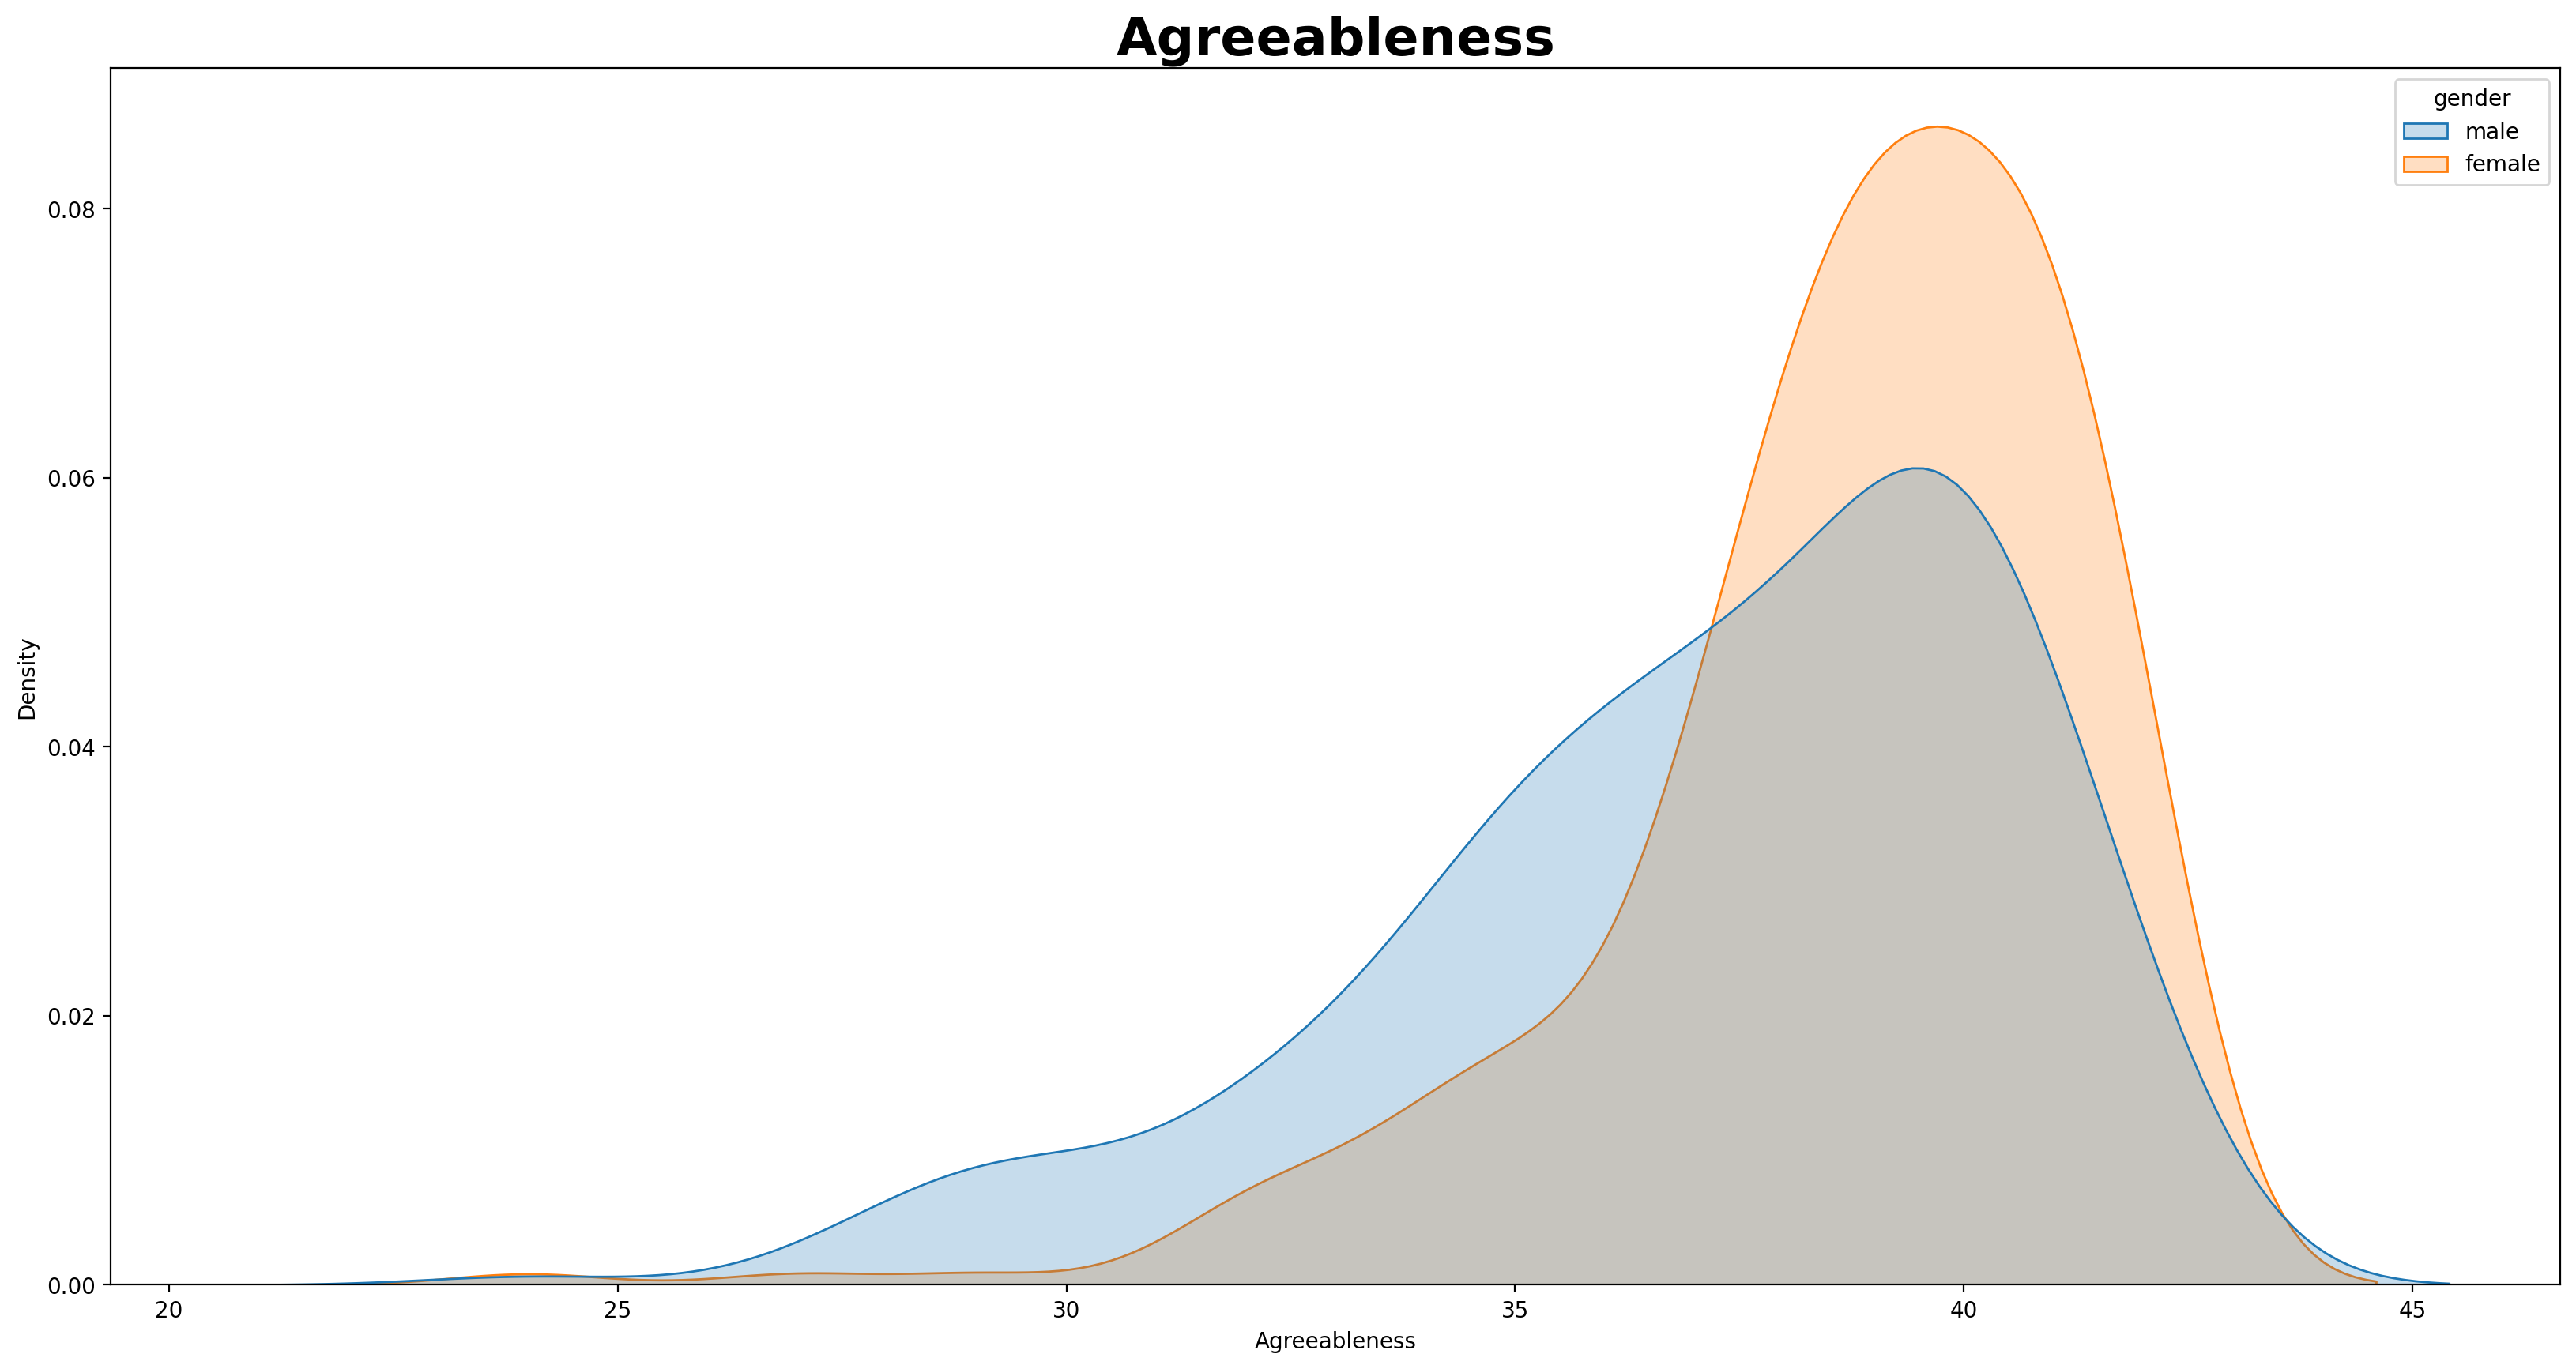

In [32]:
plt.figure(figsize=(20,10),dpi=200)
sns.kdeplot(data = user_features, x='agreeableness',fill=True,hue='gender')
plt.xlabel("Agreeableness")
plt.ylabel("Density")
plt.title('Agreeableness',fontsize =24,fontweight = 'bold')

plt.show()

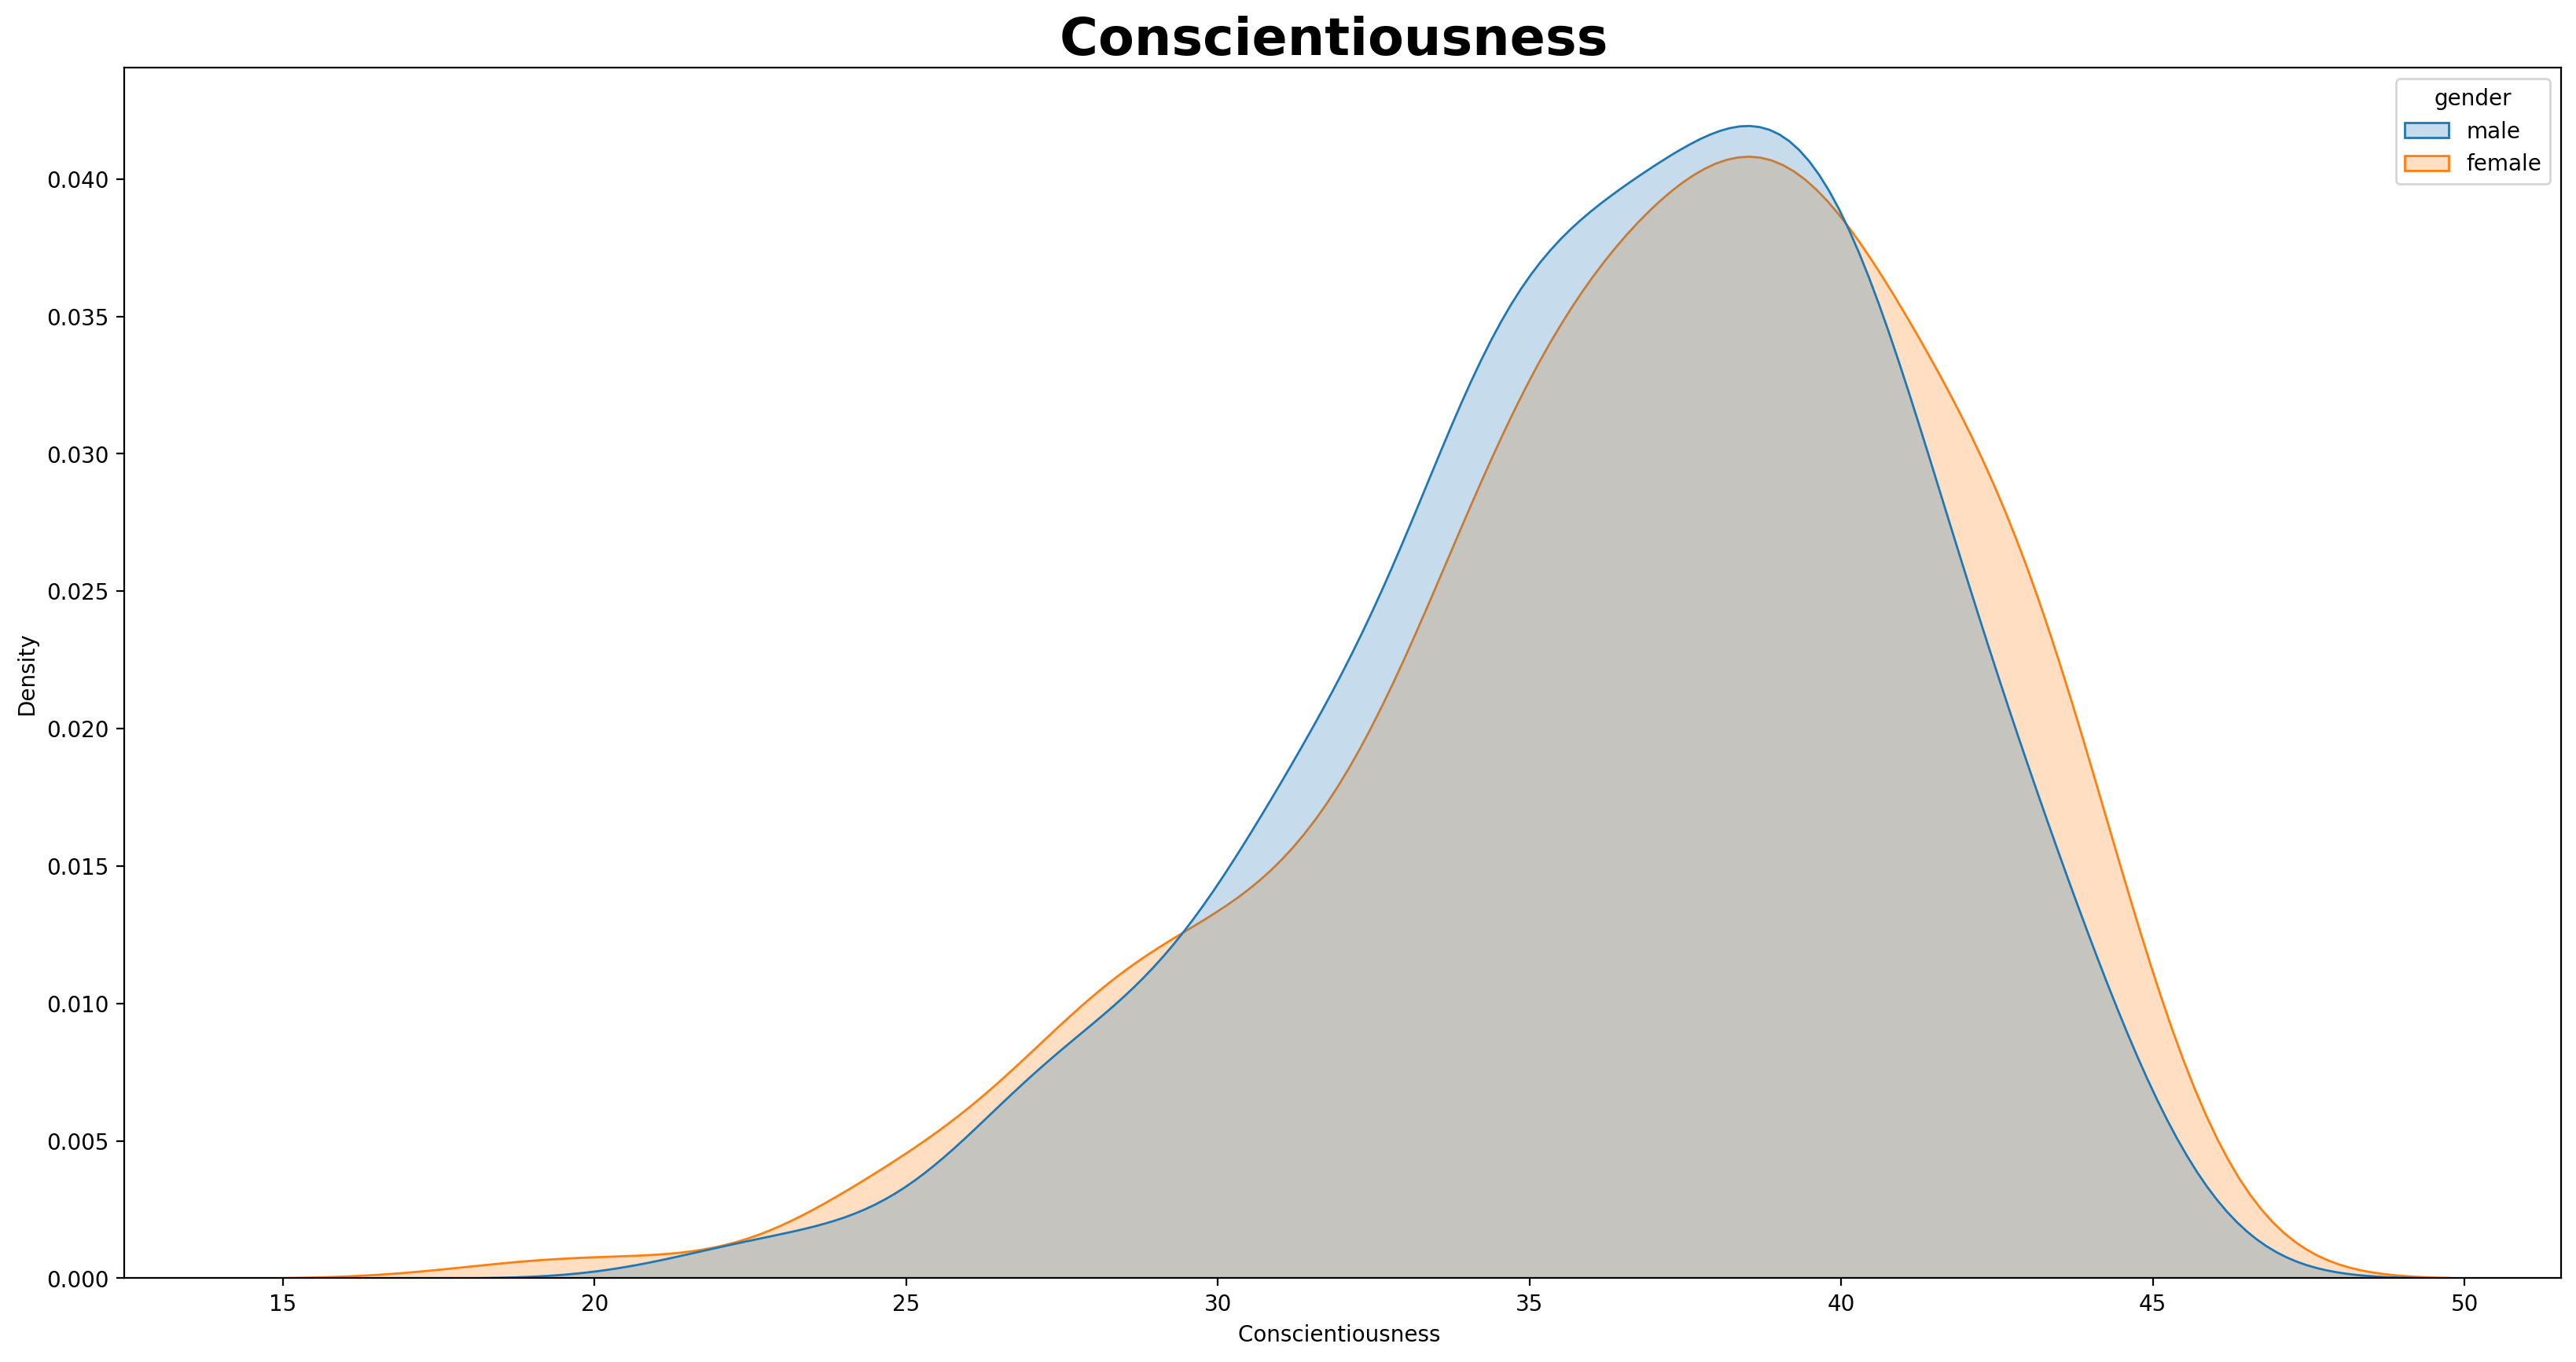

In [33]:
plt.figure(figsize=(20,10),dpi=200)
sns.kdeplot(data = user_features, x='conscientiousness',fill=True,hue='gender')
plt.xlabel("Conscientiousness ")
plt.ylabel("Density")
plt.title('Conscientiousness ',fontsize =24,fontweight = 'bold')

plt.show()

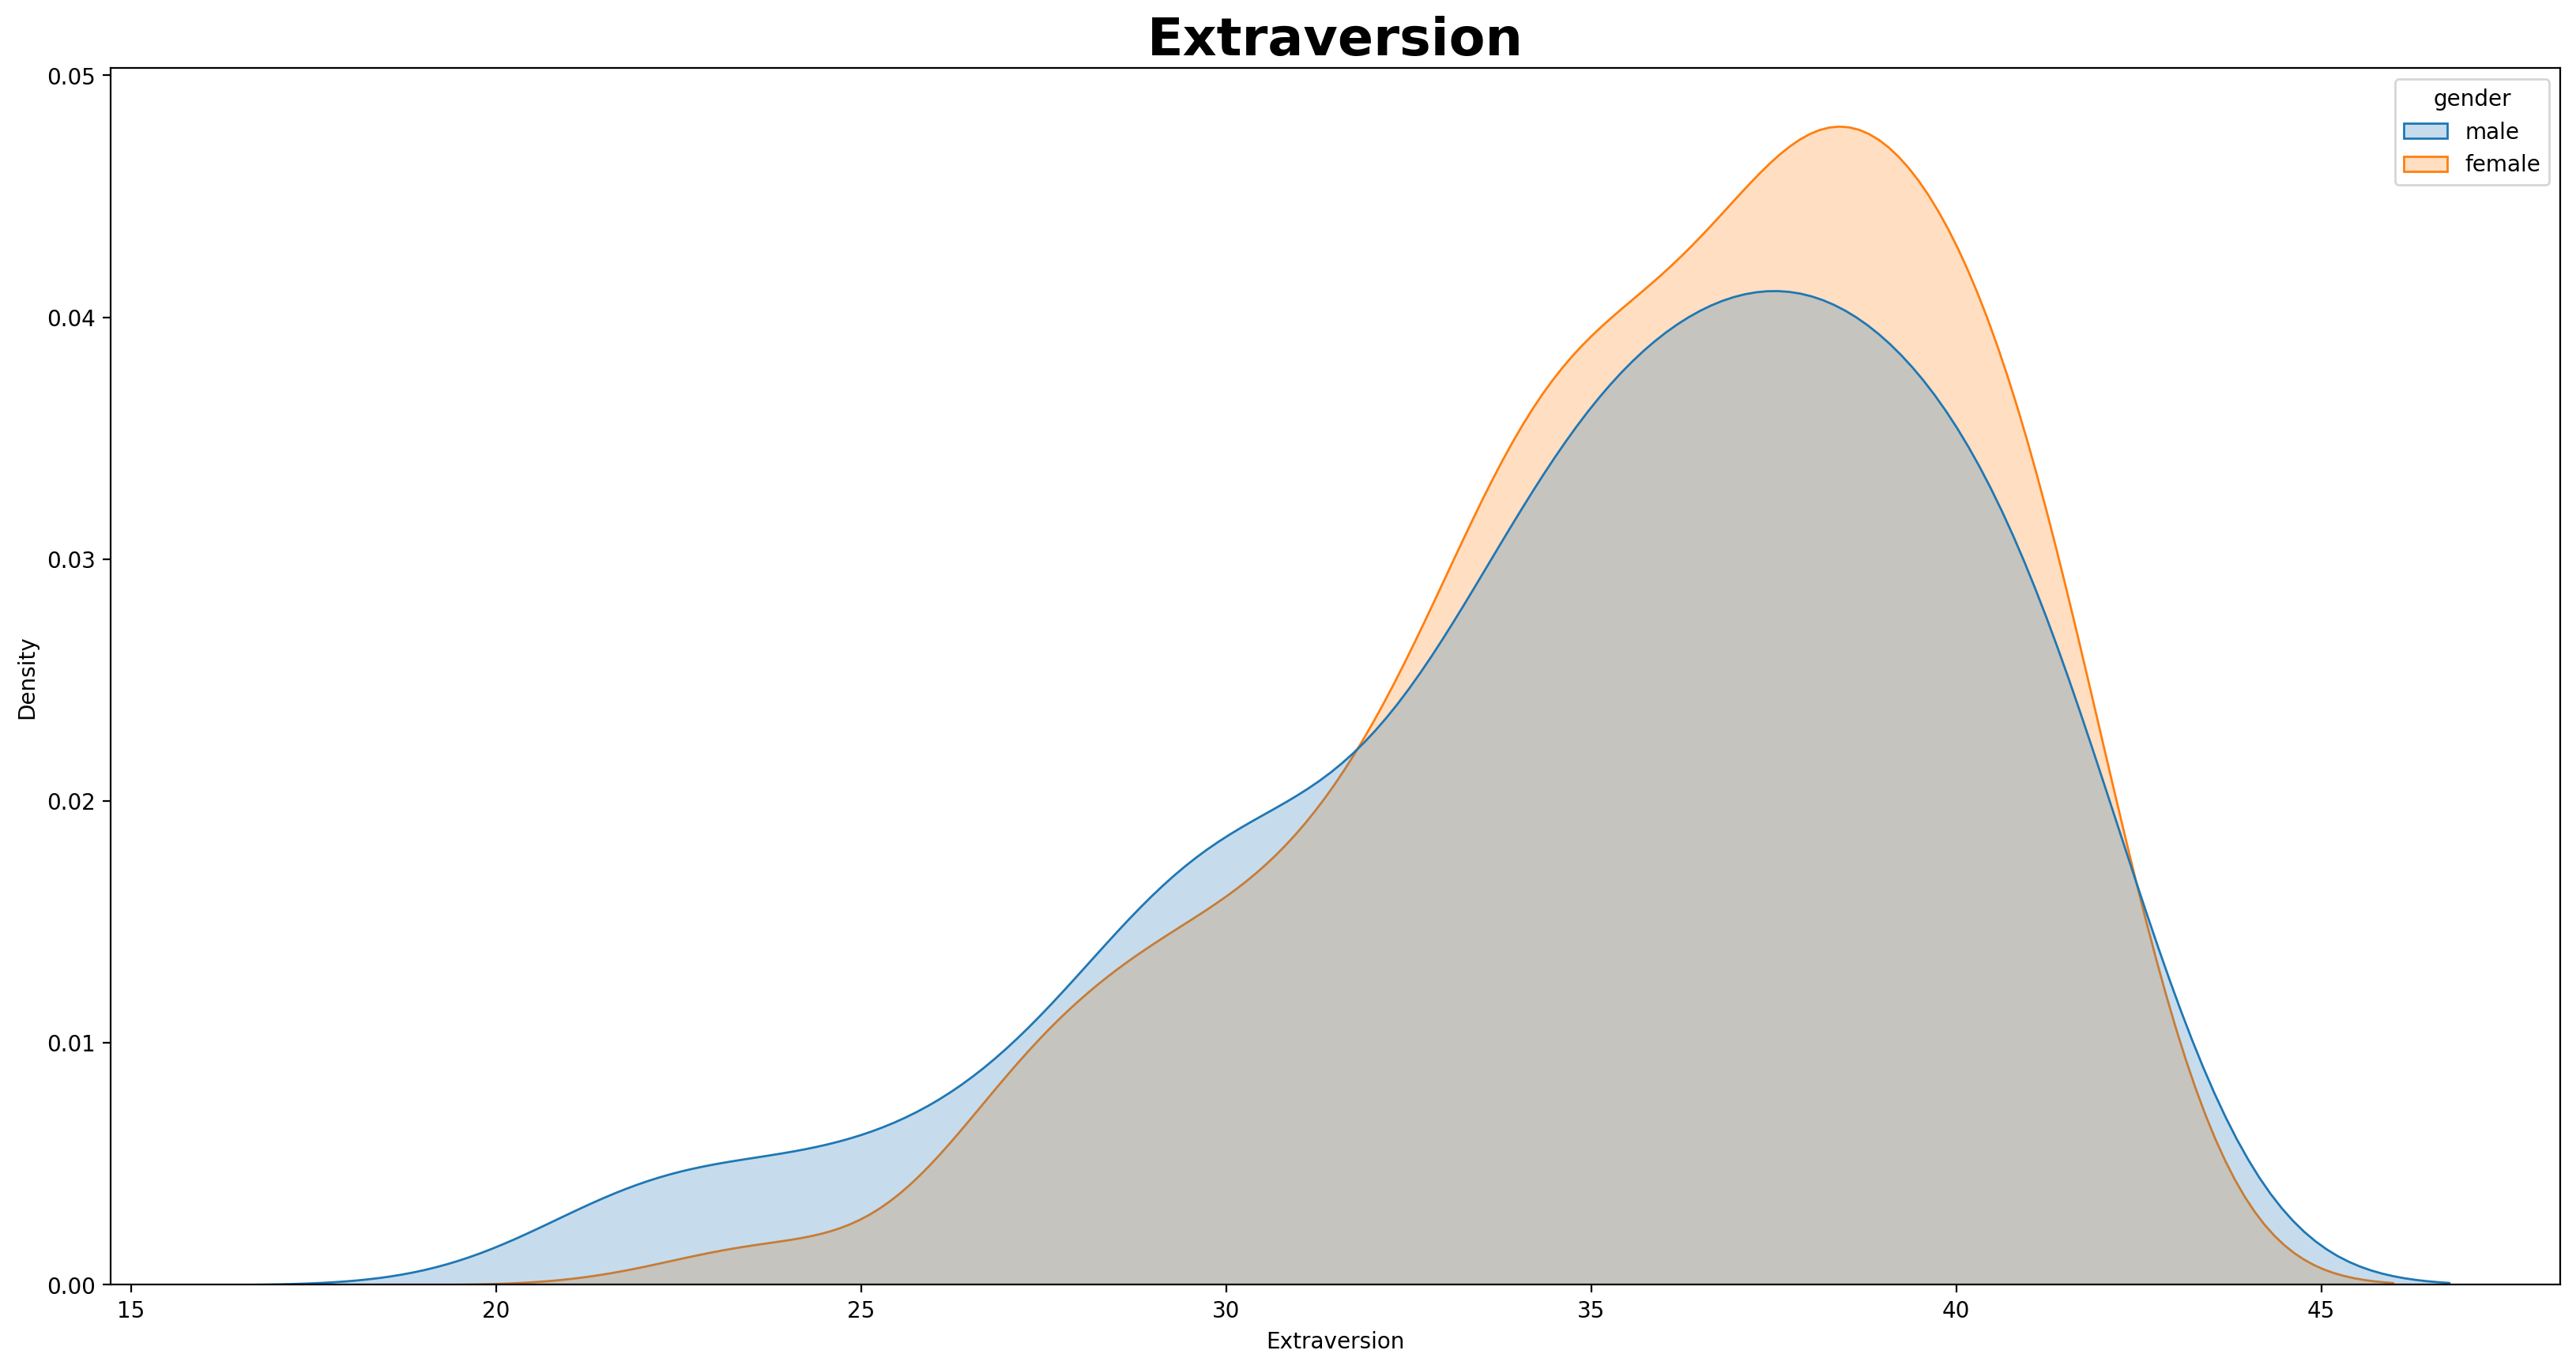

In [34]:
plt.figure(figsize=(20,10),dpi=200)
sns.kdeplot(data = user_features, x='extraversion',fill=True,hue='gender')
plt.xlabel("Extraversion")
plt.ylabel("Density")
plt.title('Extraversion',fontsize =24,fontweight = 'bold')

plt.show()

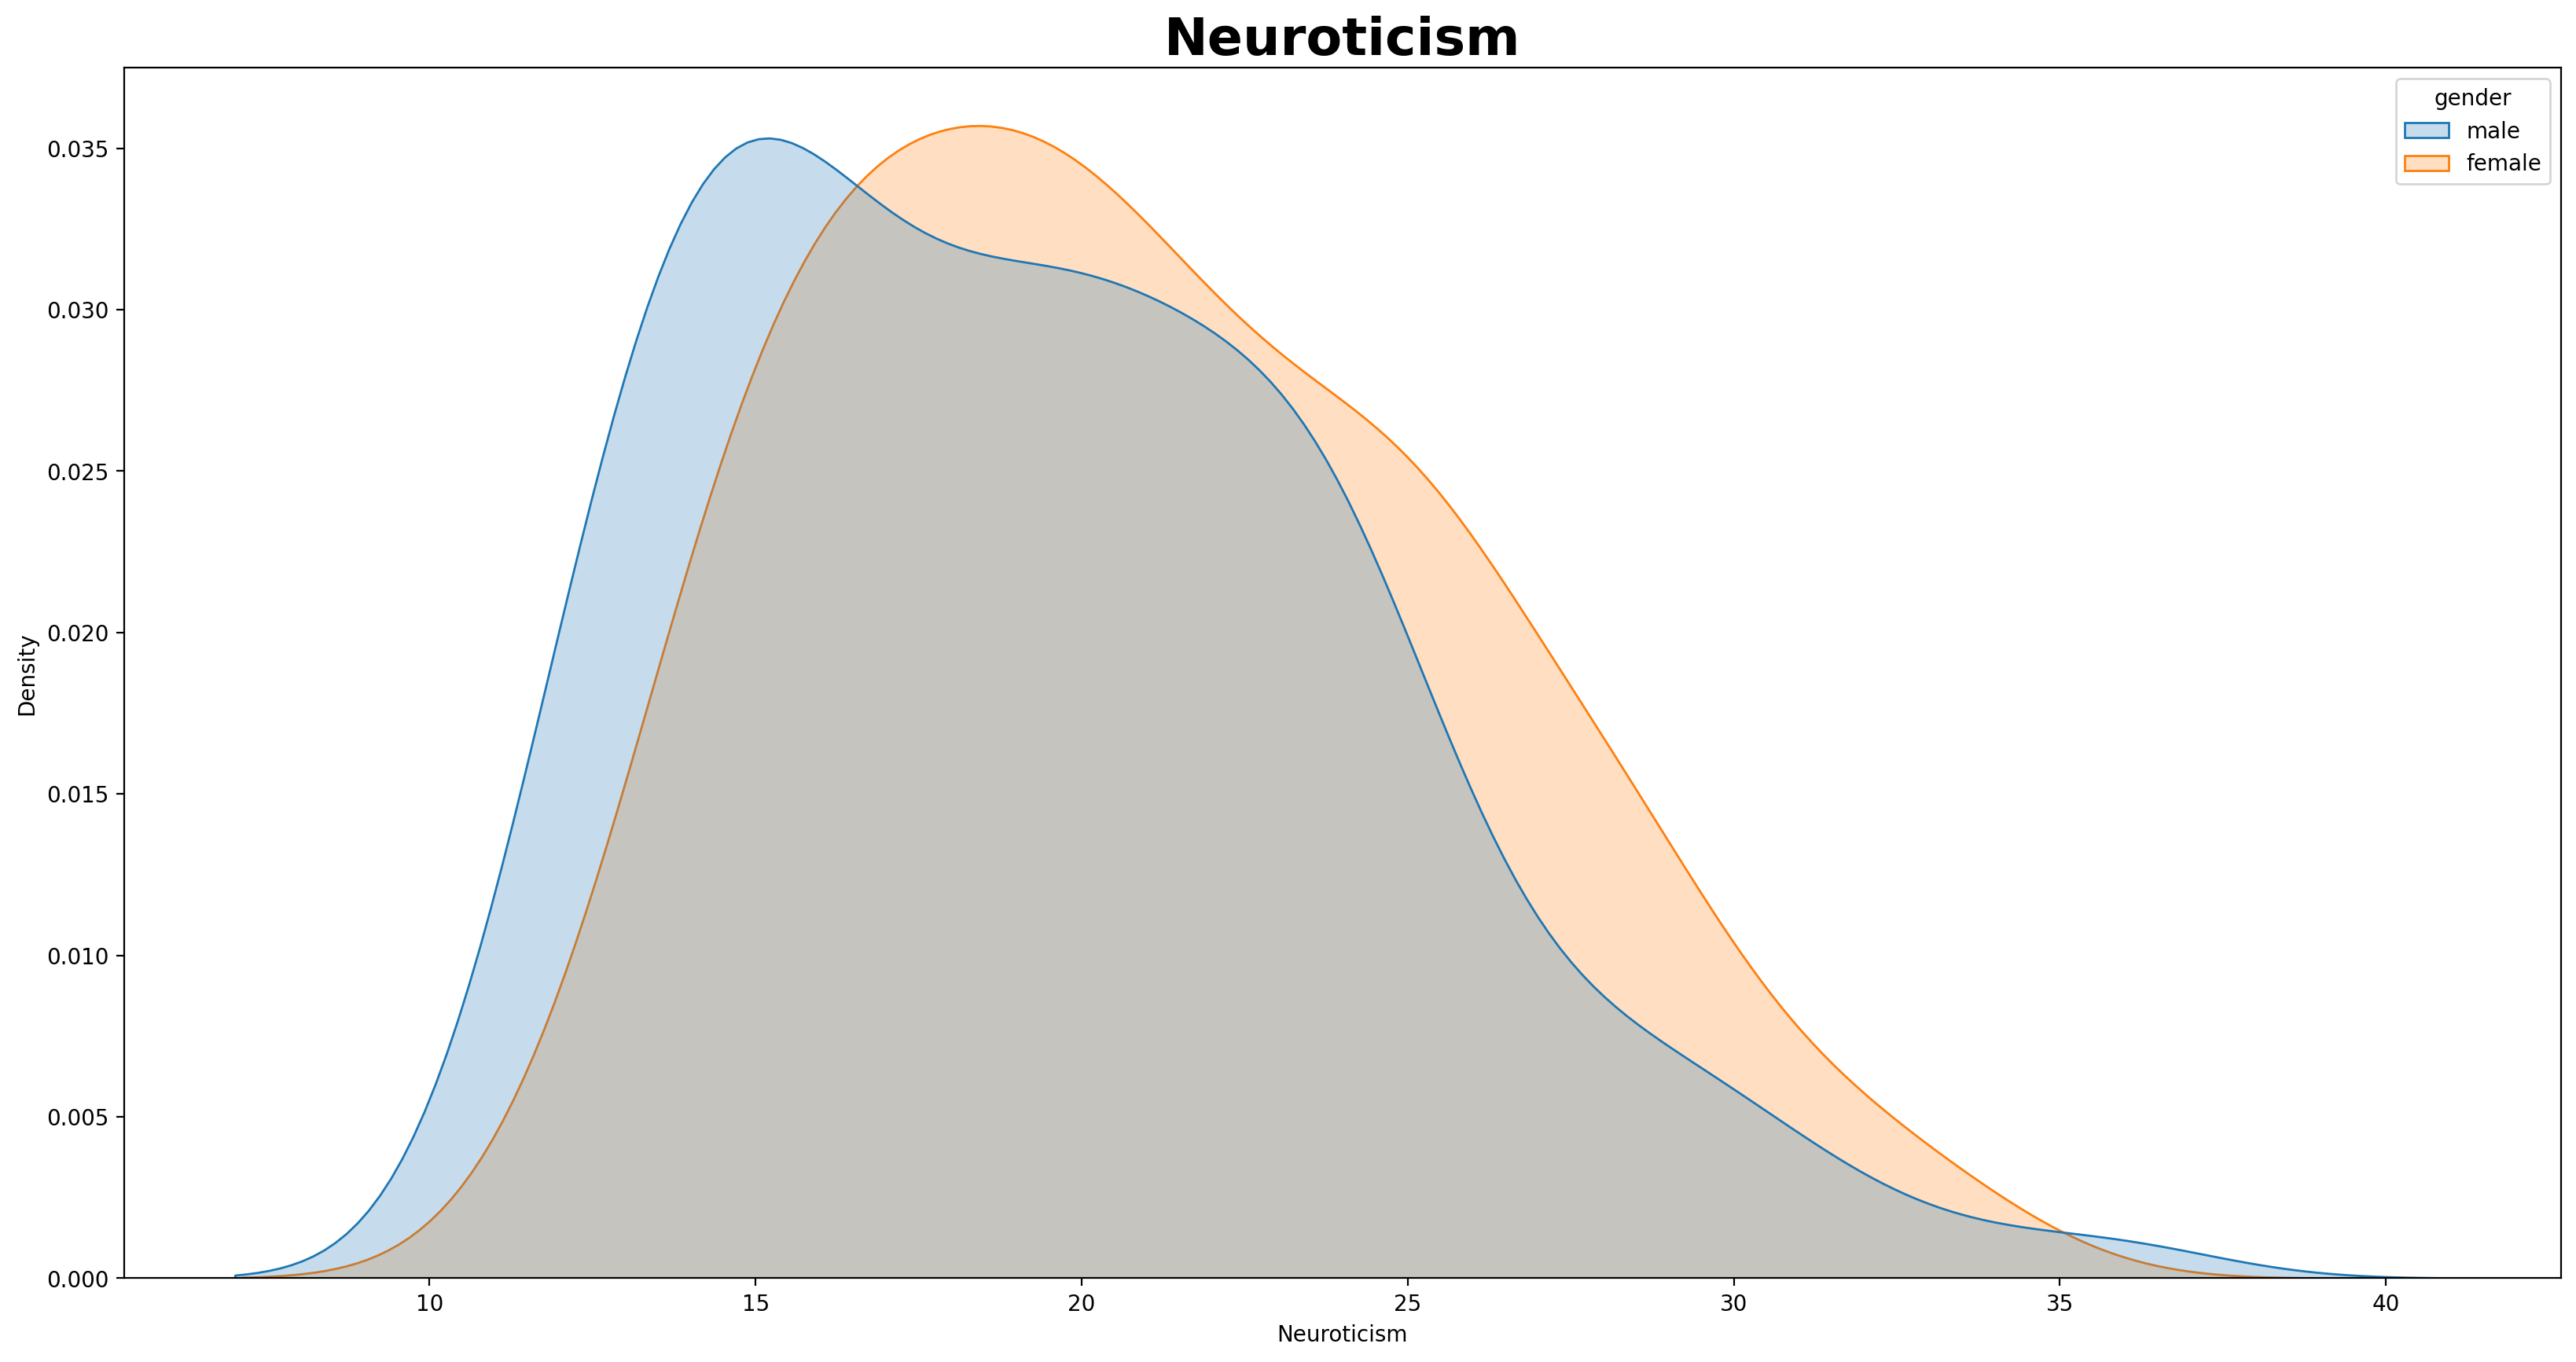

In [35]:
plt.figure(figsize=(20,10),dpi=200)
sns.kdeplot(data = user_features, x='neuroticism',fill=True,hue='gender')
plt.xlabel("Neuroticism")
plt.ylabel("Density")
plt.title('Neuroticism',fontsize =24,fontweight = 'bold')

plt.show()

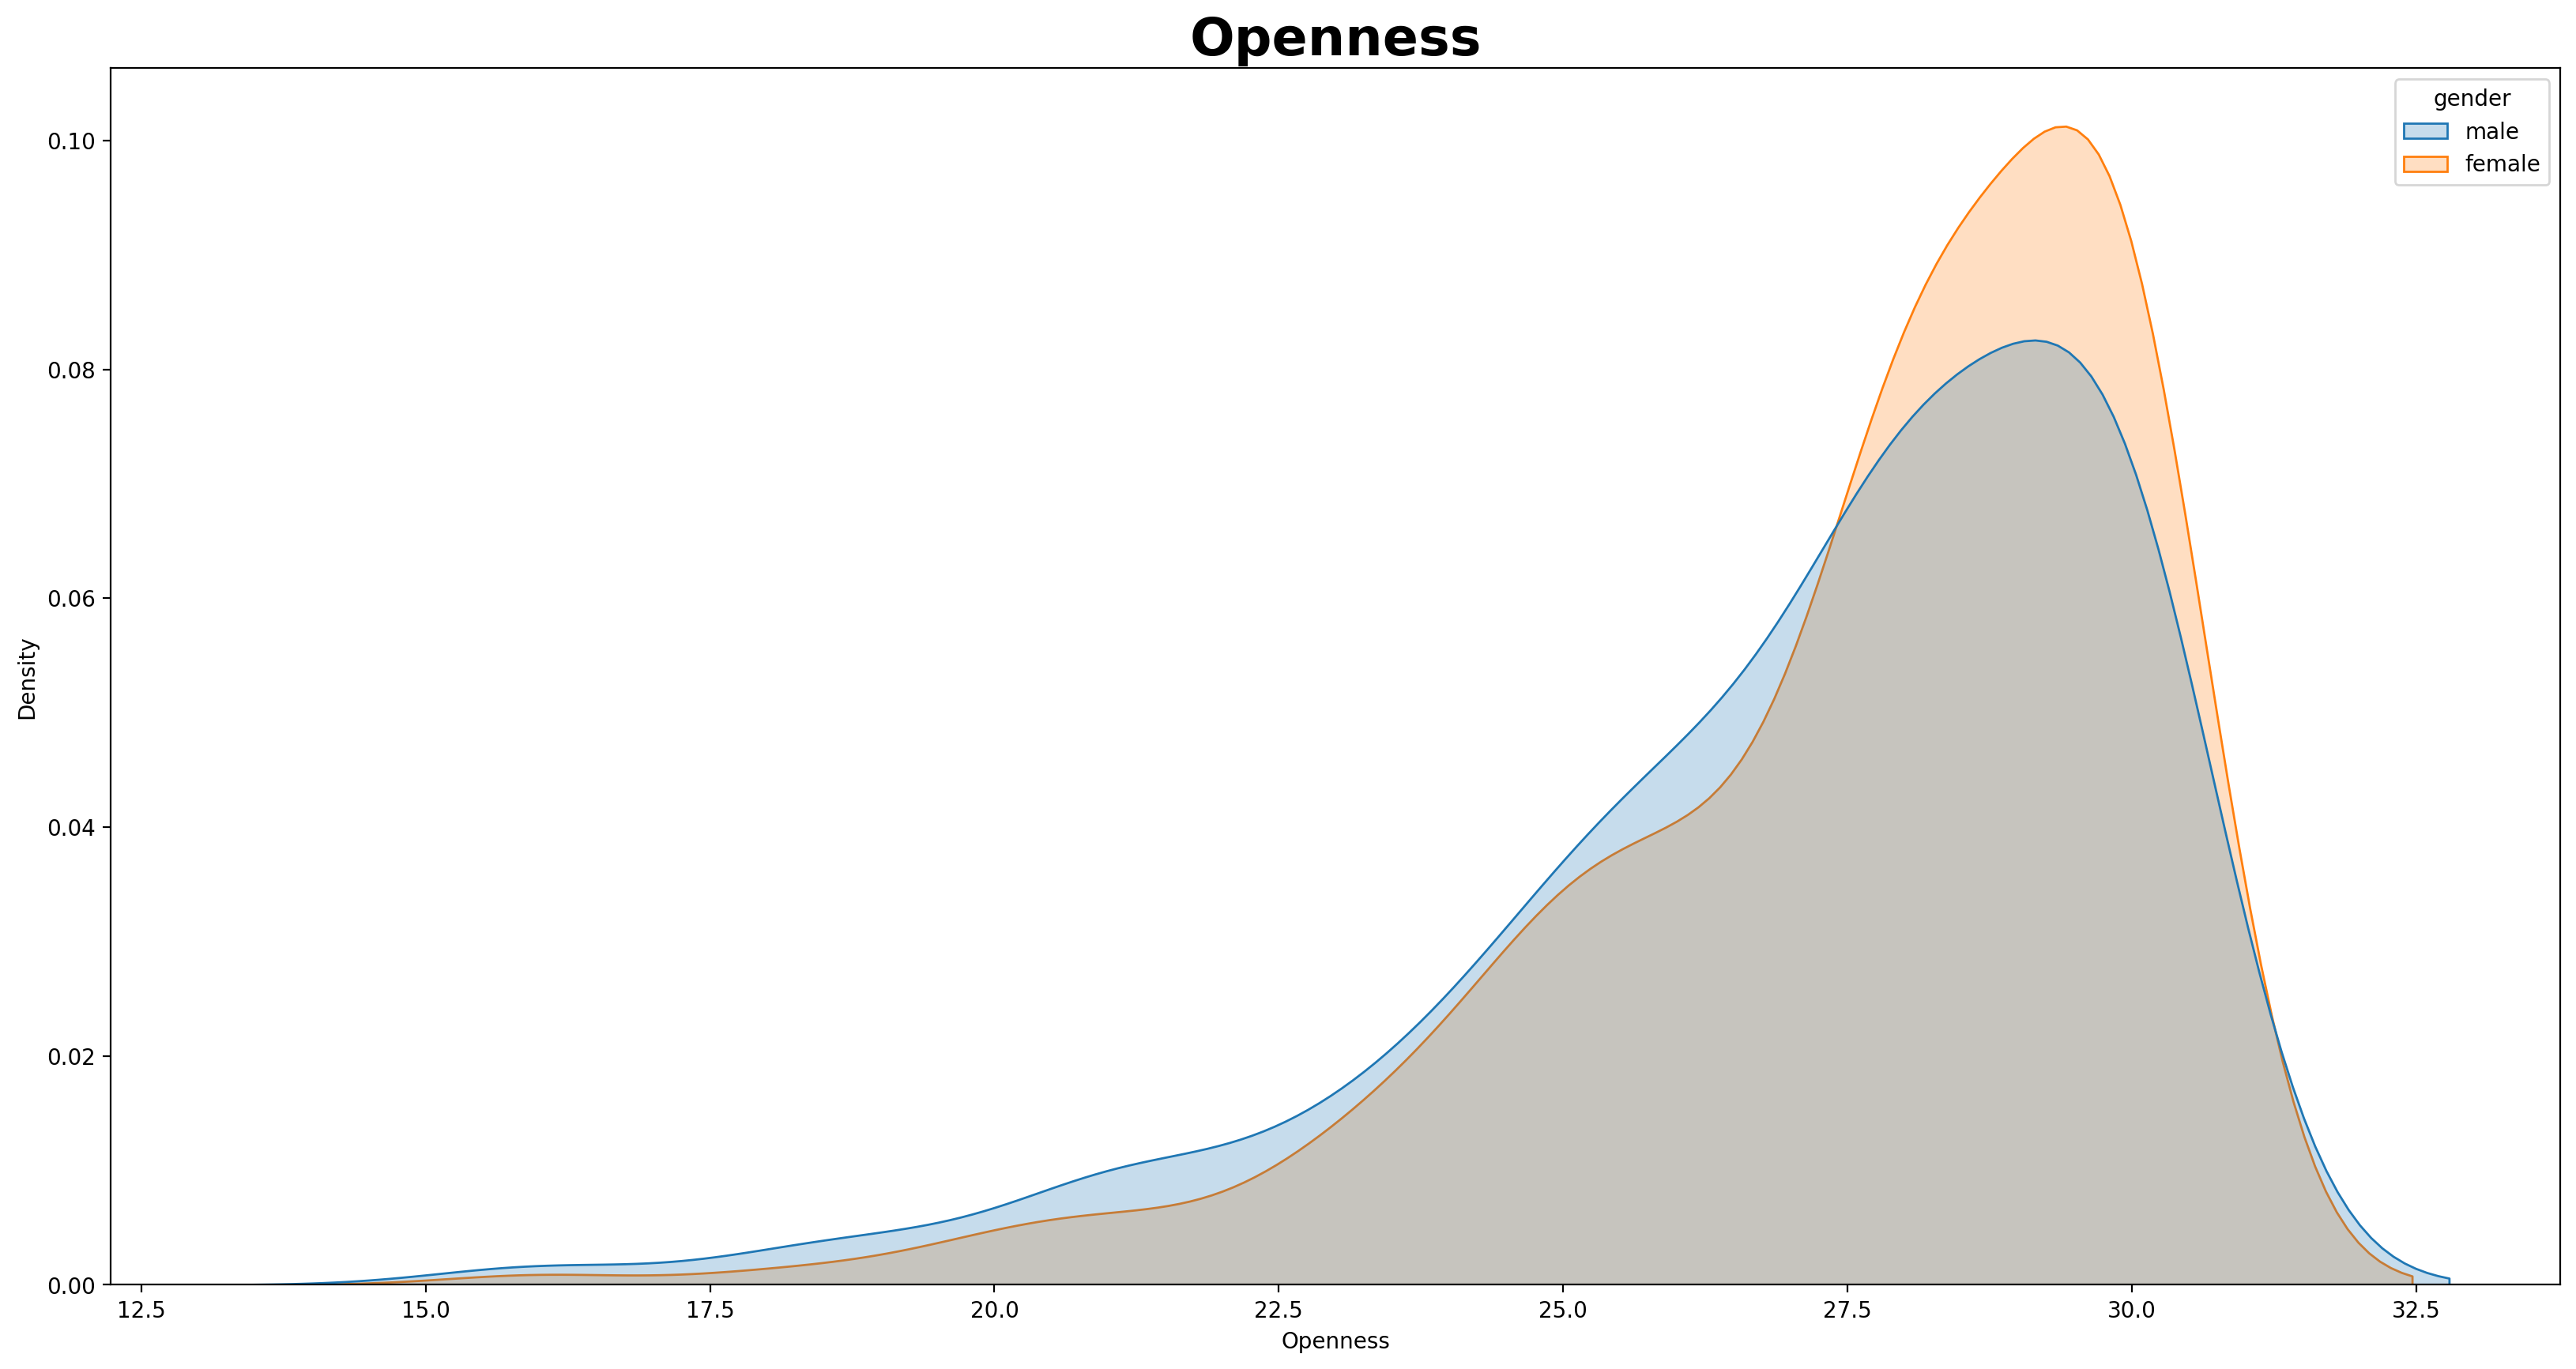

In [36]:
plt.figure(figsize=(20,10),dpi=200)
sns.kdeplot(data = user_features, x='openness',fill=True,hue='gender')
plt.xlabel("Openness")
plt.ylabel("Density")
plt.title('Openness',fontsize =24,fontweight = 'bold')

plt.show()

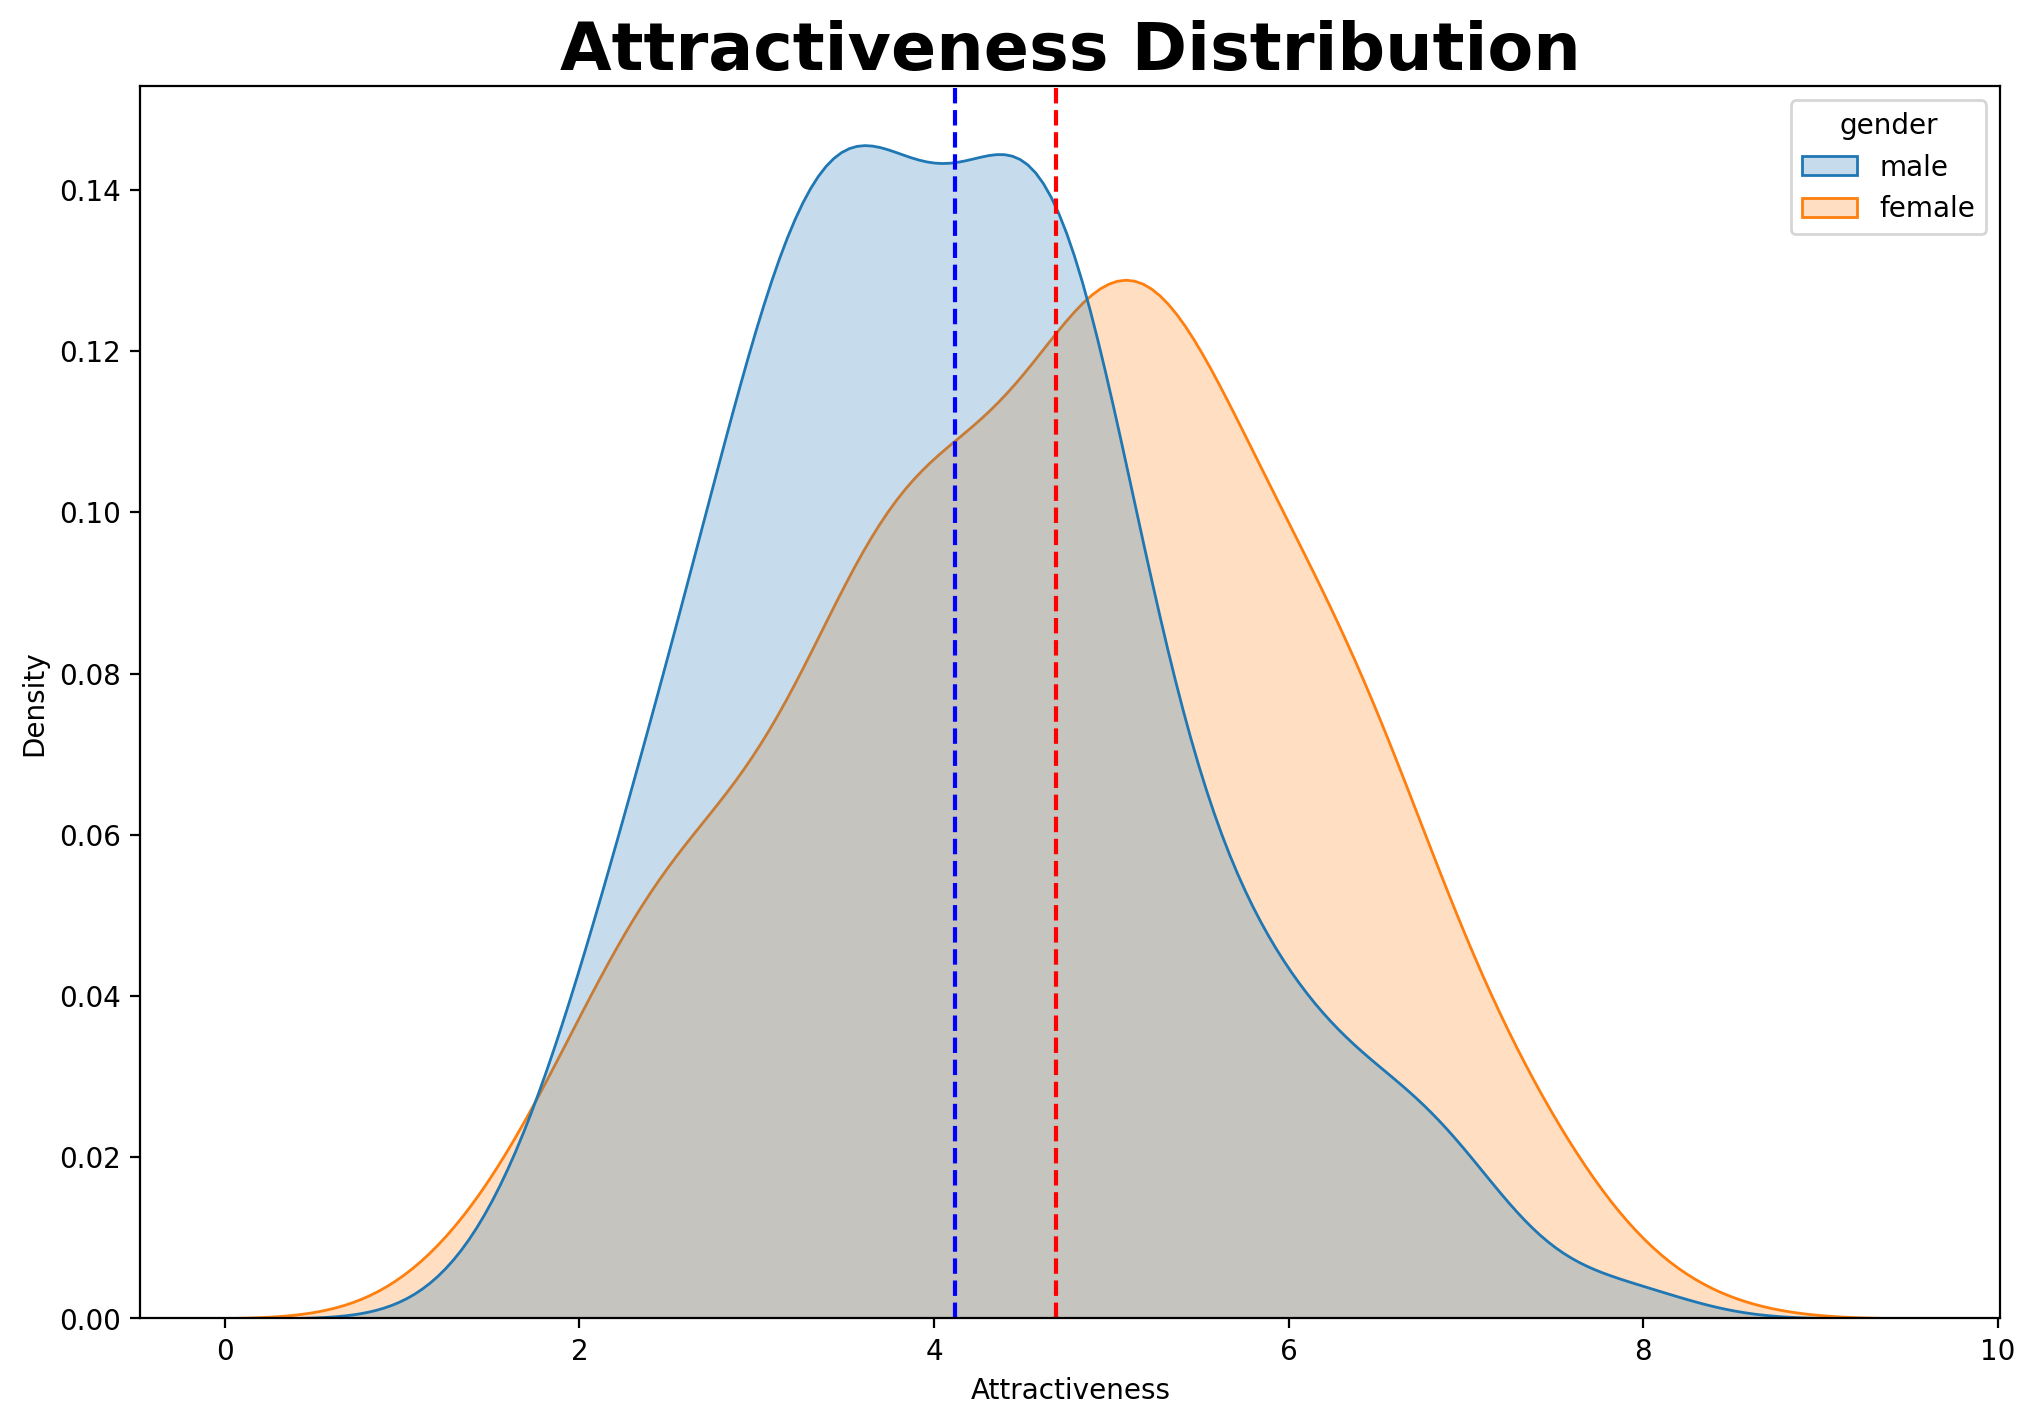

In [37]:
plt.figure(figsize=(12,8),dpi=200)
sns.kdeplot(data = user_features,hue='gender', x='avg_physical_attractiveness_rating',fill=True,clip=[0,10])
plt.xlabel("Attractiveness")
plt.ylabel("Density")
plt.title('Attractiveness Distribution',fontsize =24,fontweight = 'bold')

plt.axvline(x= user_features[user_features['gender']=='male']['avg_physical_attractiveness_rating'].mean(),  color='blue', linestyle='--', label='Male Mean')
plt.axvline(x=user_features[user_features['gender']=='female']['avg_physical_attractiveness_rating'].mean(),  color='red', linestyle='--', label='Female Mean')
plt.show()

In [38]:
user_features[user_features['gender']=='male']['avg_physical_attractiveness_rating'].mean().round(1)

4.1

In [39]:
user_features[user_features['gender']=='female']['avg_physical_attractiveness_rating'].mean().round(1)

4.7

Females rate males below average, while males rate females really accurately (really close to a normal distribution centered in 5)

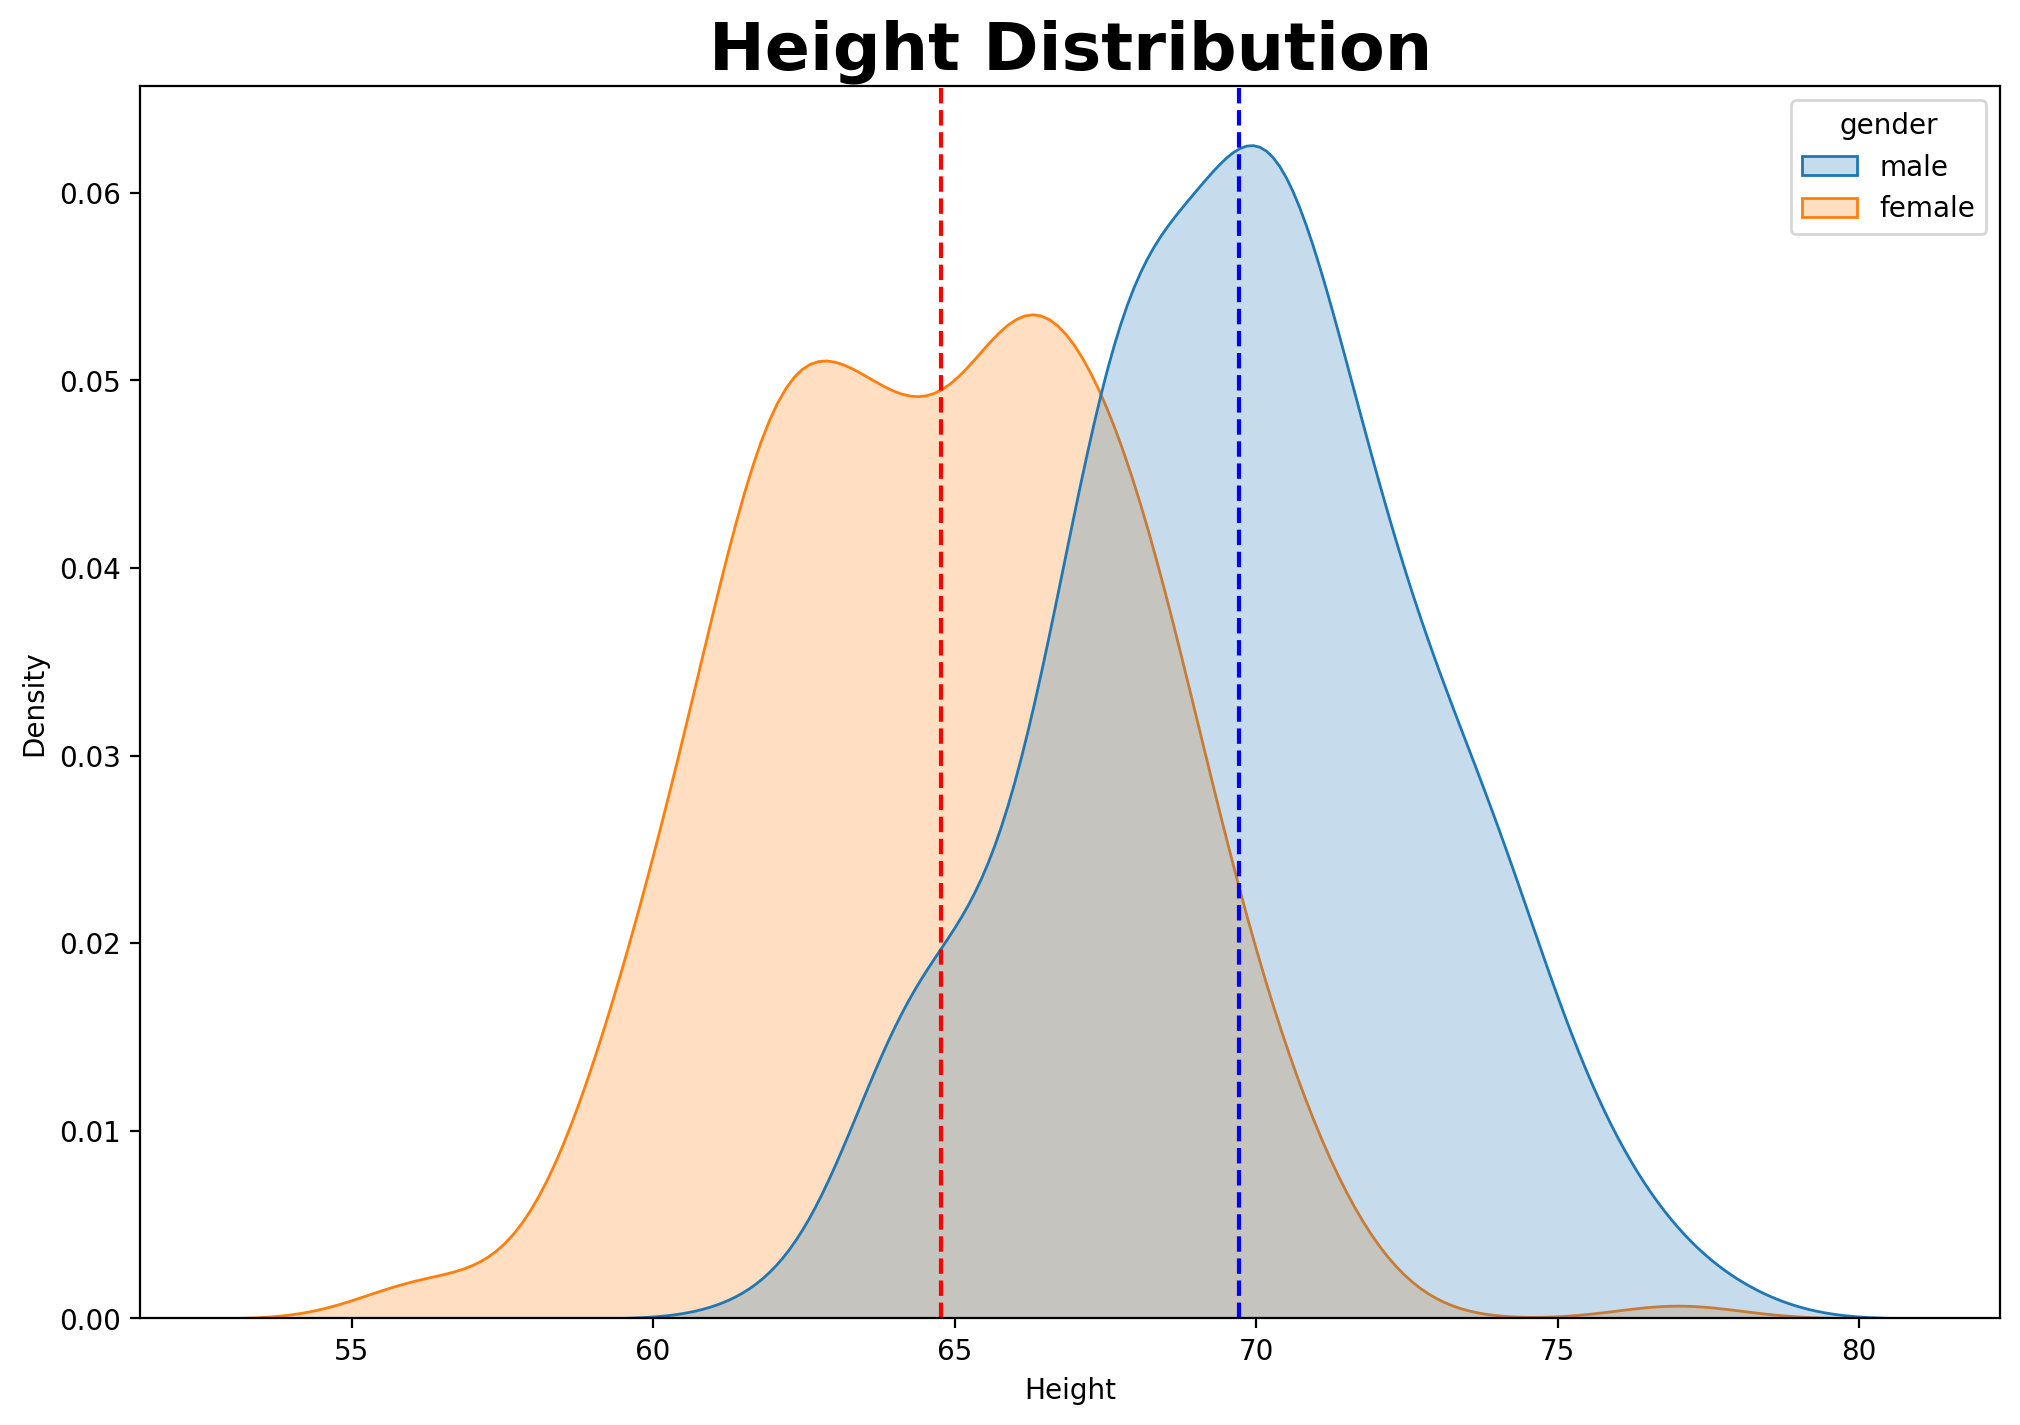

In [40]:
plt.figure(figsize=(12,8),dpi=200)
sns.kdeplot(data = user_features,hue='gender', x='height_inches',fill=True)
plt.xlabel("Height")
plt.ylabel("Density")
plt.title('Height Distribution',fontsize =24,fontweight = 'bold')

plt.axvline(x= user_features[user_features['gender']=='male']['height_inches'].mean(),  color='blue', linestyle='--', label='Male Mean')
plt.axvline(x=user_features[user_features['gender']=='female']['height_inches'].mean(),  color='red', linestyle='--', label='Female Mean')
plt.show()

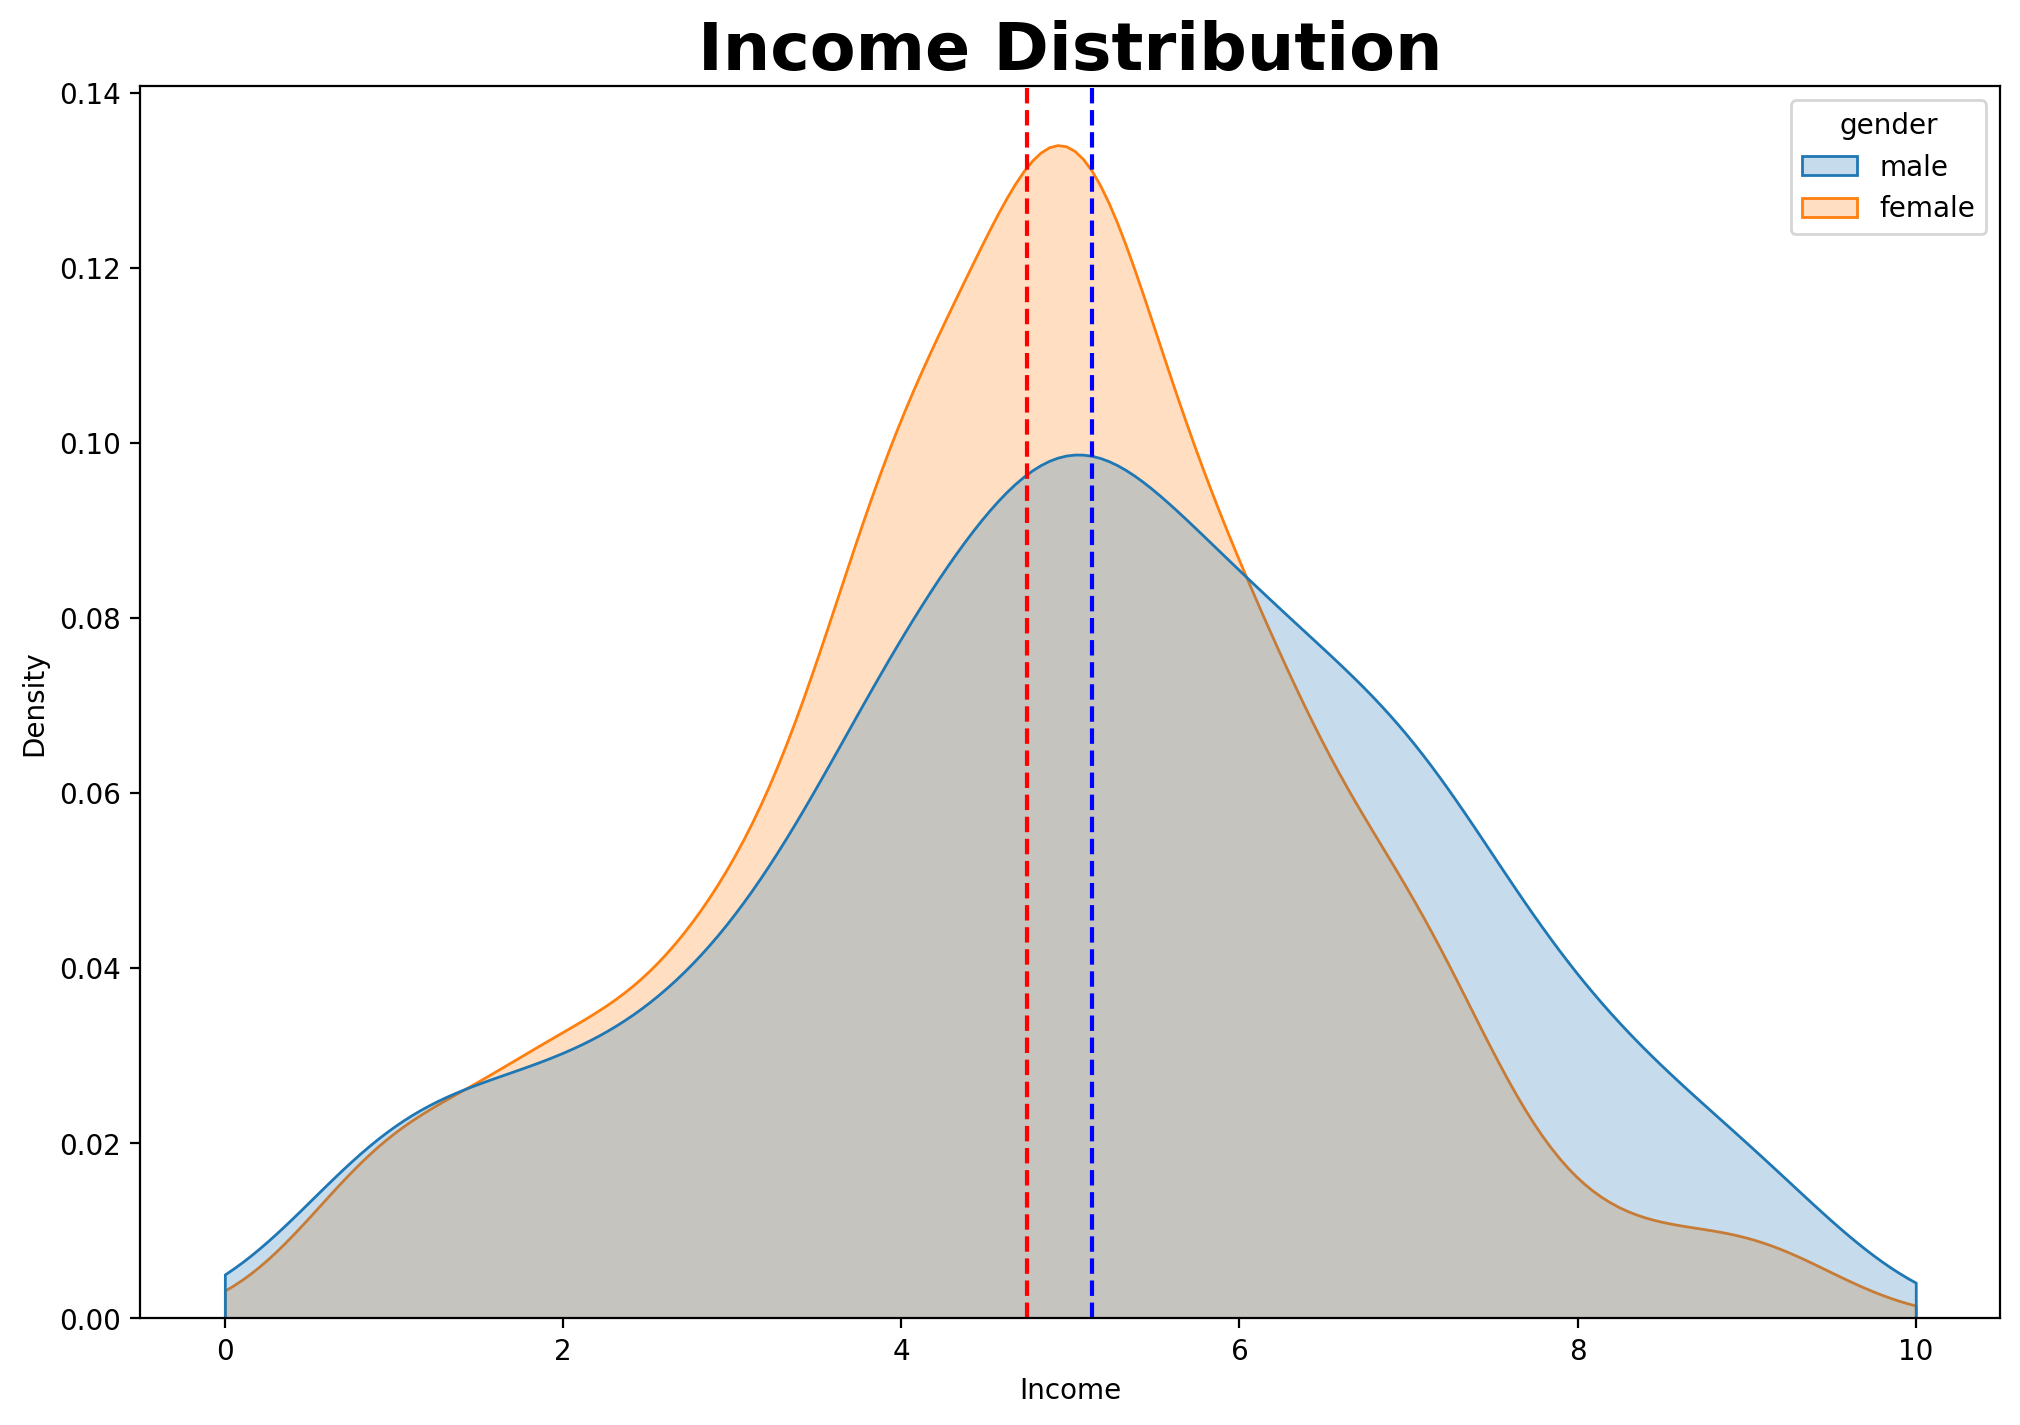

In [41]:
plt.figure(figsize=(12,8),dpi=200)
sns.kdeplot(data = user_features,hue='gender', x='income_bucket',fill=True, clip=[0,10])
plt.xlabel("Income")
plt.ylabel("Density")
plt.title('Income Distribution',fontsize =24,fontweight = 'bold')

plt.axvline(x= user_features[user_features['gender']=='male']['income_bucket'].mean(),  color='blue', linestyle='--', label='Male Mean')
plt.axvline(x=user_features[user_features['gender']=='female']['income_bucket'].mean(),  color='red', linestyle='--', label='Female Mean')
plt.show()

Means are close but if we look at the right tail, there are more men making big money

In [42]:
custom_palette = {"male": "#3376FE", "female": "#FF65FD"}

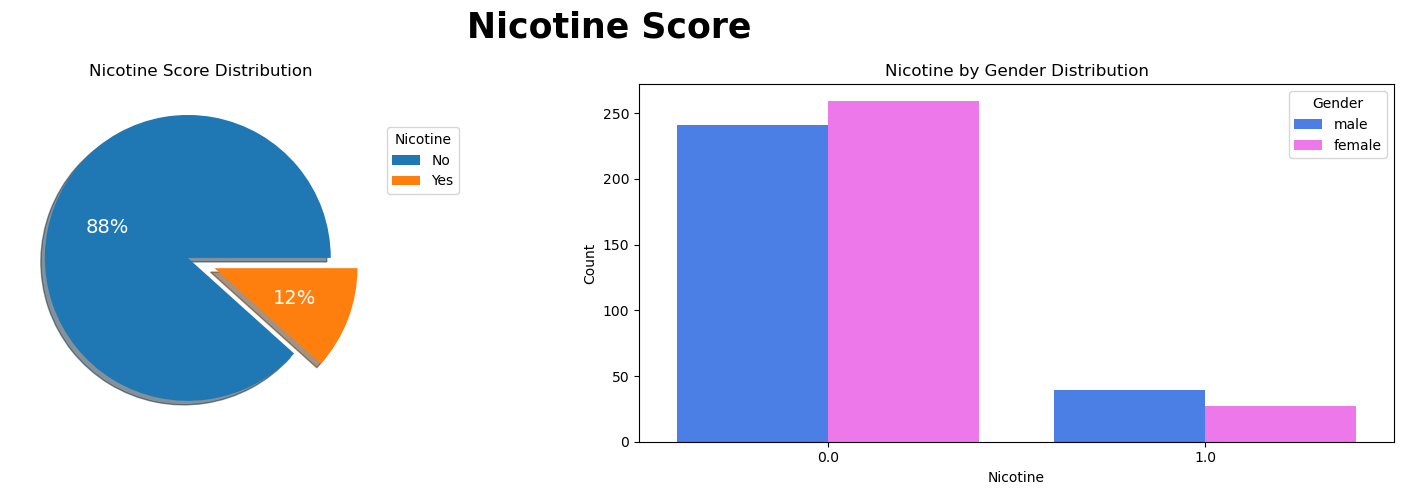

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Barplot
sns.countplot(x='nicotine_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Nicotine by Gender Distribution')
ax[1].set_xlabel('Nicotine')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart
user_features['nicotine_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=[.1 for _ in range(user_features['nicotine_score'].nunique())], autopct='%1.f%%', textprops={'size': 14, 'color': 'white'})
ax[0].set_title('Nicotine Score Distribution')
ax[0].set_ylabel(None)

# Mapping labels to the values
score_mapping = {0: 'No', 1: 'Yes'}
labels = [score_mapping[val] for val in user_features['nicotine_score'].value_counts().index]
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Nicotine')


# Display
fig.suptitle('Nicotine Score', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

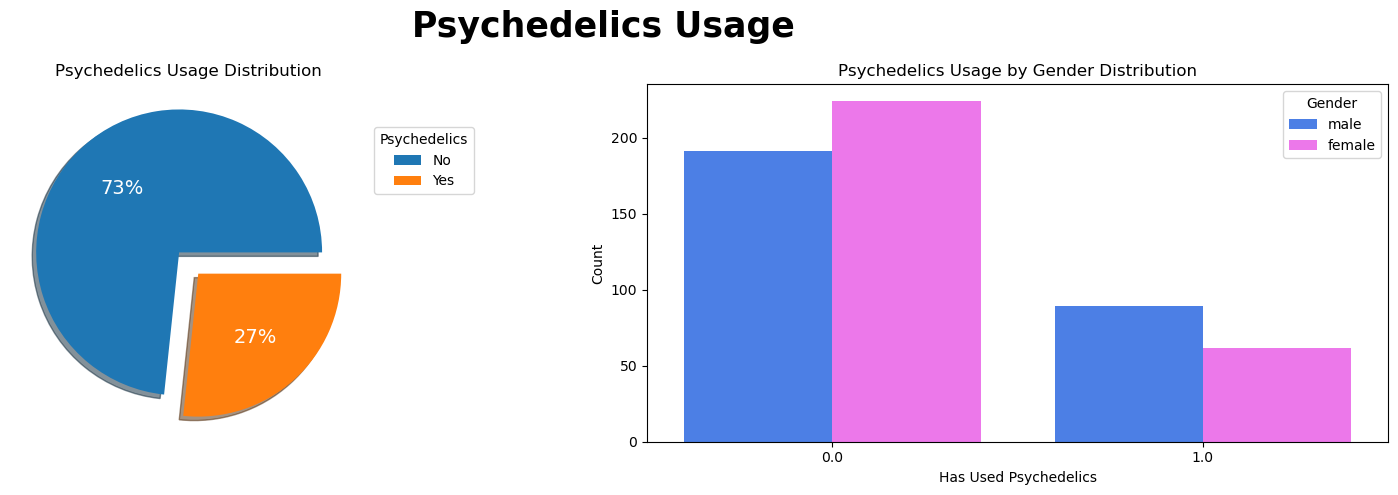

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Bar plot
sns.countplot(x='has_used_psychedelics', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Psychedelics Usage by Gender Distribution')
ax[1].set_xlabel('Has Used Psychedelics')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart
explode = [0.1 for _ in range(user_features['has_used_psychedelics'].nunique())]

pie = user_features['has_used_psychedelics'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'})
# Mapping labels to the values
score_mapping = {0: 'No', 1: 'Yes'}
labels = [score_mapping[val] for val in user_features['has_used_psychedelics'].value_counts().index]



# Final adjustments and display the figure
ax[0].set_title('Psychedelics Usage Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Psychedelics')
fig.suptitle('Psychedelics Usage', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

Has ever used psychedelics

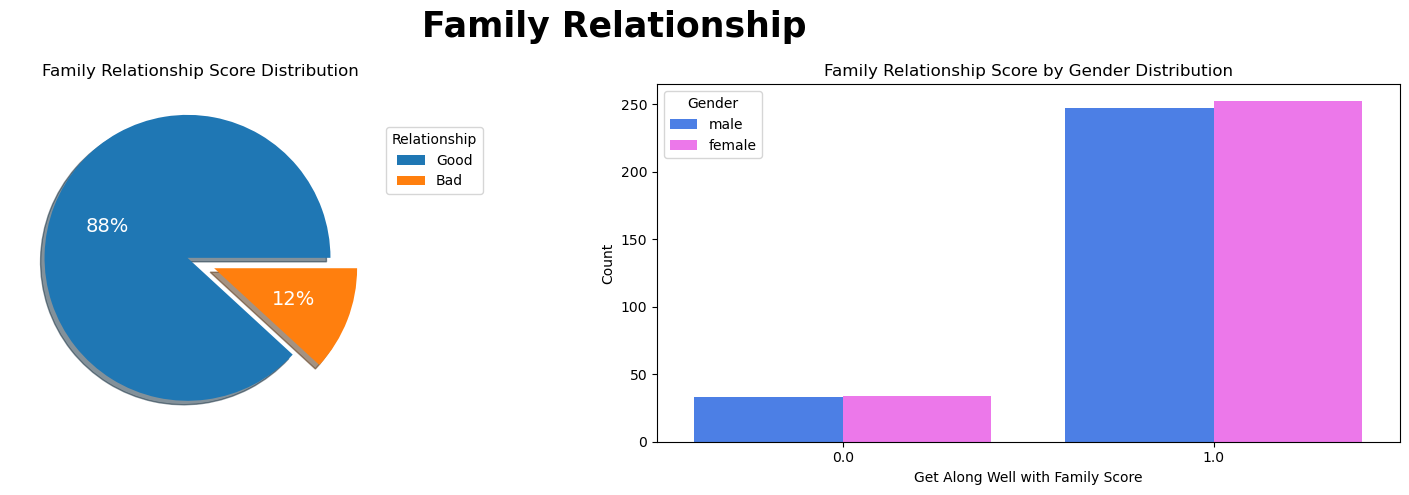

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Bar plot
sns.countplot(x='get_along_well_with_family_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Family Relationship Score by Gender Distribution')
ax[1].set_xlabel('Get Along Well with Family Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart
explode = [0.1 for _ in range(user_features['get_along_well_with_family_score'].nunique())]


pie = user_features['get_along_well_with_family_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'})
# Mapping labels to the values
score_mapping = {0: 'Bad', 1: 'Good'}
labels = [score_mapping[val] for val in user_features['get_along_well_with_family_score'].value_counts().index]


# Final adjustments and display the figure
ax[0].set_title('Family Relationship Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Relationship')
fig.suptitle('Family Relationship', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

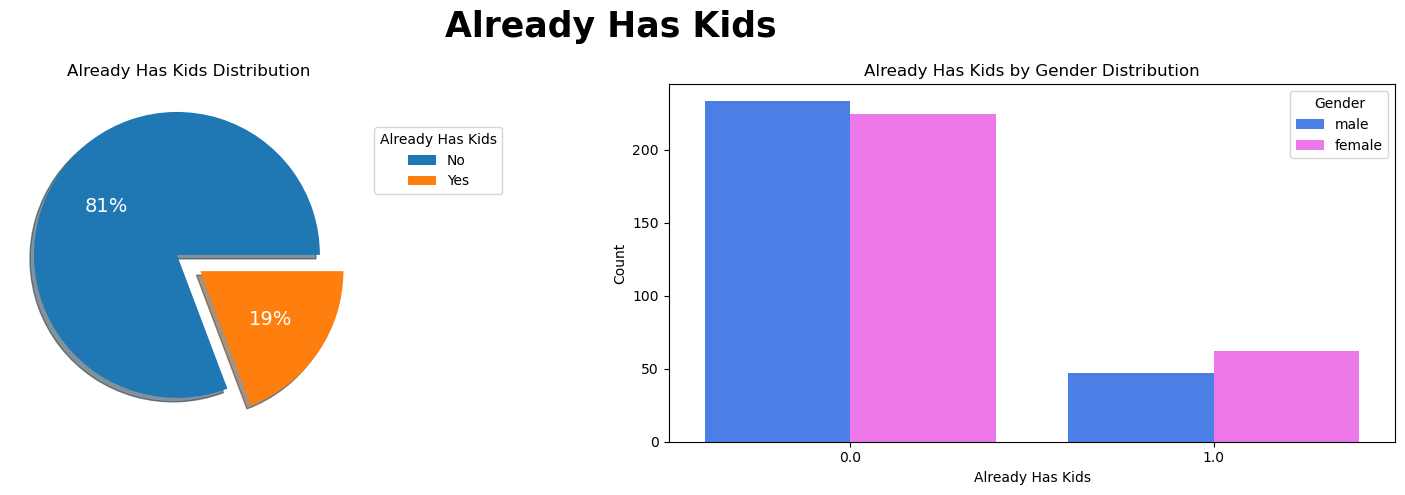

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Bar plot
sns.countplot(x='already_has_kids', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Already Has Kids by Gender Distribution')
ax[1].set_xlabel('Already Has Kids')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart
explode = [0.1 for _ in range(user_features['already_has_kids'].nunique())]

pie = user_features['already_has_kids'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'})

# Mapping labels to the values
score_mapping = {0: 'No', 1: 'Yes'}
labels = [score_mapping[val] for val in user_features['already_has_kids'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Already Has Kids Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Already Has Kids')
fig.suptitle('Already Has Kids', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

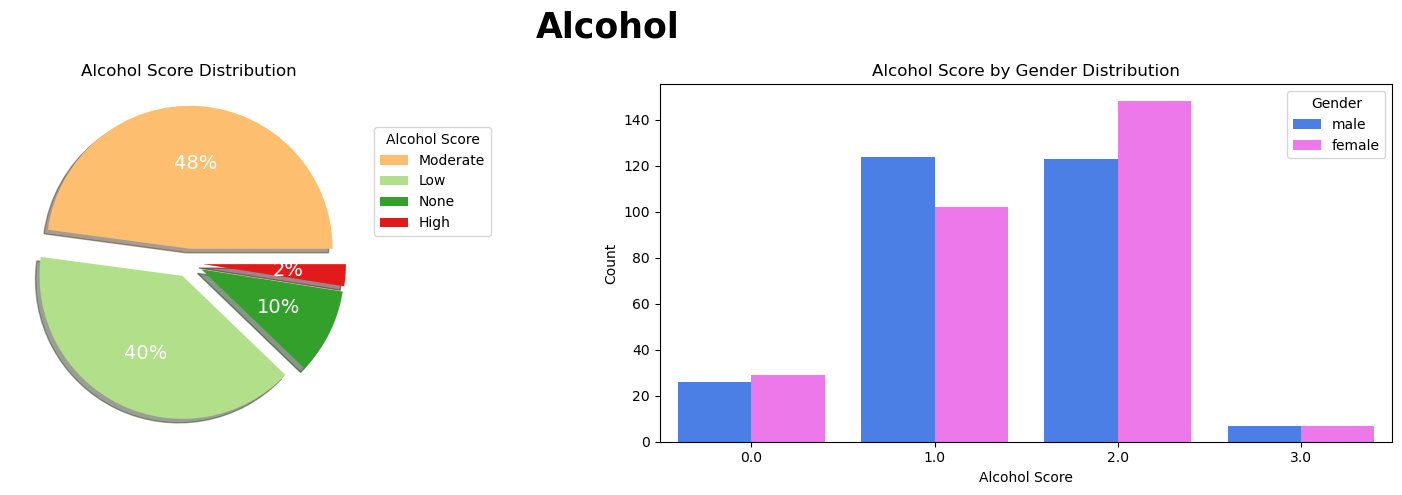

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each alcohol score category
custom_colors = sns.color_palette("Paired", 8)  # Generating a palette with 8 colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[6], custom_colors[2], custom_colors[3], custom_colors[5]]

# Bar plot
sns.countplot(x='alcohol_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Alcohol Score by Gender Distribution')
ax[1].set_xlabel('Alcohol Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart
explode = [0.1 for _ in range(user_features['alcohol_score'].nunique())]

# Plotting the pie chart with custom colors
pie = user_features['alcohol_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values
score_mapping = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High'}
labels = [score_mapping[val] for val in user_features['alcohol_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Alcohol Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Alcohol Score')
fig.suptitle('Alcohol', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

Never, Monthly, Weekly, Daily

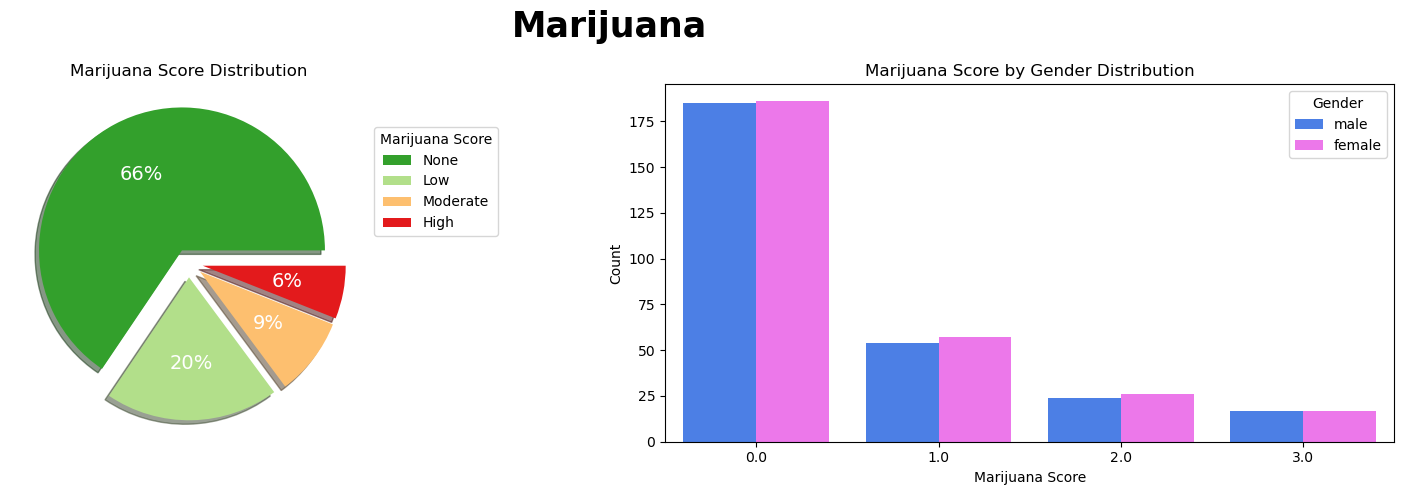

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each marijuana score category
custom_colors = sns.color_palette("Paired", 8)  # Generating a palette with 8 colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[3], custom_colors[2], custom_colors[6], custom_colors[5]]

# Bar plot for marijuana score by gender
sns.countplot(x='marijuana_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Marijuana Score by Gender Distribution')
ax[1].set_xlabel('Marijuana Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for marijuana score distribution
explode = [0.1 for _ in range(user_features['marijuana_score'].nunique())]

# Plotting the pie chart with custom colors for marijuana score
pie = user_features['marijuana_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for marijuana score
score_mapping = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High'}
labels = [score_mapping[val] for val in user_features['marijuana_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Marijuana Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Marijuana Score')
fig.suptitle('Marijuana', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

Never, Monthly, Weekly, Daily

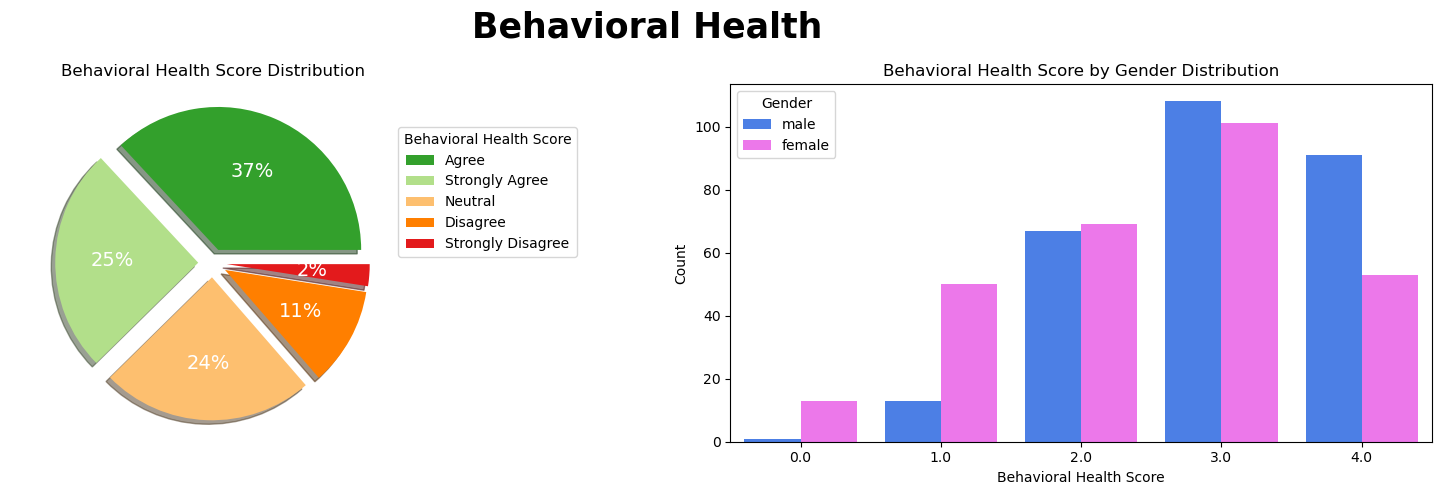

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each behavioral health score category
custom_colors = sns.color_palette("Paired", 8)  # Generating a palette with 8 colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[3], custom_colors[2], custom_colors[6], custom_colors[7],custom_colors[5]]

# Bar plot for behavioral health score by gender
sns.countplot(x='behavioral_health_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Behavioral Health Score by Gender Distribution')
ax[1].set_xlabel('Behavioral Health Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for behavioral health score distribution
explode = [0.1 for _ in range(user_features['behavioral_health_score'].nunique())]

# Plotting the pie chart with custom colors for behavioral health score
pie = user_features['behavioral_health_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for behavioral health score
score_mapping = {0: 'Strongly Disagree', 1: 'Disagree', 2: 'Neutral', 3: 'Agree', 4: 'Strongly Agree'}
labels = [score_mapping[val] for val in user_features['behavioral_health_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Behavioral Health Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Behavioral Health Score')
fig.suptitle('Behavioral Health', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


How strongly does the person agree with the following: I eat healthy, exercise, and am not overweight?

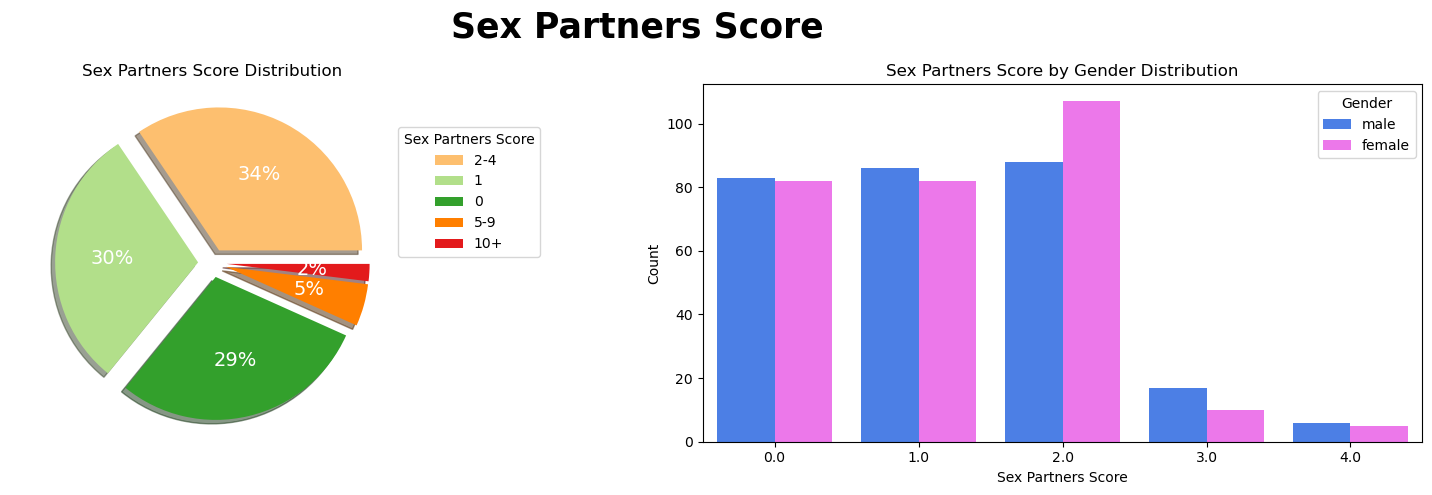

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each sex partners score category
custom_colors = sns.color_palette("Paired")  # Generating a palette with 8 colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[6], custom_colors[2], custom_colors[3], custom_colors[7], custom_colors[5]]

# Bar plot for sex partners score by gender
sns.countplot(x='sex_partners_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Sex Partners Score by Gender Distribution')
ax[1].set_xlabel('Sex Partners Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for sex partners score distribution
explode = [0.1 for _ in range(user_features['sex_partners_score'].nunique())]

# Plotting the pie chart with custom colors for sex partners score
pie = user_features['sex_partners_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for sex partners score
score_mapping = {0: '0', 1: '1', 2: '2-4', 3: '5-9', 4: '10+'}
labels = [score_mapping[val] for val in user_features['sex_partners_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Sex Partners Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Sex Partners Score')
fig.suptitle('Sex Partners Score', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

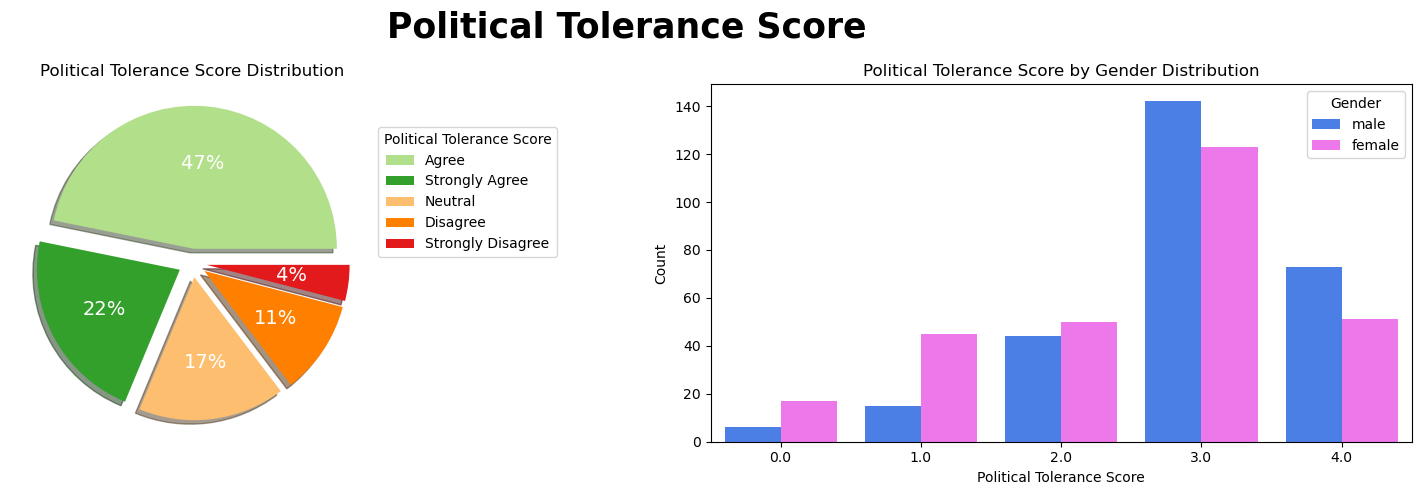

In [82]:

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each political tolerance score category
custom_colors = sns.color_palette("Paired")  # Generating a palette with default number of colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[2], custom_colors[3], custom_colors[6], custom_colors[7], custom_colors[5]]

# Bar plot for political tolerance score by gender
sns.countplot(x='political_tolerance_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Political Tolerance Score by Gender Distribution')
ax[1].set_xlabel('Political Tolerance Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for political tolerance score distribution
explode = [0.1 for _ in range(user_features['political_tolerance_score'].nunique())]

# Plotting the pie chart with custom colors for political tolerance score
pie = user_features['political_tolerance_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for political tolerance score
score_mapping = {0: 'Strongly Disagree', 1: 'Disagree', 2: 'Neutral', 3: 'Agree', 4: 'Strongly Agree'}
labels = [score_mapping[val] for val in user_features['political_tolerance_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Political Tolerance Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Political Tolerance Score')
fig.suptitle('Political Tolerance Score', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


To what degree does the following phrase describe you? Comfortable being friends with someone that disagrees with me on important political topics.

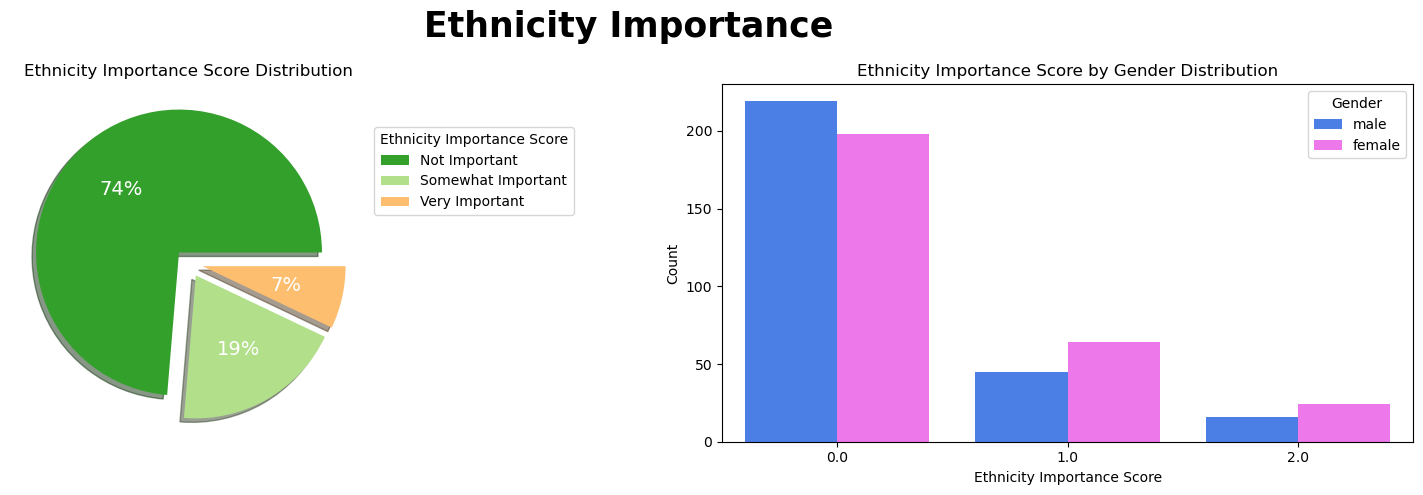

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each ethnicity importance score category
custom_colors = sns.color_palette("Paired", 8)  # Generating a palette with 8 colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[3], custom_colors[2], custom_colors[6]]

# Bar plot for ethnicity importance score by gender
sns.countplot(x='ethnicity_importance_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Ethnicity Importance Score by Gender Distribution')
ax[1].set_xlabel('Ethnicity Importance Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for ethnicity importance score distribution
explode = [0.1 for _ in range(user_features['ethnicity_importance_score'].nunique())]

# Plotting the pie chart with custom colors for ethnicity importance score
pie = user_features['ethnicity_importance_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for ethnicity importance score
score_mapping = {0: 'Not Important', 1: 'Somewhat Important', 2: 'Very Important'}
labels = [score_mapping[val] for val in user_features['ethnicity_importance_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Ethnicity Importance Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Ethnicity Importance Score')
fig.suptitle('Ethnicity Importance', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


How important is it that your romantic partner shares your ethnicity?

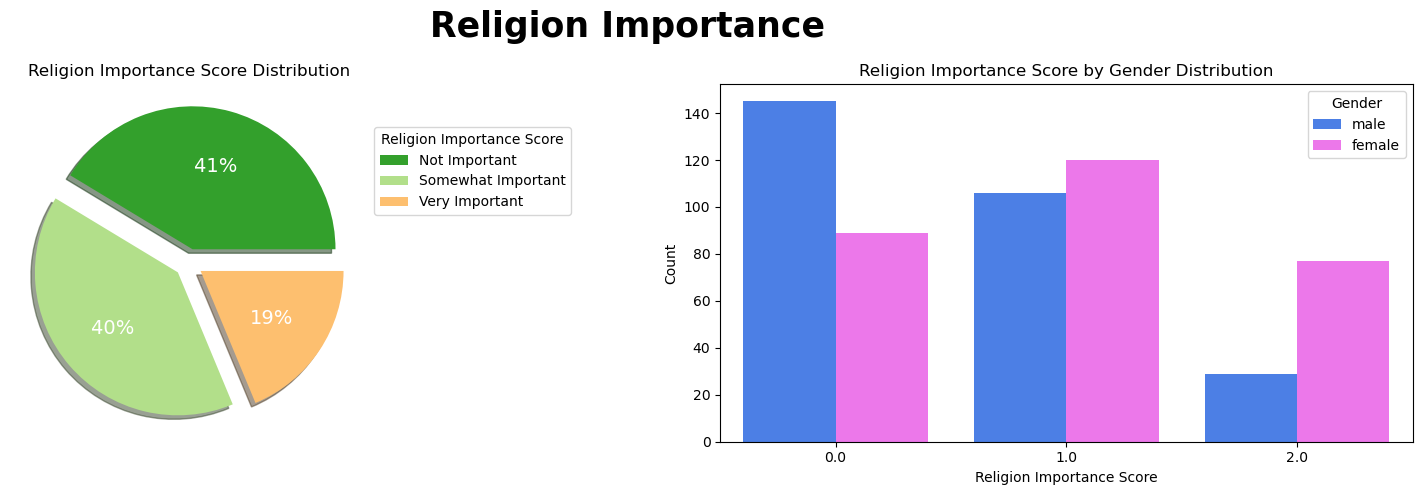

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each religion importance score category
custom_colors = sns.color_palette("Paired", 8)  # Generating a palette with 8 colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[3], custom_colors[2], custom_colors[6]]

# Bar plot for religion importance score by gender
sns.countplot(x='religion_importance_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Religion Importance Score by Gender Distribution')
ax[1].set_xlabel('Religion Importance Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for religion importance score distribution
explode = [0.1 for _ in range(user_features['religion_importance_score'].nunique())]

# Plotting the pie chart with custom colors for religion importance score
pie = user_features['religion_importance_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for religion importance score
score_mapping = {0: 'Not Important', 1: 'Somewhat Important', 2: 'Very Important'}
labels = [score_mapping[val] for val in user_features['religion_importance_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Religion Importance Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Religion Importance Score')
fig.suptitle('Religion Importance', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


How important is it that your romantic partner shares your religion?

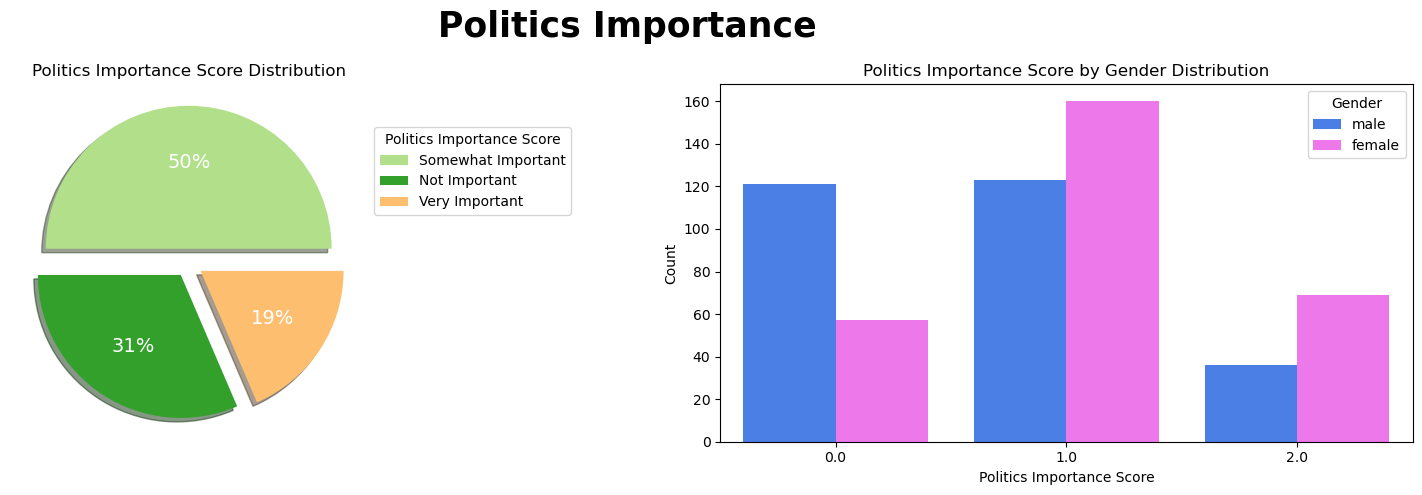

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each politics importance score category
custom_colors = sns.color_palette("Paired", 8)  # Generating a palette with 8 colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[2], custom_colors[3], custom_colors[6]]

# Bar plot for politics importance score by gender
sns.countplot(x='politics_importance_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Politics Importance Score by Gender Distribution')
ax[1].set_xlabel('Politics Importance Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for politics importance score distribution
explode = [0.1 for _ in range(user_features['politics_importance_score'].nunique())]

# Plotting the pie chart with custom colors for politics importance score
pie = user_features['politics_importance_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for politics importance score
score_mapping = {0: 'Not Important', 1: 'Somewhat Important', 2: 'Very Important'}
labels = [score_mapping[val] for val in user_features['politics_importance_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Politics Importance Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Politics Importance Score')
fig.suptitle('Politics Importance', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


How important is it that your romantic partner shares your political beliefs?

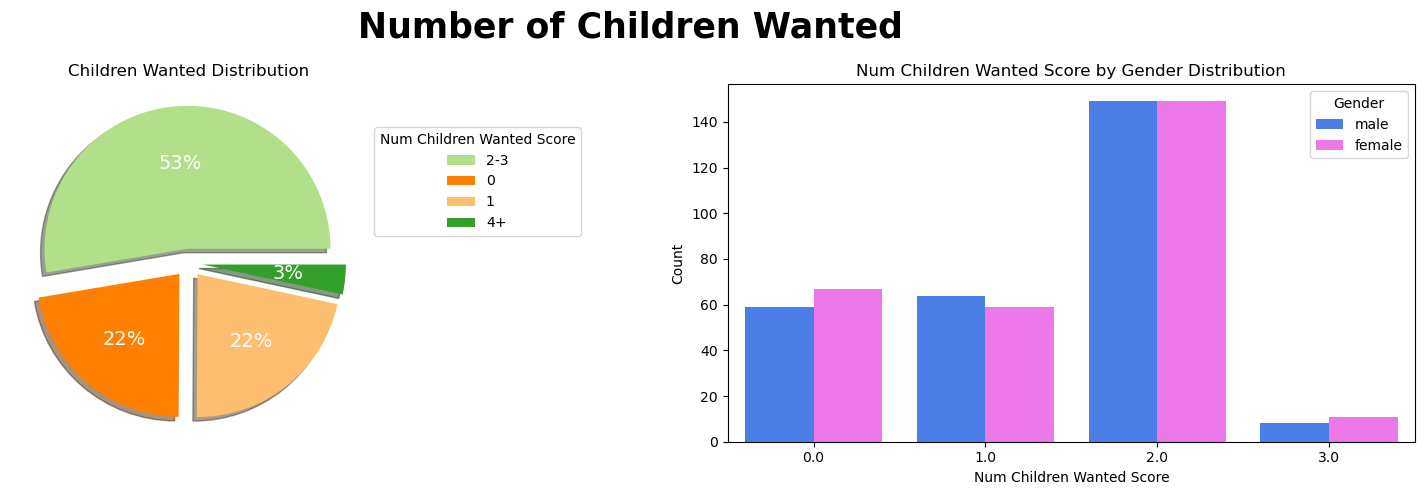

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each num children wanted score category
custom_colors = sns.color_palette("Paired", 8)  # Generating a palette with 8 colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[2], custom_colors[7], custom_colors[6], custom_colors[3]]

# Bar plot for num children wanted score by gender
sns.countplot(x='num_children_wanted_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Num Children Wanted Score by Gender Distribution')
ax[1].set_xlabel('Num Children Wanted Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for num children wanted score distribution
explode = [0.1 for _ in range(user_features['num_children_wanted_score'].nunique())]

# Plotting the pie chart with custom colors for num children wanted score
pie = user_features['num_children_wanted_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for num children wanted score
score_mapping = {0: '0', 1: '1', 2: '2-3', 3: '4+'}
labels = [score_mapping[val] for val in user_features['num_children_wanted_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Children Wanted Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Num Children Wanted Score')
fig.suptitle('Number of Children Wanted', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


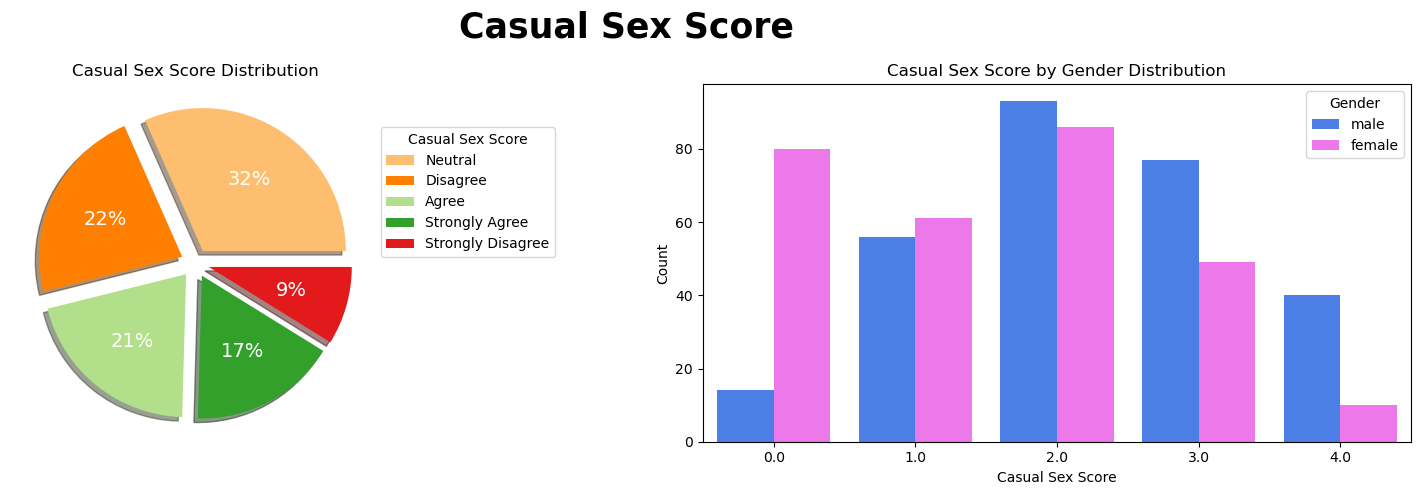

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each casual sex score category
custom_colors = sns.color_palette("Paired")  # Generating a palette with default number of colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[6], custom_colors[7], custom_colors[2], custom_colors[3], custom_colors[5]]

# Bar plot for casual sex score by gender
sns.countplot(x='casual_sex_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Casual Sex Score by Gender Distribution')
ax[1].set_xlabel('Casual Sex Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for casual sex score distribution
explode = [0.1 for _ in range(user_features['casual_sex_score'].nunique())]

# Plotting the pie chart with custom colors for casual sex score
pie = user_features['casual_sex_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for casual sex score
score_mapping = {0: 'Strongly Agree', 1: 'Agree', 2: 'Neutral', 3: 'Disagree', 4: 'Strongly Disagree'}
labels = [score_mapping[val] for val in user_features['casual_sex_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Casual Sex Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Casual Sex Score')
fig.suptitle('Casual Sex Score', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


"How strongly do you agree with the following: I do NOT want to have sex with a person until I am sure that we will have a long-term, serious relationship"

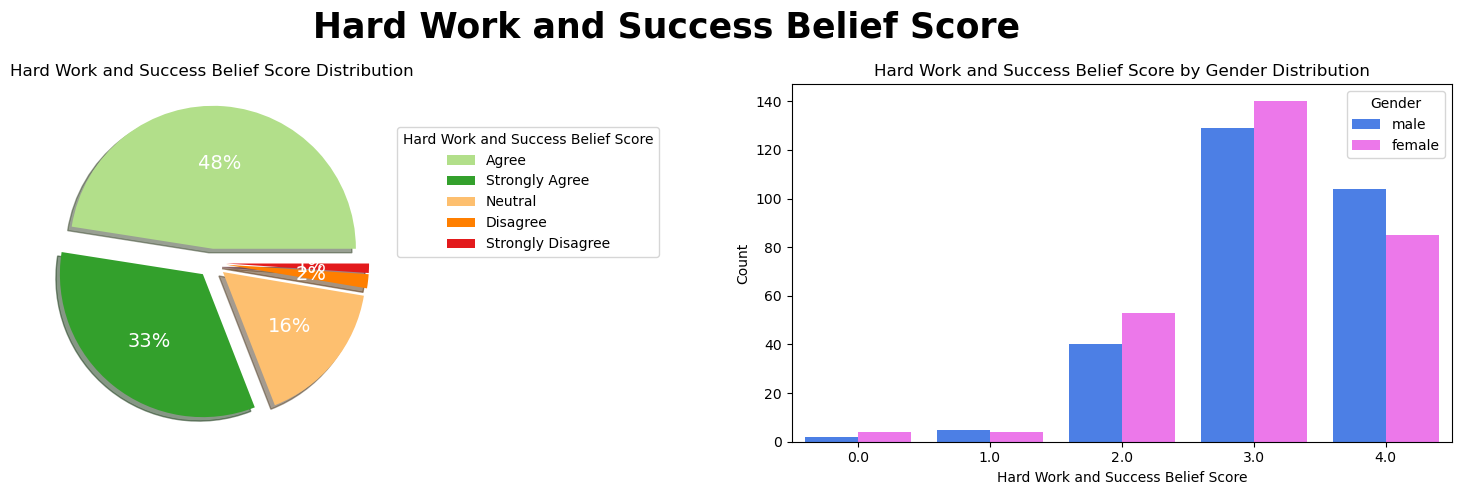

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

# Define custom colors for each hard work and success belief score category
custom_colors = sns.color_palette("Paired")  # Generating a palette with default number of colors

# Rearrange colors to fit the desired order
custom_colors_reordered = [custom_colors[2], custom_colors[3], custom_colors[6], custom_colors[7], custom_colors[5]]

# Bar plot for hard work and success belief score by gender
sns.countplot(x='hard_work_and_success_belief_score', hue='gender', data=user_features, palette=custom_palette, ax=ax[1])
ax[1].set_title('Hard Work and Success Belief Score by Gender Distribution')
ax[1].set_xlabel('Hard Work and Success Belief Score')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender')

# Pie chart for hard work and success belief score distribution
explode = [0.1 for _ in range(user_features['hard_work_and_success_belief_score'].nunique())]

# Plotting the pie chart with custom colors for hard work and success belief score
pie = user_features['hard_work_and_success_belief_score'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=explode, autopct='%1.f%%', textprops={'size': 14, 'color': 'white'}, colors=custom_colors_reordered)

# Mapping labels to the values for hard work and success belief score
score_mapping = {0: 'Strongly Disagree', 1: 'Disagree', 2: 'Neutral', 3: 'Agree', 4: 'Strongly Agree'}
labels = [score_mapping[val] for val in user_features['hard_work_and_success_belief_score'].value_counts().index]

# Final adjustments and display the figure
ax[0].set_title('Hard Work and Success Belief Score Distribution')
ax[0].set_ylabel(None)
ax[0].legend(labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Hard Work and Success Belief Score')
fig.suptitle('Hard Work and Success Belief Score', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


"How strongly do you agree with the following: I think hard work leads to success"

### Let's see some fun correlations

## Correlation Ideas:



#### 1. Correlation Matrix:
   Investigate correlations between various attributes. For instance, are there correlations between personality traits (Big 5) and the outcomes of dates (likeability, mutual interest)?

In [70]:

correlation_matrix = user_features.corr(numeric_only=True)
correlation_matrix

age  iq_share_correct  agreeableness  \
age                                 1.000000          0.070302       0.019123   
iq_share_correct                    0.070302          1.000000       0.252905   
agreeableness                       0.019123          0.252905       1.000000   
conscientiousness                   0.098454         -0.000188       0.149175   
extraversion                        0.090454          0.082451       0.047317   
neuroticism                        -0.156413         -0.098285      -0.159181   
openness                            0.036642          0.256515       0.220460   
avg_physical_attractiveness_rating -0.138004          0.130435       0.072965   
height_inches                       0.073210         -0.028532      -0.185681   
income_bucket                       0.267984          0.247460      -0.037160   
nicotine_score                      0.020051         -0.060783      -0.125687   
alcohol_score                       0.037867          0.059842      -0.045820   
marijuana_score                    -0.035155         -0.055573      -0.068543   
has_used_psychedelics              -0.010263          0.087672      -0.081008   
behavioral_health_score             0.066162          0.088619      -0.020899   
sex_partners_score                  0.008942         -0.027680      -0.093199   
get_along_well_with_family_score   -0.011936          0.119748       0.231899   
political_tolerance_score           0.067135         -0.075330      -0.033850   
ethnicity_importance_score          0.024774         -0.182238      -0.081981   
religion_importance_score           0.012513          0.026814       0.038656   
politics_importance_score          -0.042377          0.237832       0.045696   
num_children_wanted_score          -0.188491          0.015303      -0.037669   
already_has_kids                    0.333199         -0.159363       0.026820   
casual_sex_score                    0.095063          0.084079      -0.186148   
hard_work_and_success_belief_score -0.047445         -0.080336      -0.040965   

                                    conscientiousness  extraversion  \
age                                          0.098454      0.090454   
iq_share_correct                            -0.000188      0.082451   
agreeableness                                0.149175      0.047317   
conscientiousness                            1.000000      0.225811   
extraversion                                 0.225811      1.000000   
neuroticism                                 -0.147044     -0.280917   
openness                                     0.137490      0.403582   
avg_physical_attractiveness_rating           0.037570      0.162945   
height_inches                               -0.030877     -0.036342   
income_bucket                                0.048566      0.158552   
nicotine_score                              -0.074381     -0.000809   
alcohol_score                               -0.052763      0.149015   
marijuana_score                             -0.117227      0.046486   
has_used_psychedelics                       -0.086527      0.054613   
behavioral_health_score                      0.150082      0.134529   
sex_partners_score                           0.021377      0.164446   
get_along_well_with_family_score             0.138422      0.228839   
political_tolerance_score                    0.010397      0.100282   
ethnicity_importance_score                   0.076099     -0.054964   
religion_importance_score                    0.099560     -0.055835   
politics_importance_score                    0.006476     -0.046830   
num_children_wanted_score                    0.026697      0.010929   
already_has_kids                             0.157577      0.134535   
casual_sex_score                            -0.097334      0.067056   
hard_work_and_success_belief_score           0.200047      0.100496   

                                    neuroticism  openness  \
age                       

### Correlations Heatmap

<Axes: >

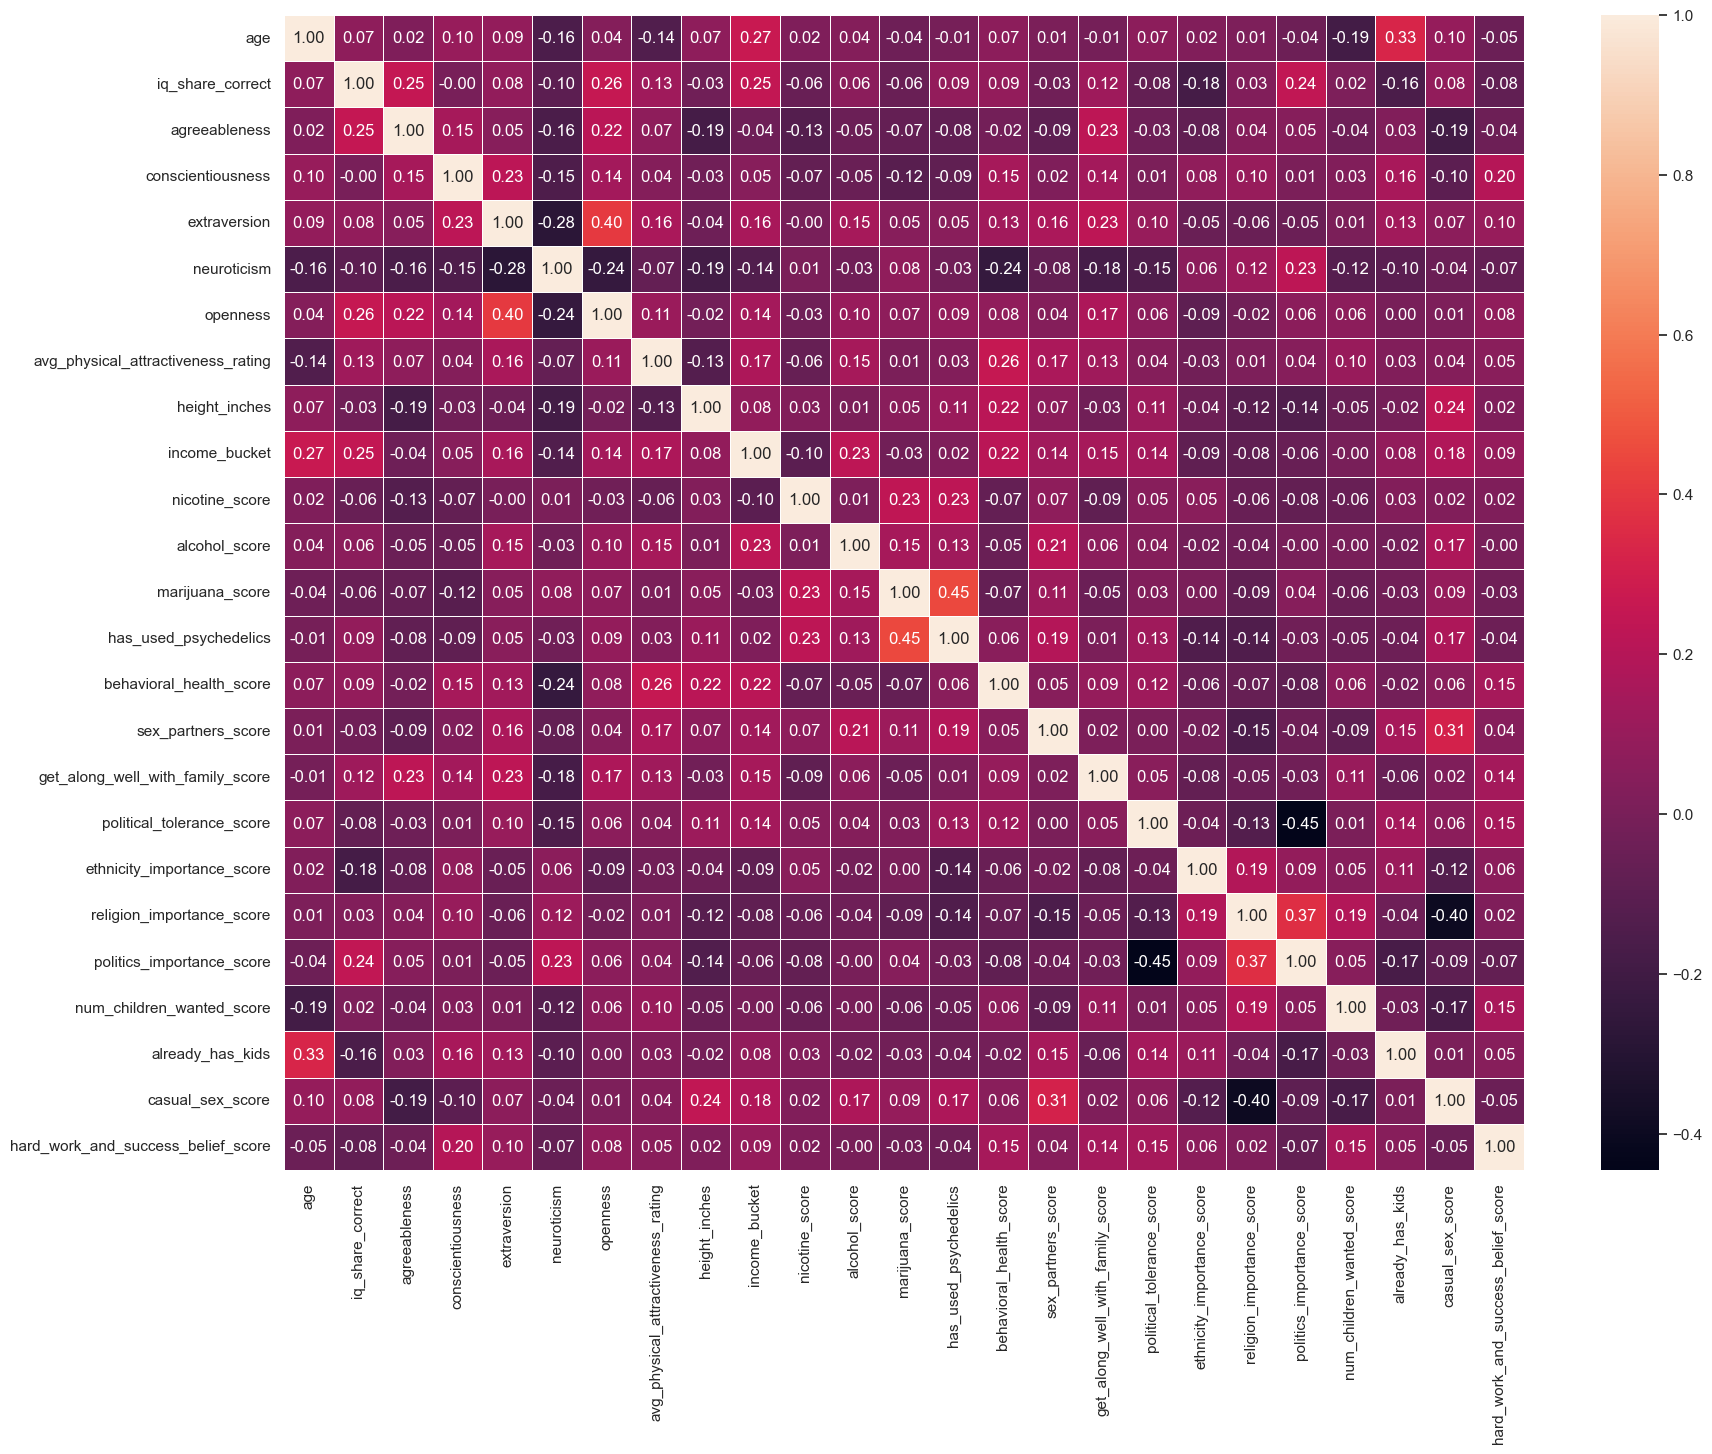

In [69]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(user_features.corr(numeric_only=True), annot=True, fmt=".2f", linewidths=.5, ax=ax)

### Biggest correlations overall

<Axes: >

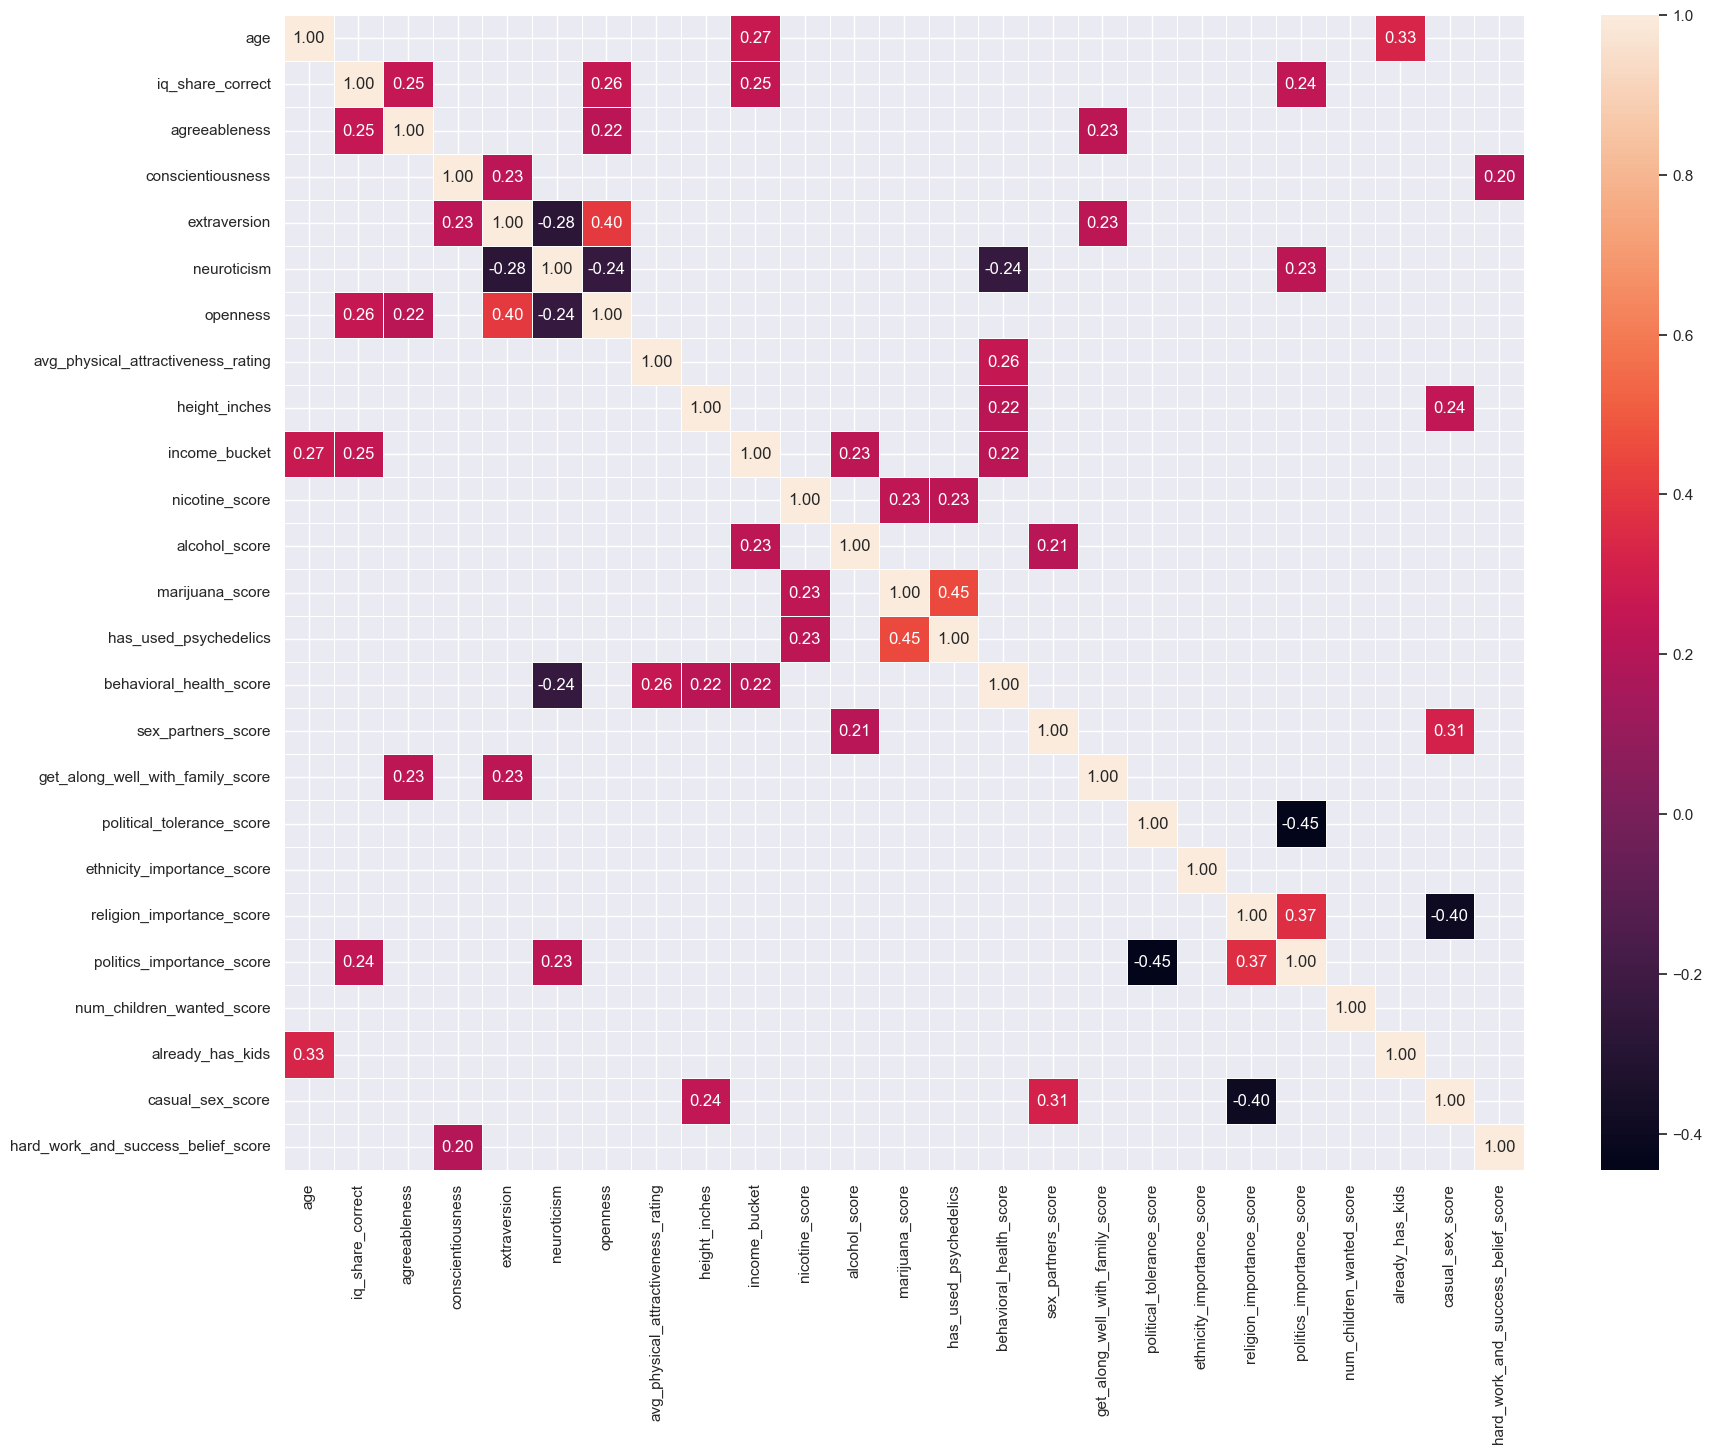

In [115]:
big_corr = user_features.corr(numeric_only=True)[(user_features.corr(numeric_only=True) > 0.2) | (user_features.corr(numeric_only=True) < -0.2)]

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(big_corr, annot=True, fmt=".2f", linewidths=.5, ax=ax)

In [119]:
big_corr = big_corr[big_corr !=1]
round(big_corr.stack().drop_duplicates().sort_values(ascending=False),2)

marijuana_score                     has_used_psychedelics                 0.45
extraversion                        openness                              0.40
religion_importance_score           politics_importance_score             0.37
age                                 already_has_kids                      0.33
sex_partners_score                  casual_sex_score                      0.31
age                                 income_bucket                         0.27
avg_physical_attractiveness_rating  behavioral_health_score               0.26
iq_share_correct                    openness                              0.26
                                    agreeableness                         0.25
                                    income_bucket                         0.25
height_inches                       casual_sex_score                      0.24
iq_share_correct                    politics_importance_score             0.24
nicotine_score                      marijuana_score 

### Surprising Correlations:
1. **Height vs. Casual Sex (0.24):** Surprising correlation, as one might not immediately associate a person's height with their engagement in casual sexual activities.

2. **IQ Share vs. Politics Importance (0.24):** Intriguing correlation between intelligence quotient and the importance given to politics, suggesting a potential link between cognitive abilities and political interest.

3. **Income vs. Alcohol Score (0.23):** Notable correlation, indicating a relationship between income levels and alcohol consumption, which might present insights into spending habits or lifestyle choices associated with income.


## Personality correlations

### Positive Correlations:
1. **Extraversion vs. Openness (0.40):** Indicates a substantial positive correlation between extraversion and openness. People who exhibit extraversion traits tend to be more open to new experiences.

2. **Agreeableness vs. Get Along Well with Family Score (0.23):** Suggests a moderate positive correlation. Individuals who score higher on agreeableness might have better family relationships.

### Negative Correlations:
1. **Extraversion vs. Neuroticism (-0.28):** Shows a moderate negative correlation. Individuals exhibiting higher levels of extraversion might have lower levels of neuroticism, indicating emotional stability.

2. **Neuroticism vs. Behavioral Health Score (-0.24):** Highlights a moderate negative correlation. Higher neuroticism might correlate with lower scores in behavioral health.



It would be interesting to separate the correlations for males/females

### Correlations for males

In [241]:
male_big_corr = user_features[user_features['gender'] == 'male'].corr(numeric_only=True)[(user_features[user_features['gender'] == 'male'].corr(numeric_only=True) > 0.2) | (user_features[user_features['gender'] == 'male'].corr(numeric_only=True) < -0.2)]


<Axes: >

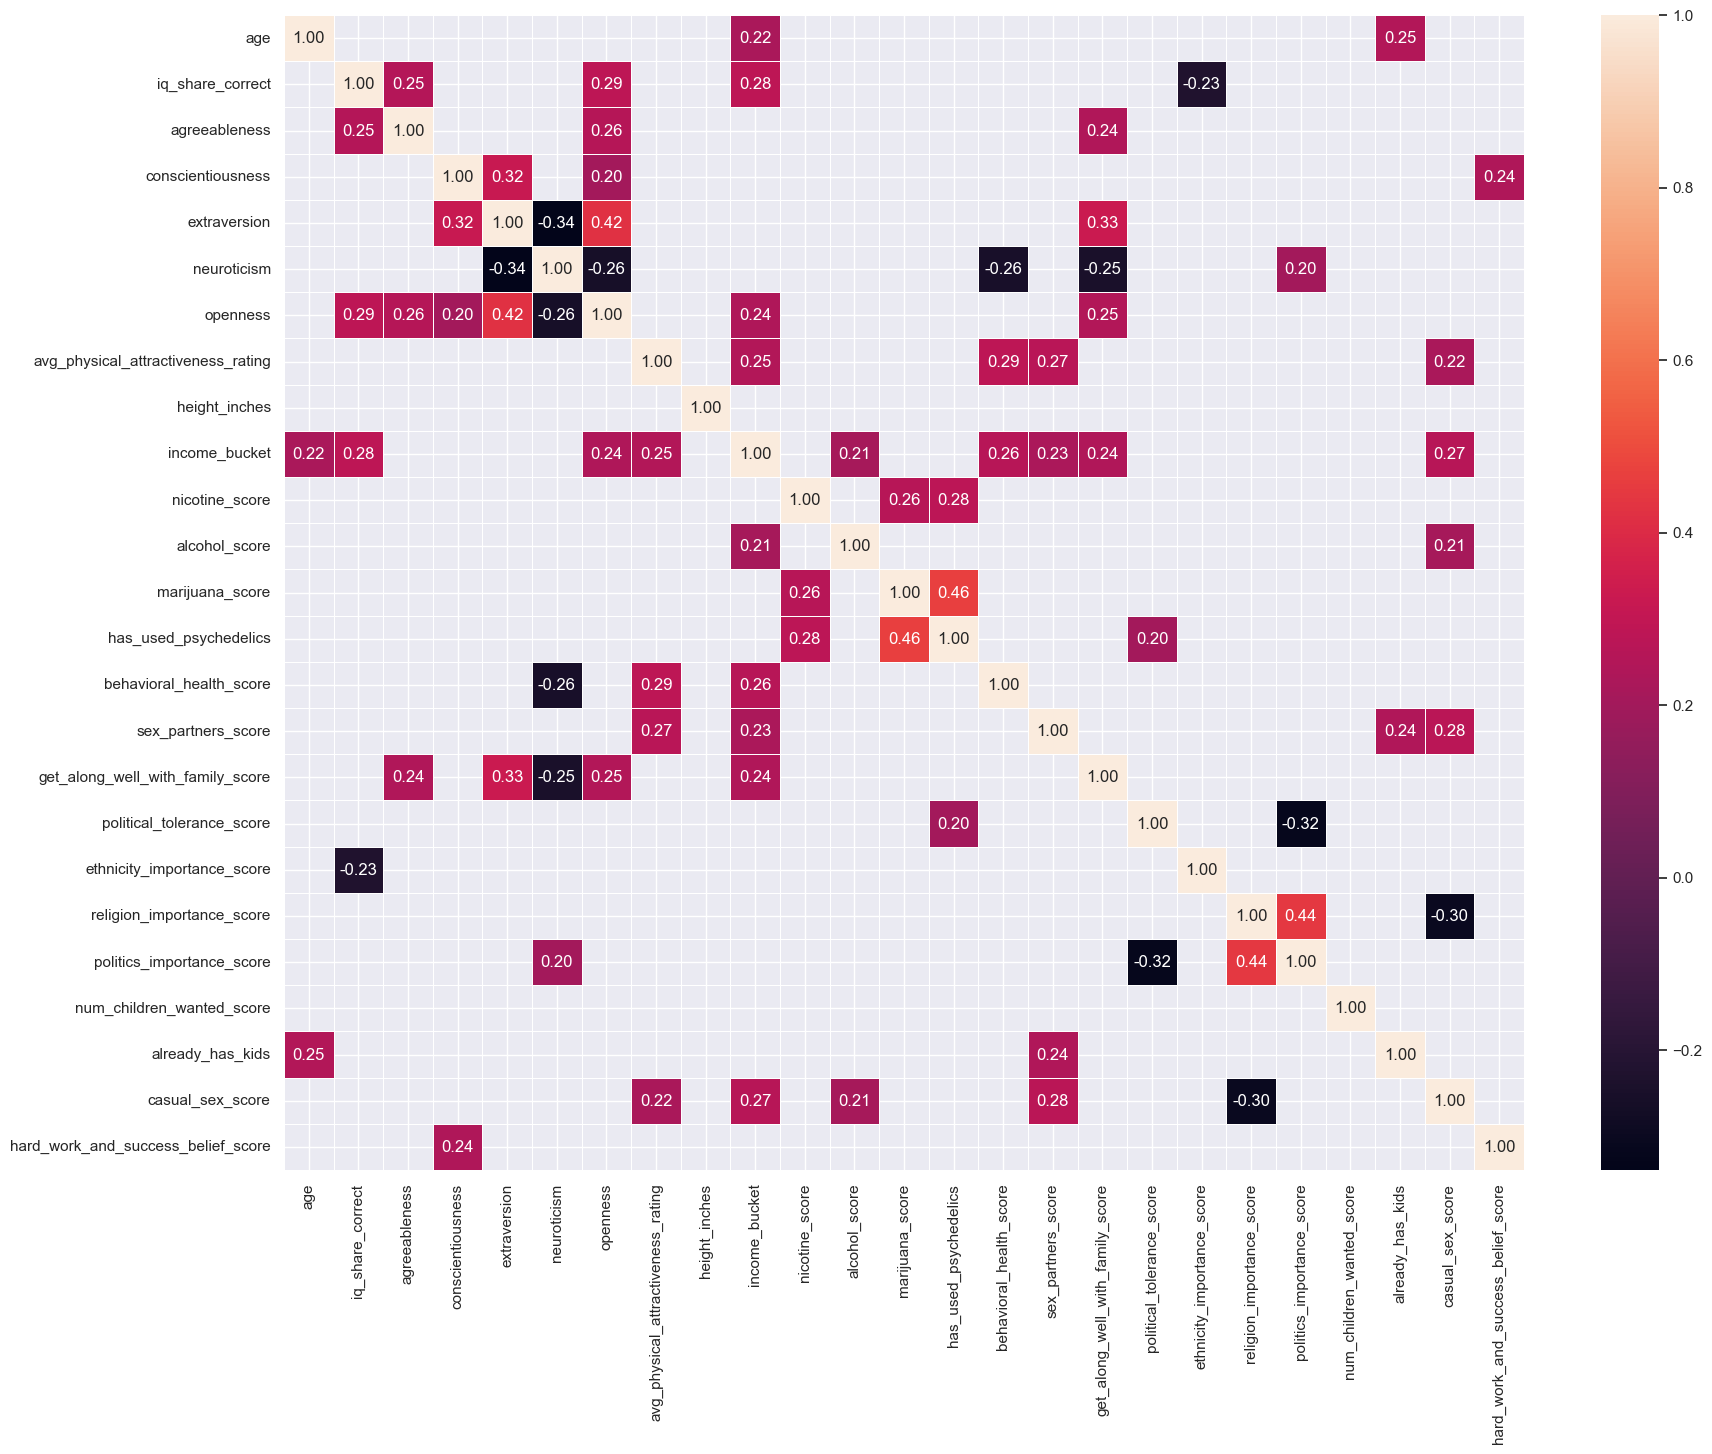

In [124]:

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(male_big_corr, annot=True, fmt=".2f", linewidths=.5, ax=ax)

In [126]:
male_big_corr = male_big_corr[male_big_corr !=1]
round(male_big_corr.stack().drop_duplicates().sort_values(ascending=False),2)

marijuana_score                     has_used_psychedelics                 0.46
religion_importance_score           politics_importance_score             0.44
extraversion                        openness                              0.42
                                    get_along_well_with_family_score      0.33
conscientiousness                   extraversion                          0.32
avg_physical_attractiveness_rating  behavioral_health_score               0.29
iq_share_correct                    openness                              0.29
                                    income_bucket                         0.28
nicotine_score                      has_used_psychedelics                 0.28
sex_partners_score                  casual_sex_score                      0.28
avg_physical_attractiveness_rating  sex_partners_score                    0.27
income_bucket                       casual_sex_score                      0.27
nicotine_score                      marijuana_score 

### Correlations for females

In [127]:
female_big_corr = user_features[user_features['gender'] == 'female'].corr(numeric_only=True)[(user_features[user_features['gender'] == 'female'].corr(numeric_only=True) > 0.2) | (user_features[user_features['gender'] == 'female'].corr(numeric_only=True) < -0.2)]


<Axes: >

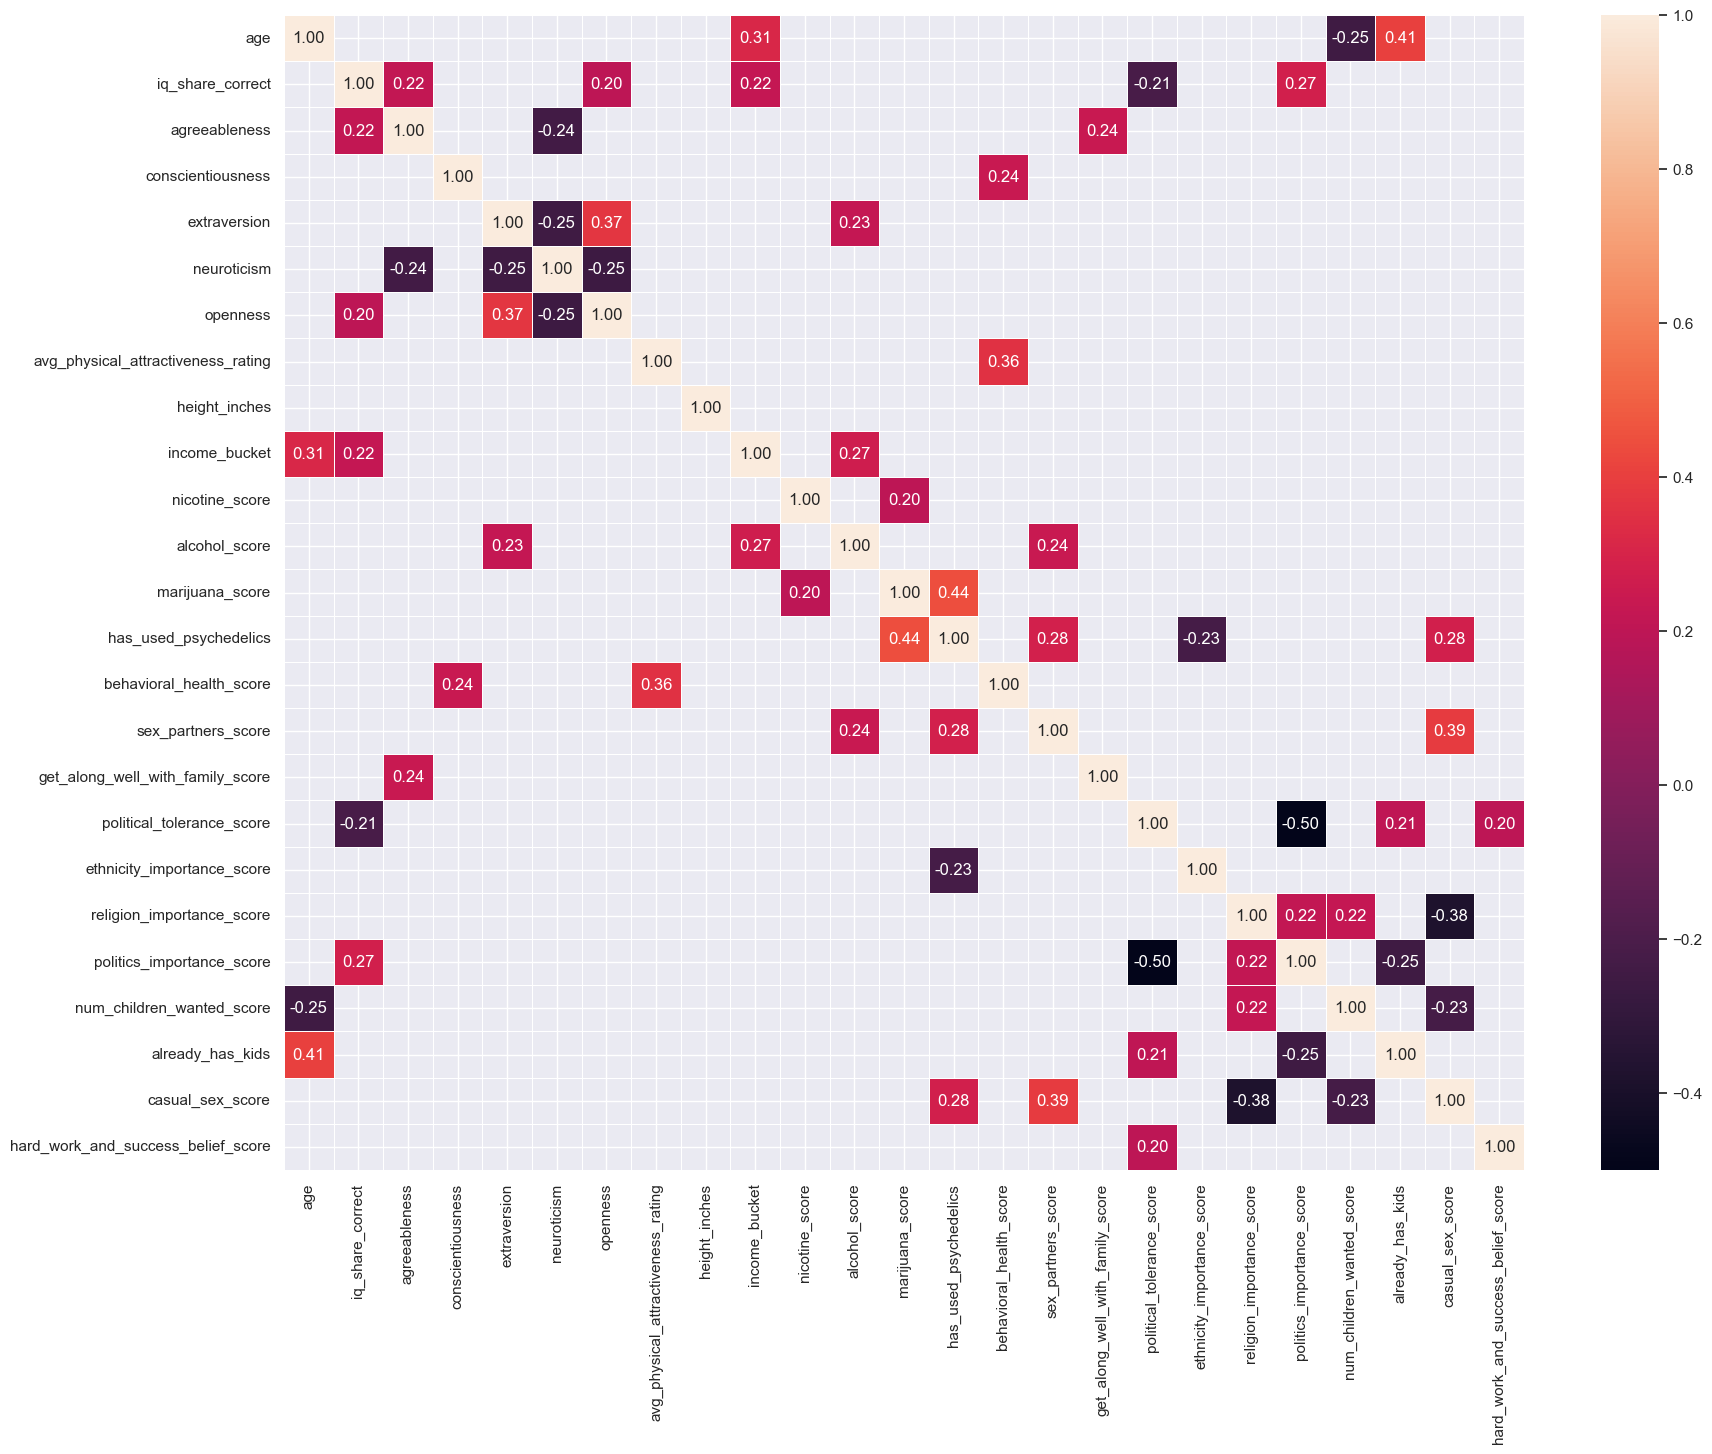

In [128]:

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(female_big_corr, annot=True, fmt=".2f", linewidths=.5, ax=ax)

In [129]:
female_big_corr = female_big_corr[female_big_corr !=1]
round(female_big_corr.stack().drop_duplicates().sort_values(ascending=False),2)

marijuana_score                     has_used_psychedelics                 0.44
age                                 already_has_kids                      0.41
sex_partners_score                  casual_sex_score                      0.39
extraversion                        openness                              0.37
avg_physical_attractiveness_rating  behavioral_health_score               0.36
age                                 income_bucket                         0.31
has_used_psychedelics               sex_partners_score                    0.28
                                    casual_sex_score                      0.28
iq_share_correct                    politics_importance_score             0.27
income_bucket                       alcohol_score                         0.27
conscientiousness                   behavioral_health_score               0.24
agreeableness                       get_along_well_with_family_score      0.24
alcohol_score                       sex_partners_sco

<Axes: >

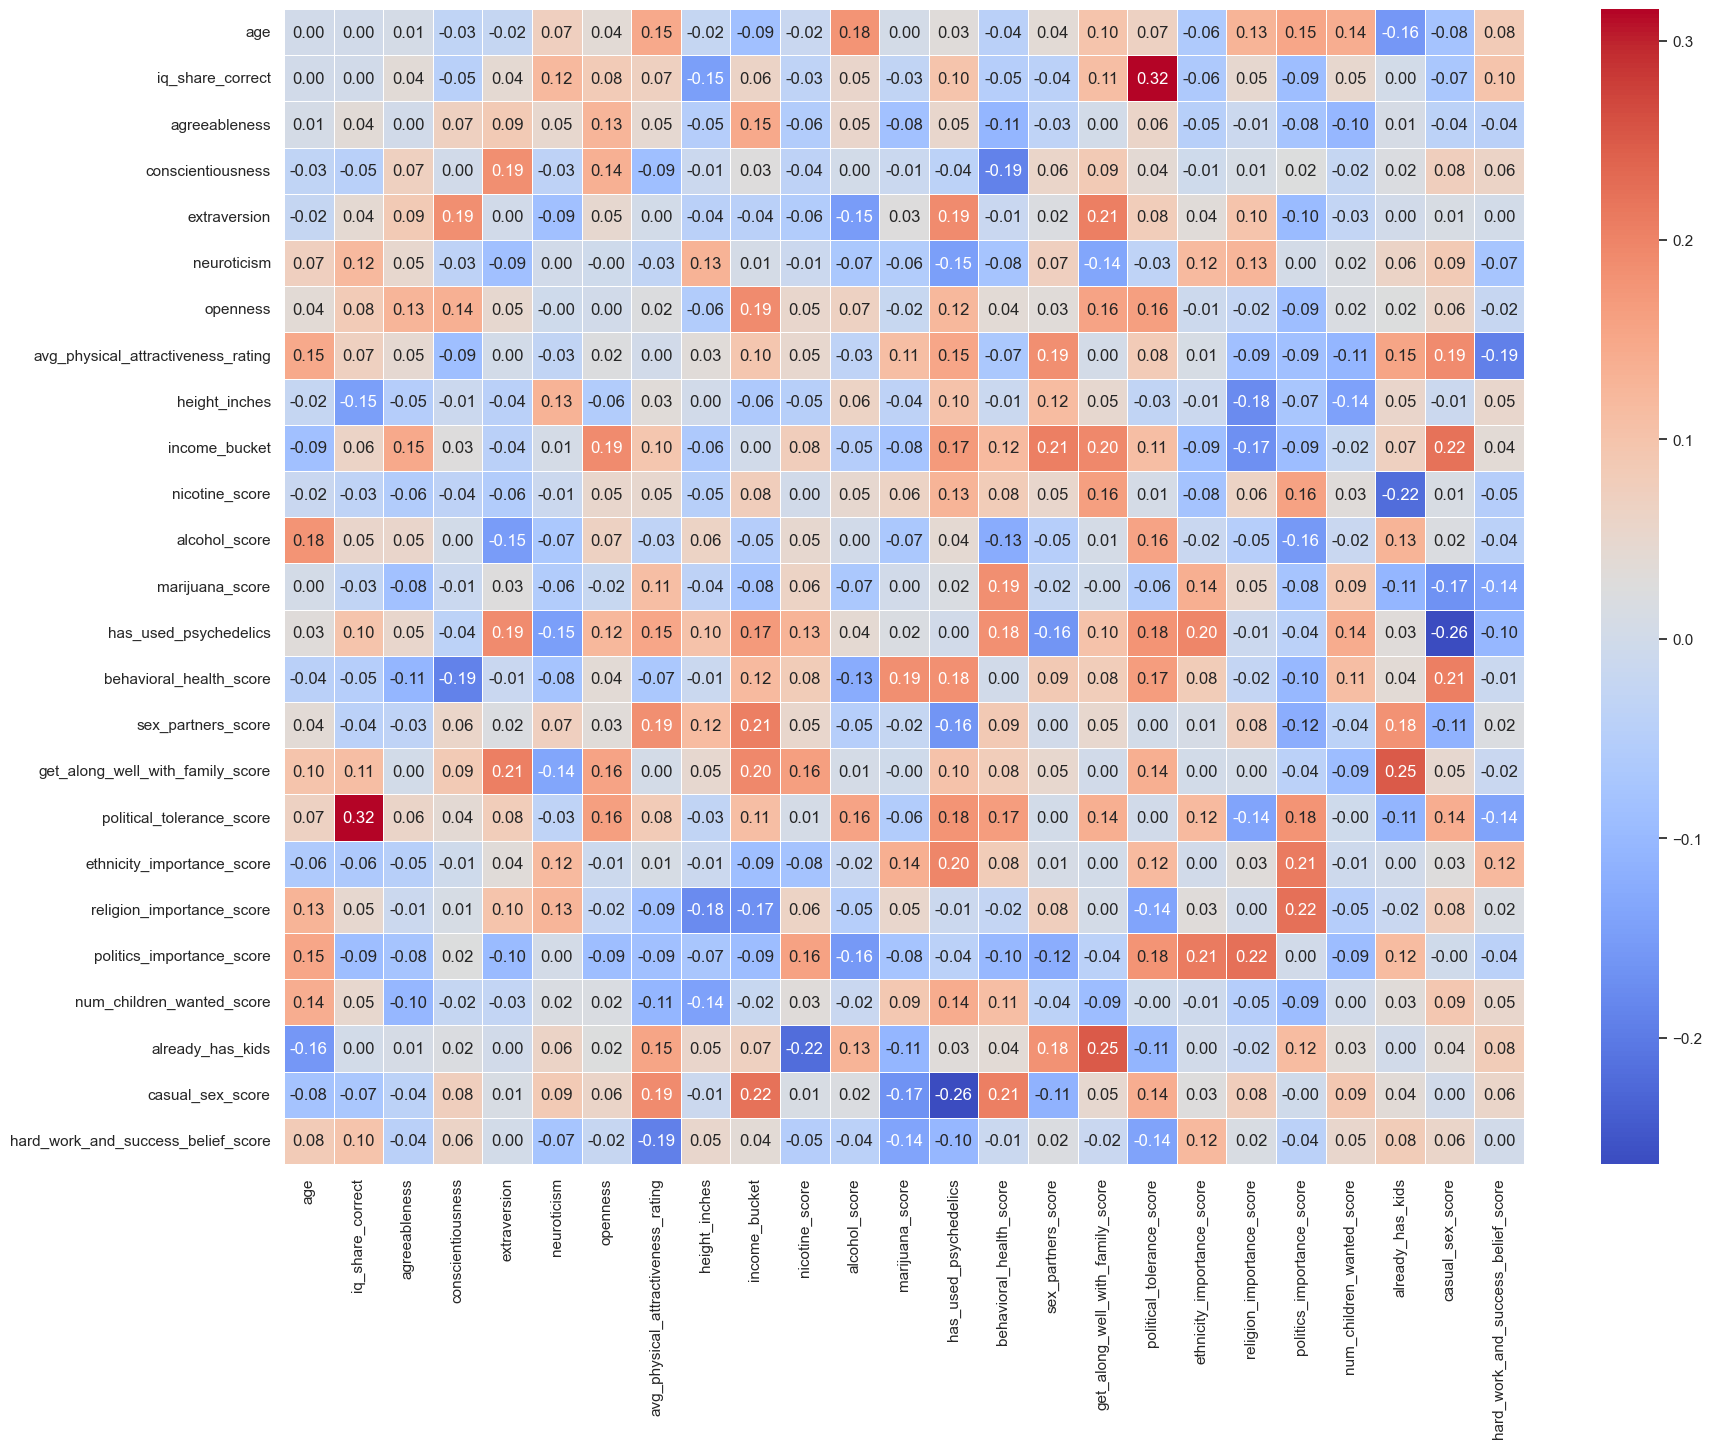

In [81]:
# Calculate correlations for male and female separately
corr_male = user_features[user_features['gender'] == 'male'].corr(numeric_only=True)
corr_female = user_features[user_features['gender'] == 'female'].corr(numeric_only=True)
corr_diff = corr_male - corr_female

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_diff, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm', ax=ax)


In [102]:
# Filter so we only see the differences in correlations > 0.2
filtered_values = corr_diff[(corr_diff < -0.2) | (corr_diff >0.2)]

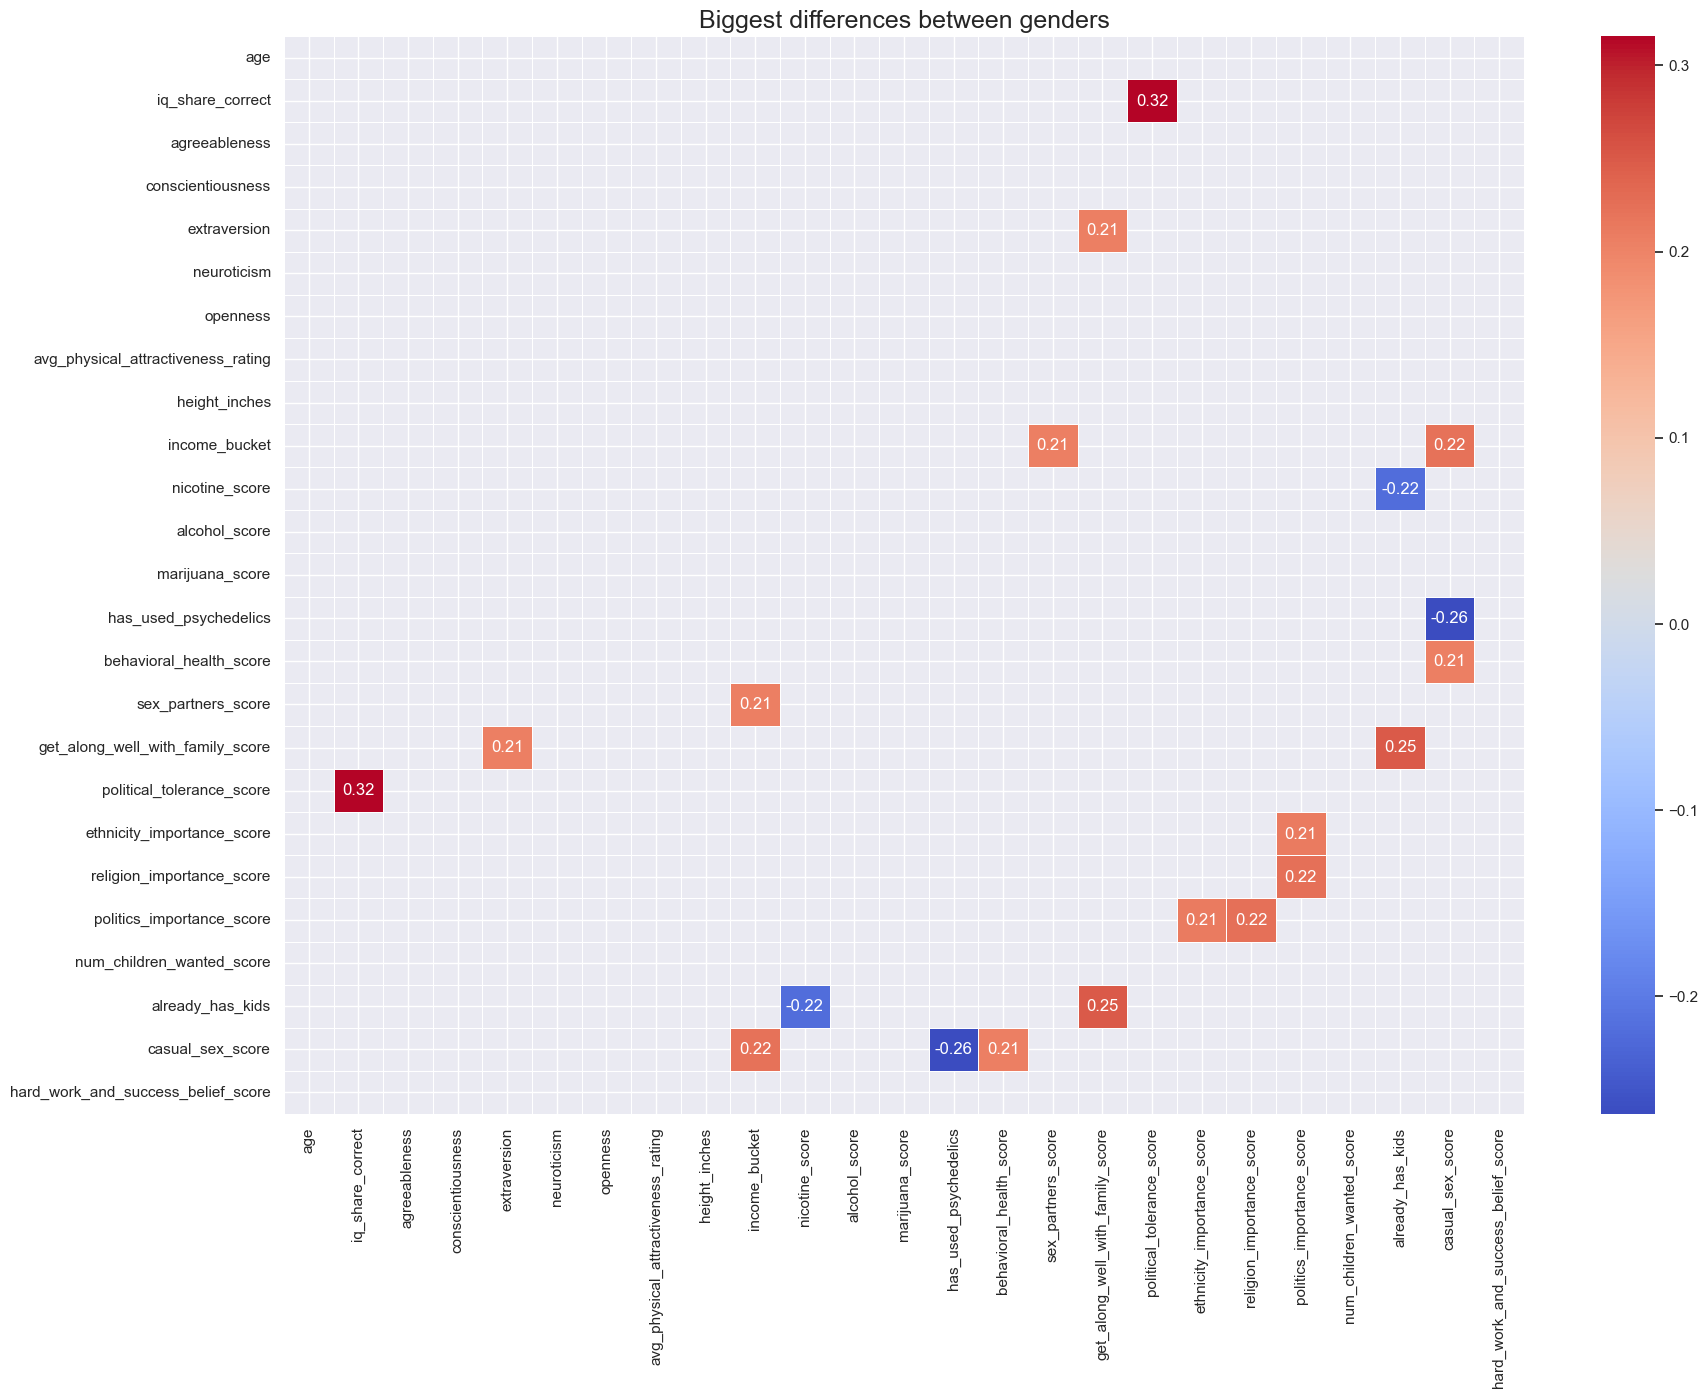

In [103]:
# Visualize the differences
plt.figure(figsize=(20, 14))
sns.heatmap(filtered_values, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')
plt.title('Biggest differences between genders', fontsize=18)
plt.show()

In [120]:
round(filtered_values.stack().drop_duplicates().sort_values(ascending=False),2)

iq_share_correct                  political_tolerance_score           0.32
get_along_well_with_family_score  already_has_kids                    0.25
religion_importance_score         politics_importance_score           0.22
income_bucket                     casual_sex_score                    0.22
ethnicity_importance_score        politics_importance_score           0.21
behavioral_health_score           casual_sex_score                    0.21
extraversion                      get_along_well_with_family_score    0.21
income_bucket                     sex_partners_score                  0.21
nicotine_score                    already_has_kids                   -0.22
has_used_psychedelics             casual_sex_score                   -0.26
dtype: float64

### Conclusions from Correlation Differences (Males vs. Females)

1. **IQ Share Correct vs. Political Tolerance Score (0.32):** Indicates a notably stronger relationship in males regarding how IQ share correlates with political tolerance compared to females.

2. **Already Has Kids vs. Get Along Well with Family Score (0.25):** Suggests that the association between having kids and family relations is more pronounced in males.

3. **Politics Importance Score vs. Religion Importance Score (0.22):** Higher correlation difference highlights a potentially stronger link in males between politics and religion importance.

4. **Income Bucket vs. Casual Sex Score (0.22):** Implies a potentially more marked relationship between income and casual sex in males.

5. **Ethnicity Importance Score vs. Politics Importance Score (0.21):** Indicates a stronger relationship between ethnicity and politics importance among males.

6. **Casual Sex Score vs. Behavioral Health Score (0.21):** Highlights a potentially stronger connection between casual sex and behavioral health in males.

7. **Extraversion vs. Get Along Well with Family Score (0.21):** Points to a potentially stronger link between extraversion and familial relations in males.

8. **Sex Partners Score vs. Income Bucket (0.21):** Suggests a potentially more pronounced relationship between the number of sex partners and income among males.


### Unique to women:

1. **Has Used Psychedelics vs. Casual Sex Score (-0.26):** The stronger negative correlation in females implies that among females, the relationship between using psychedelics and engaging in casual sex is more prominent compared to males.

2. **Already Has Kids vs. Nicotine Score (-0.22):** The negative correlation is stronger in females compared to males. This suggests that among females, there's a more pronounced relationship between having kids and lower nicotine scores than observed in males.

#### 2. Outcomes Distribution: 
Visualize the distribution of outcomes (e.g., mutual interest) to understand how frequently mutual interest occurs in these speed dates. It might reveal patterns or trends.